<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement---1" data-toc-modified-id="Problem-statement---1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement - 1</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Hirarchical-clustering" data-toc-modified-id="Hirarchical-clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hirarchical clustering</a></span></li><li><span><a href="#Agglomerative-clustering" data-toc-modified-id="Agglomerative-clustering-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Agglomerative clustering</a></span></li><li><span><a href="#KMeans-clustering" data-toc-modified-id="KMeans-clustering-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>KMeans clustering</a></span></li><li><span><a href="#DBSCAN-clustering" data-toc-modified-id="DBSCAN-clustering-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>DBSCAN clustering</a></span></li></ul></li><li><span><a href="#Problem-statement---2" data-toc-modified-id="Problem-statement---2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem statement - 2</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Hirarchical-clustering" data-toc-modified-id="Hirarchical-clustering-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Hirarchical clustering</a></span></li><li><span><a href="#Agglomeartive-clustering" data-toc-modified-id="Agglomeartive-clustering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Agglomeartive clustering</a></span></li><li><span><a href="#KMeans-clustering" data-toc-modified-id="KMeans-clustering-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>KMeans clustering</a></span></li><li><span><a href="#DBSCAN-Clustering" data-toc-modified-id="DBSCAN-Clustering-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>DBSCAN Clustering</a></span></li></ul></li></ul></div>

### Problem statement - 1

#### Exploratory Data Analysis

In [1]:
# Necessary libraries
# Data preparation 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Clustering models
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# Evaluation 
from sklearn.metrics import silhouette_score

# Warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Loading dataset

airline_df = pd.read_excel(r"D:\Education\Data science\Assignments\7 Clustering\EastWestAirlines.xlsx",
                          sheet_name='data', index_col='ID#')

In [3]:
# 1. Brief look of dataset
airline_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# Renaming column names for consistency
airline_df.rename(columns={'Award?': 'Award'},  inplace=True)

In [5]:
airline_df.index.names = ['ID']

In [6]:
# Dataset after renaming column names
airline_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# 2. Shape of dataset
print('(Rows, Columns)')
airline_df.shape

(Rows, Columns)


(3999, 11)

In [8]:
#3. Technical summary of dataset
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
#4. Statistical summary of dataset
airline_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [10]:
#5. Observation for null values
airline_df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [11]:
#6. Observation for duplicate entries
airline_df.duplicated().sum()

1

In [12]:
# Deletion of duplicate entry
airline_df = airline_df.drop_duplicates()

In [13]:
airline_df.shape

(3998, 11)

In [14]:
# Unique values details
airline_df.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award                   2
dtype: int64

In [15]:
#7. Datasets distribution

airline_df.skew()

Balance               5.004089
Qual_miles            7.511416
cc1_miles             0.857189
cc2_miles            11.209026
cc3_miles            17.193362
Bonus_miles           2.841832
Bonus_trans           1.157386
Flight_miles_12mo     7.450799
Flight_trans_12       5.489785
Days_since_enroll     0.119765
Award                 0.536789
dtype: float64

#### Visualization

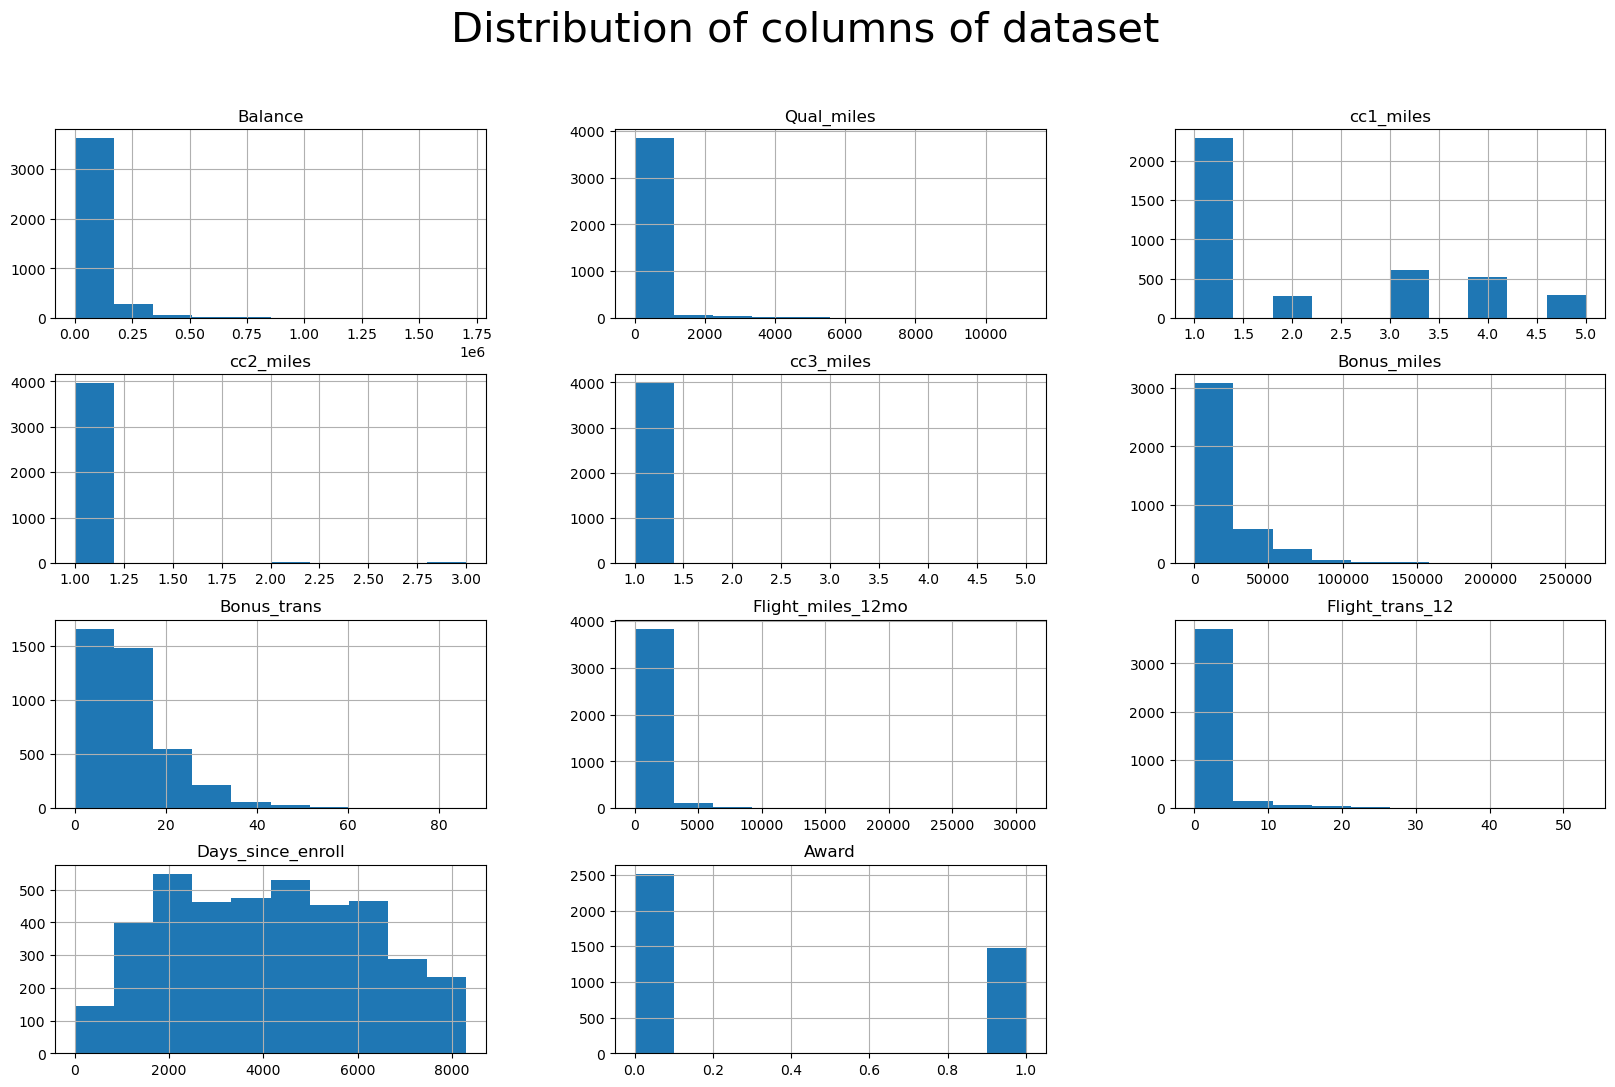

In [16]:
# Distribution of dataset
airline_df.hist(figsize=(20, 12))
plt.suptitle('Distribution of columns of dataset', size=30)
plt.show()

In [17]:
#8. Correlation in dataset
airline_df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


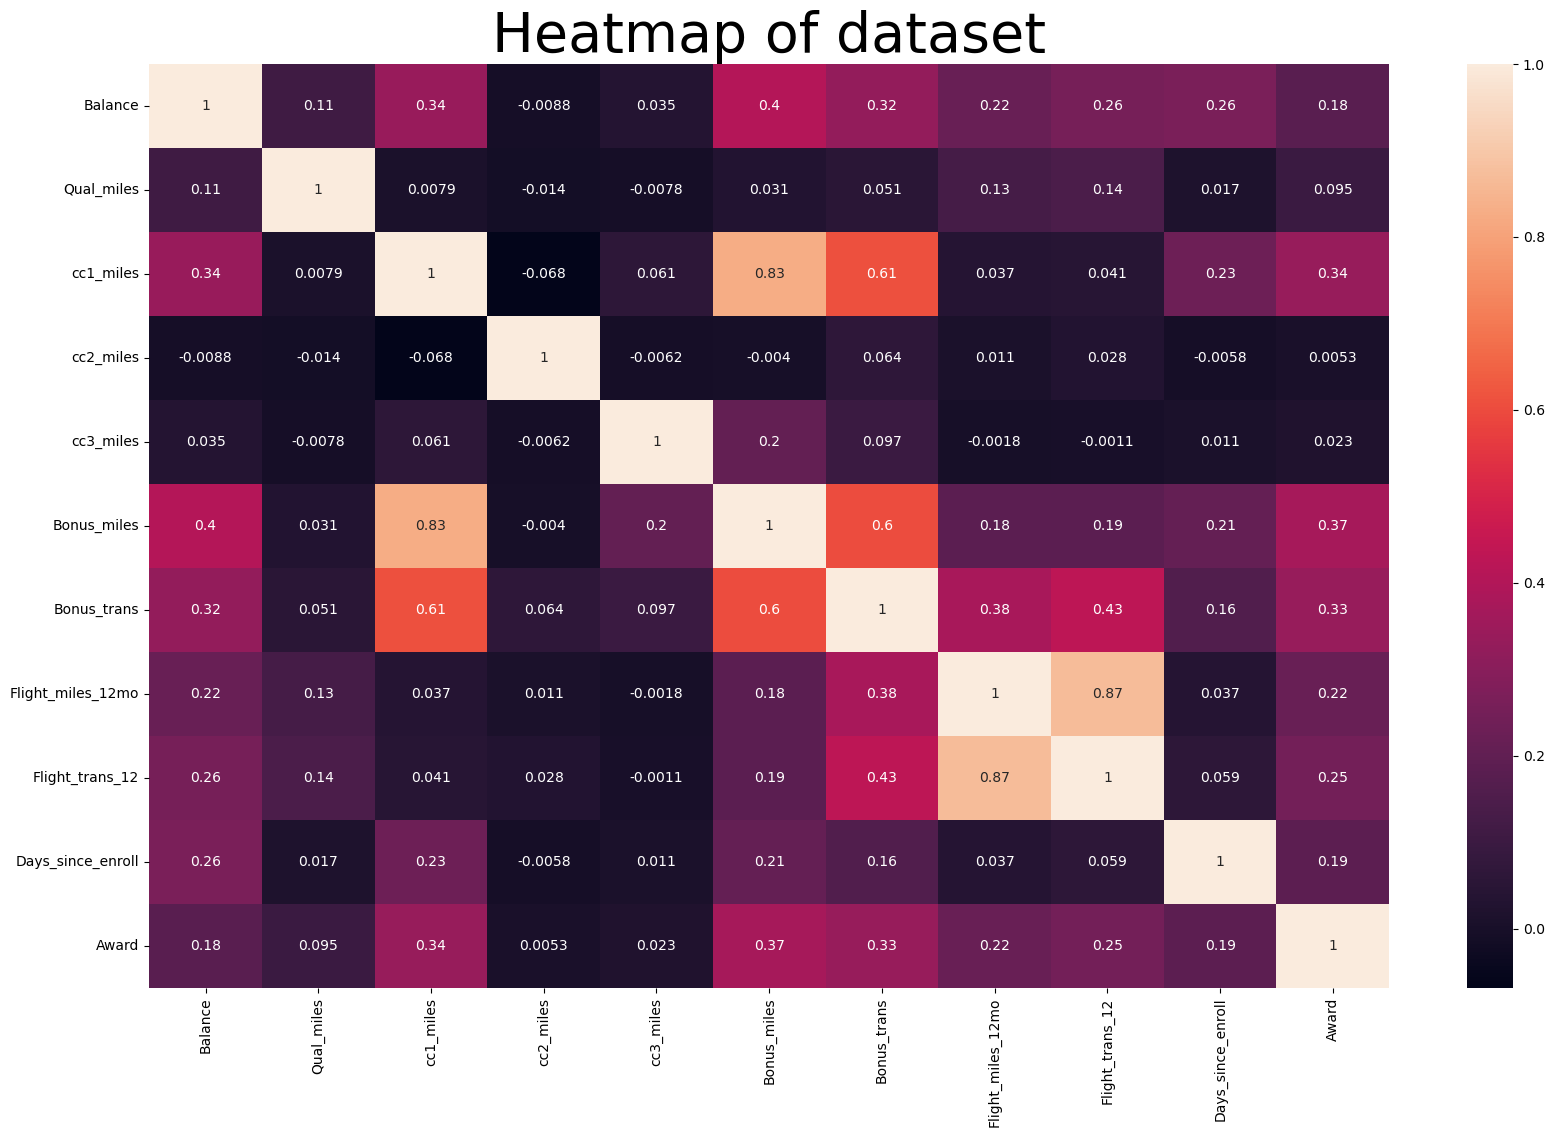

In [18]:
# Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(data=airline_df.corr(), annot=True)
plt.title('Heatmap of dataset', fontdict={'fontsize': 40})
plt.show()

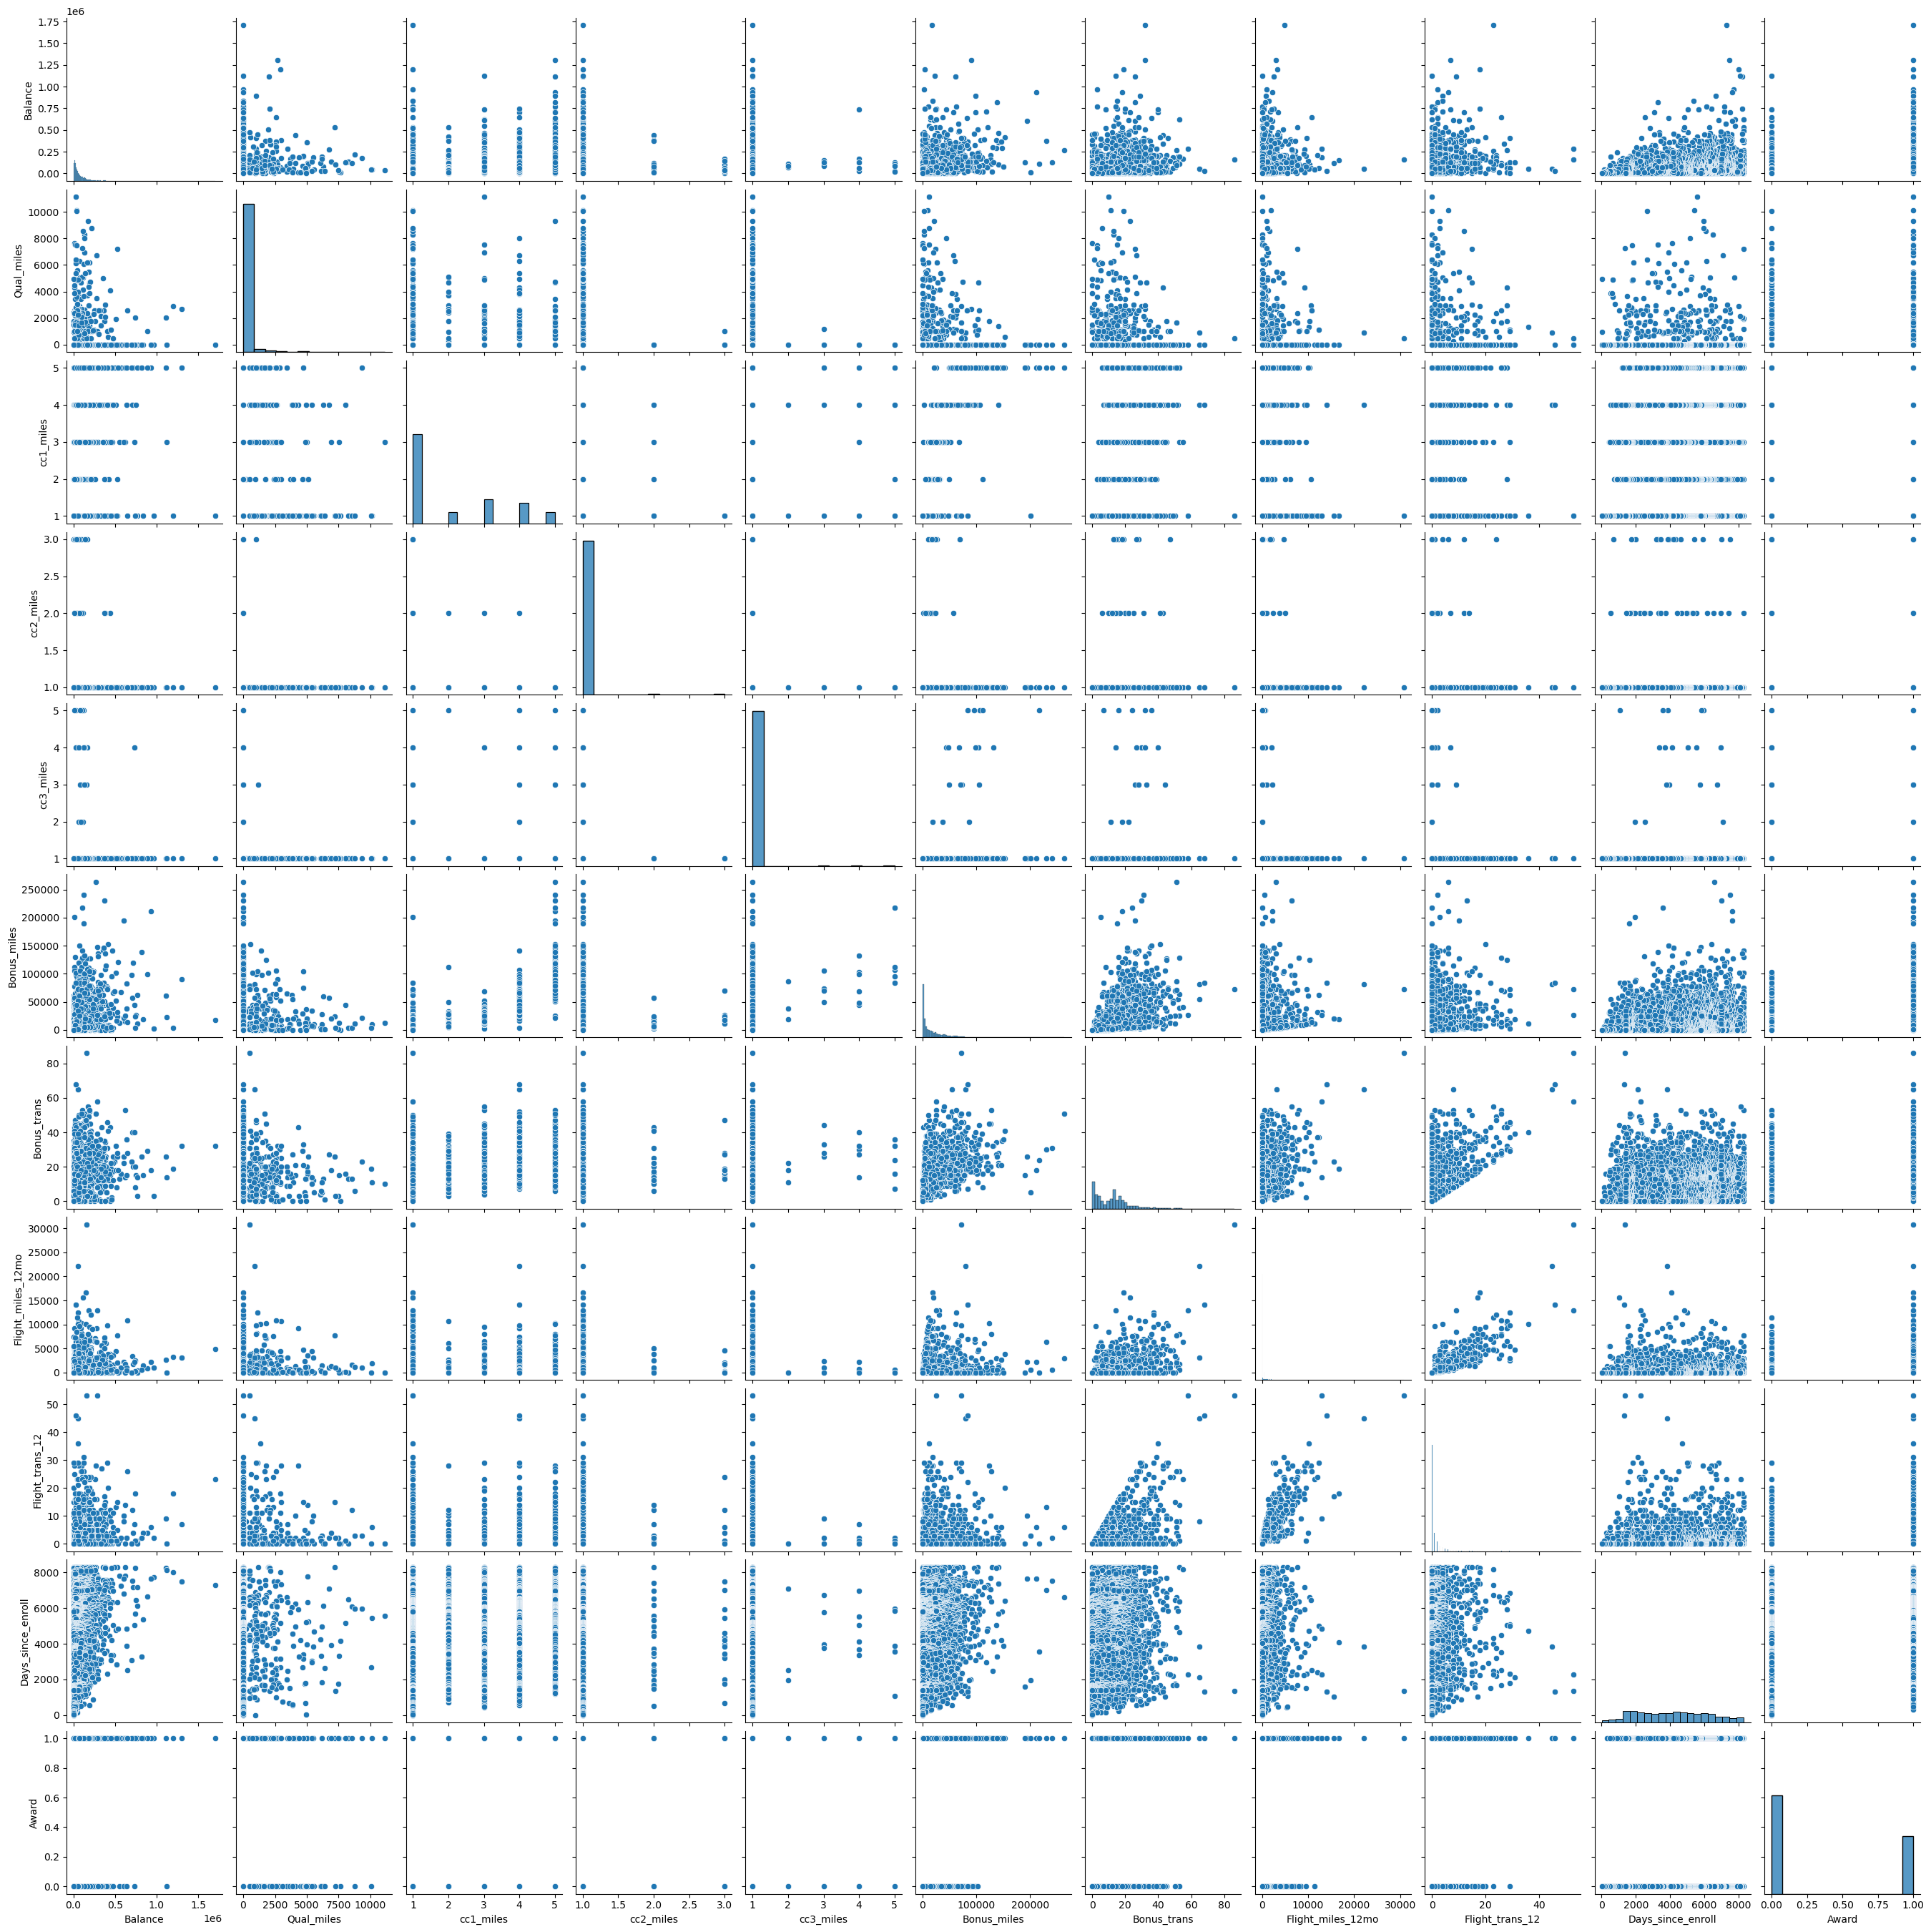

In [19]:
sns.pairplot(data=airline_df)
plt.show()

Observations:
1. Given dataset has 3999 records and 12 columns. ID column is unique and converted to index.
2. Datatypes of the dataset are consistent and all the data values are in numerical form.
3. Mean and standard deviation of data values of columns have significant differences and needs to be standardized.
4. No null values observed in the dataset 
5. One duplicate record found in the datset and removed.
6. All the columns except days_since_enronlled are right skewed.
7. Columns Bonus_miles and Bonus_trans are positively correlated to cc1_miles and also with each other.
8. Heatmap and pairplots shows maximum part of the dataset have very low correlation among attributes. Hence, various clustering techniques explored to analyse the dataset.

In [20]:
# Scaling of dataset

# Standard transformation
scaler = StandardScaler()
airline_std = scaler.fit_transform(airline_df)
airline_std

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [21]:
# MinMax transformation
minmax = MinMaxScaler()
airline_minmax = minmax.fit_transform(airline_df)
airline_minmax

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

#### Hirarchical clustering

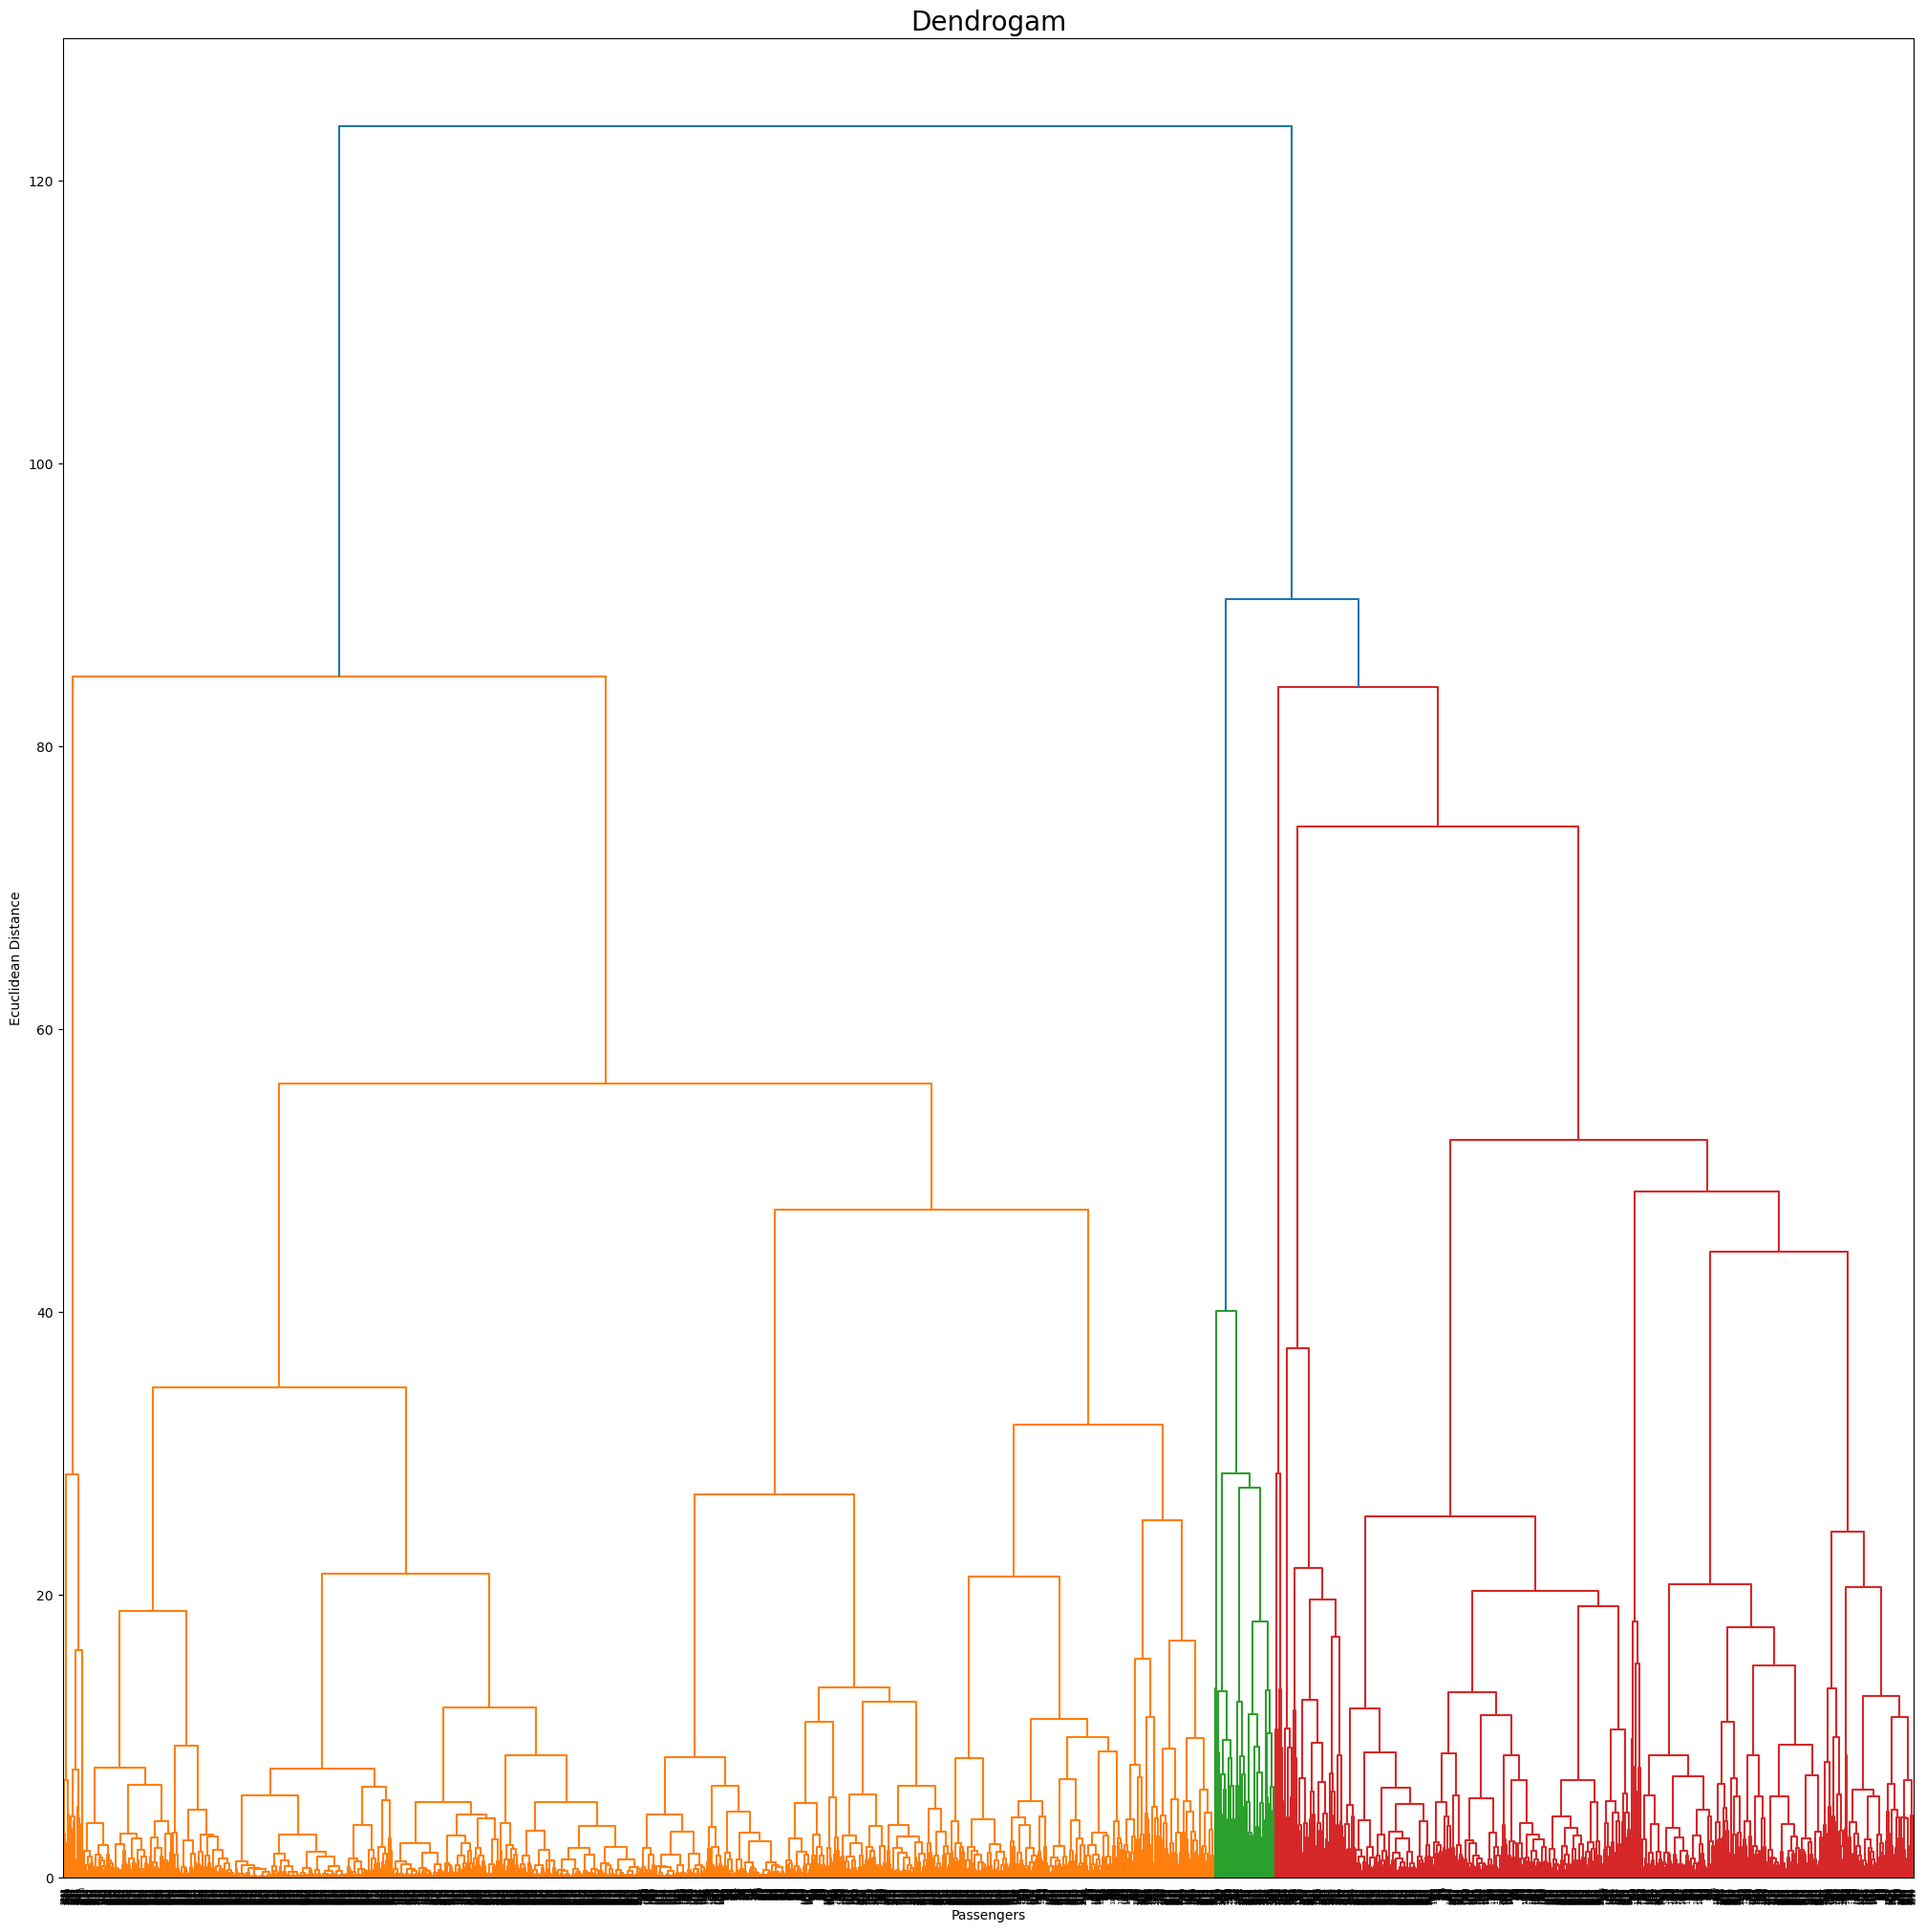

In [22]:
# 1. Hirarchical clustering
# Dendrogram of dataset using standard scaled data

plt.figure(figsize=(25, 25))
dendrogram = sch.dendrogram(sch.linkage(airline_std, method='ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Passengers')
plt.ylabel('Ecuclidean Distance')
plt.show()

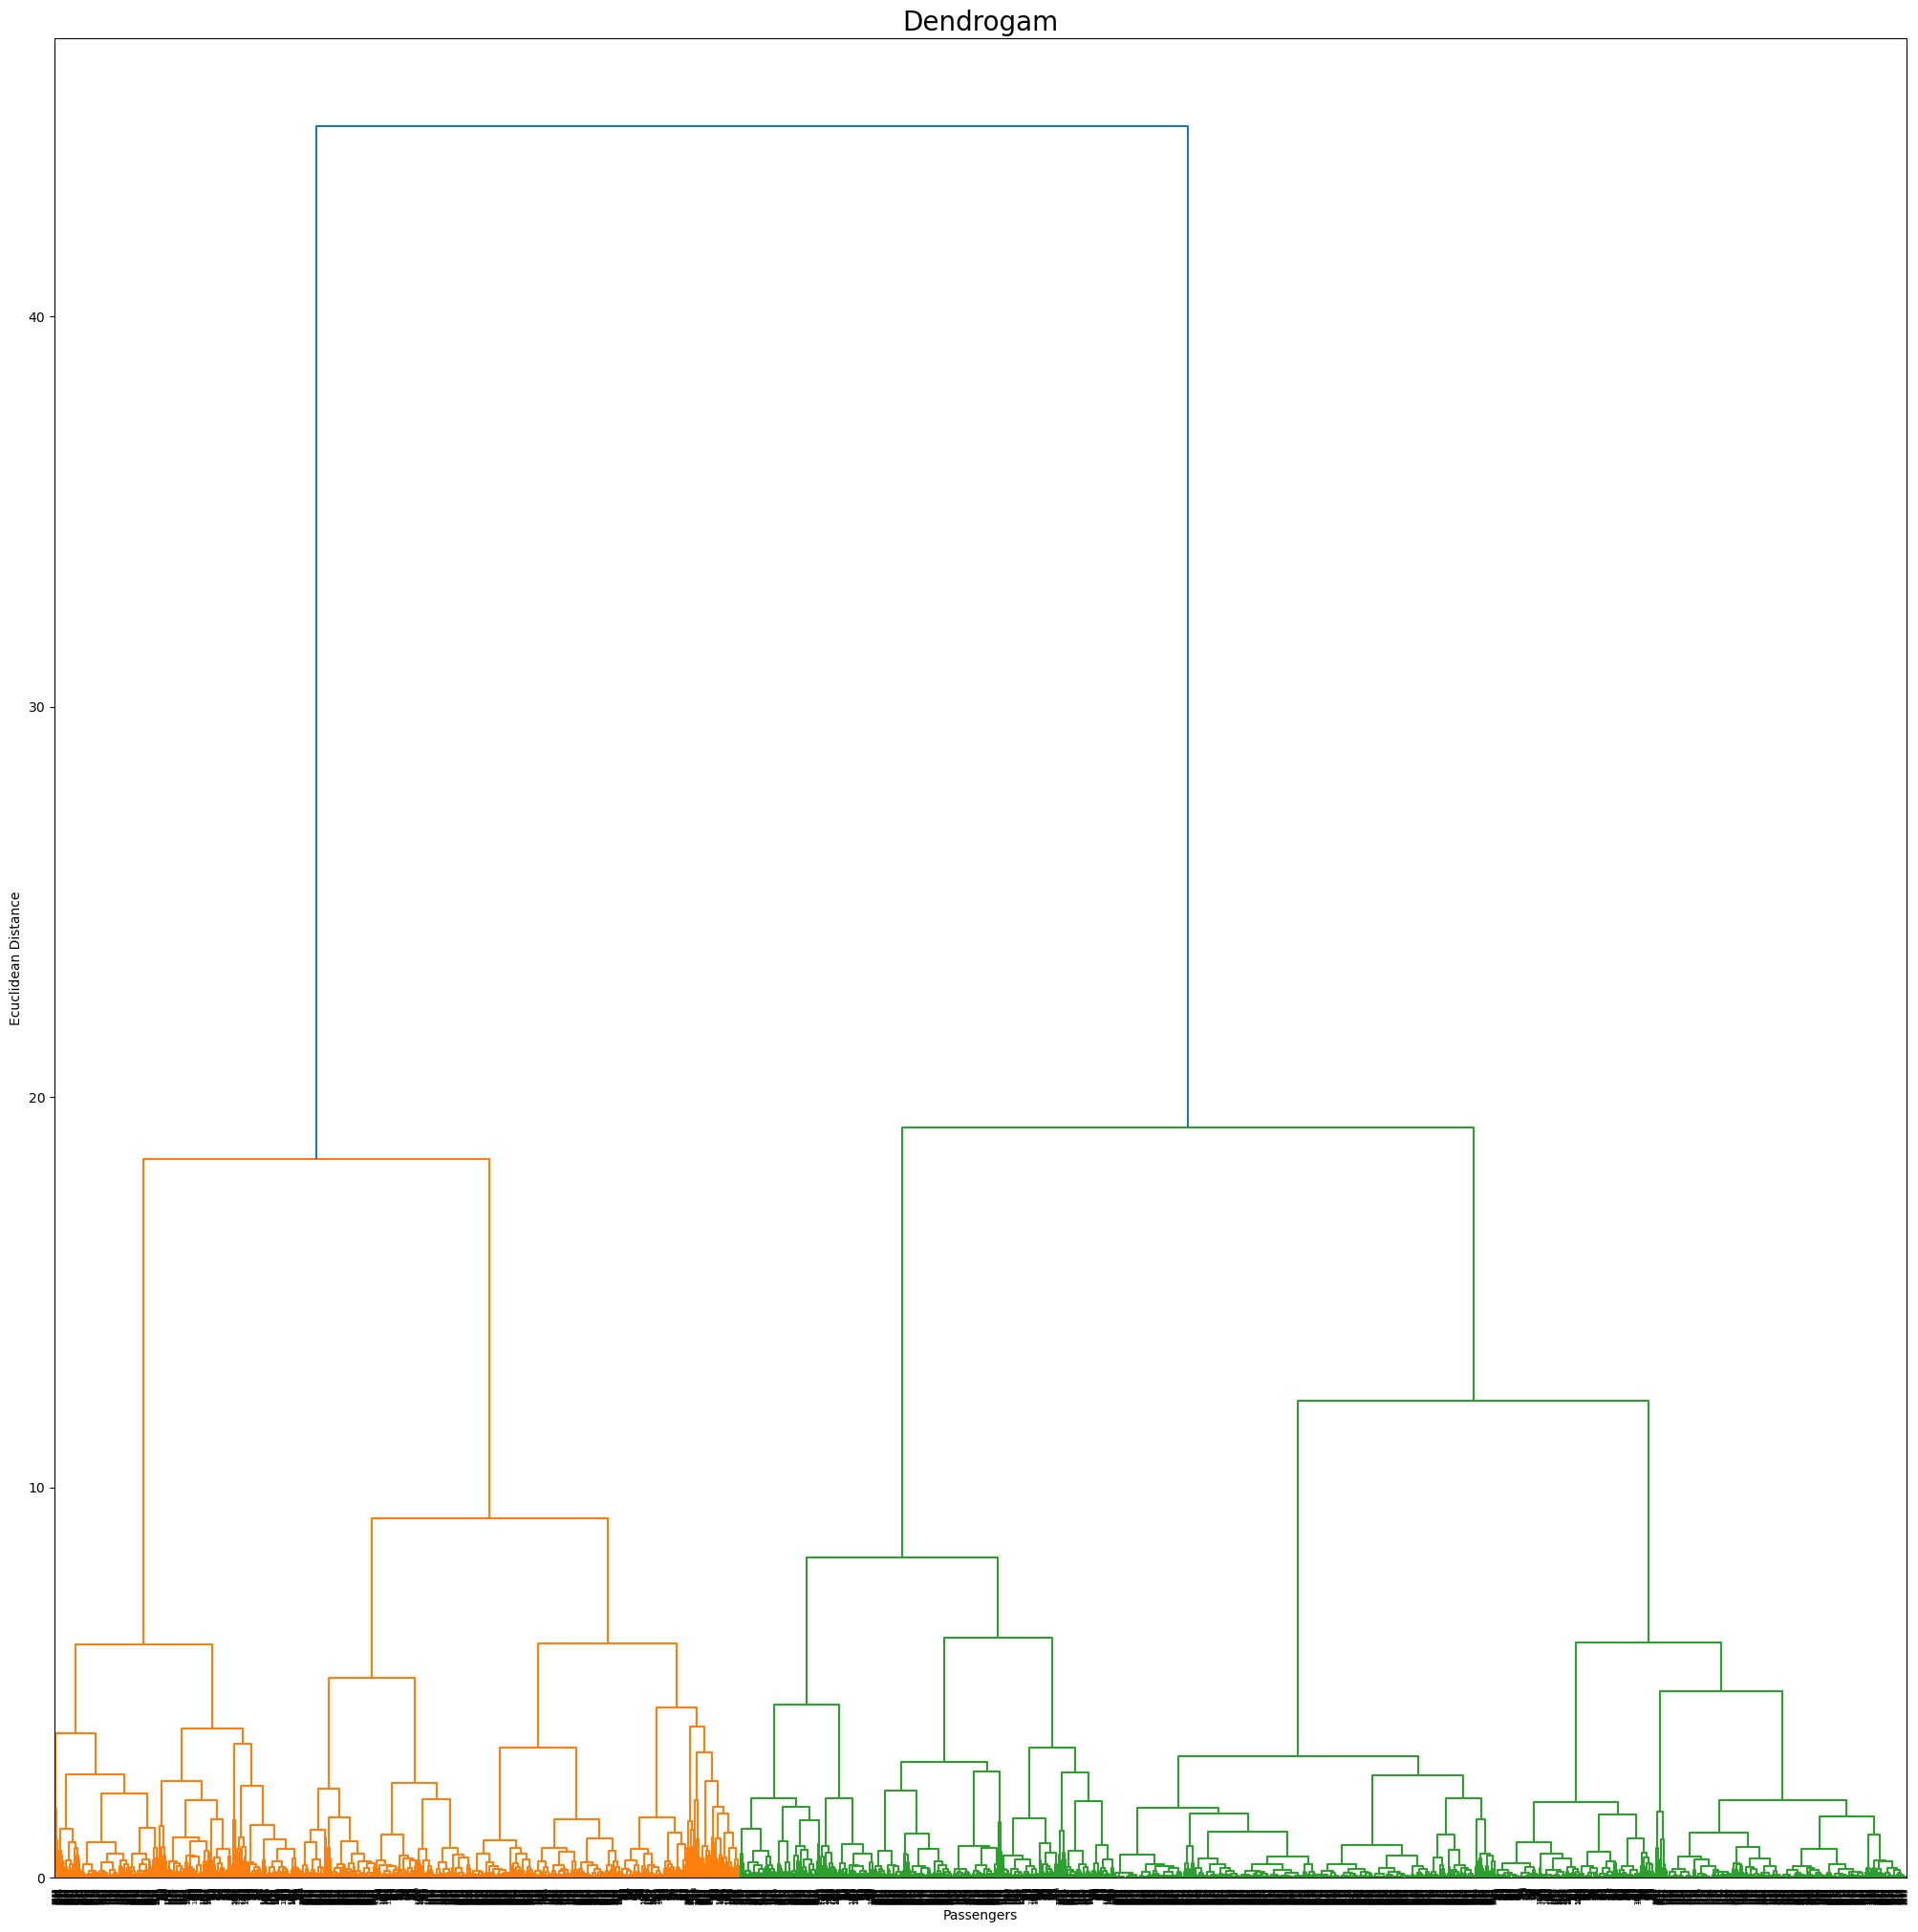

In [23]:
# MinMax scaled data
plt.figure(figsize=(25, 25))
dendrogram = sch.dendrogram(sch.linkage(airline_minmax, method='ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Passengers')
plt.ylabel('Ecuclidean Distance')
plt.show()

#### Agglomerative clustering

In [24]:
#2. Agglomearative clustering
# Using standard scaled data

x = airline_std
clusters = 0
max_score = 0
best_link = ''
for num in range(2, 10):
    print('Nos of clusters: ', num)
    for link in ['ward', 'complete', 'average', 'single']:
        hc = AgglomerativeClustering(n_clusters = num, metric = 'euclidean', linkage = link)
        y_hc = hc.fit_predict(x)
        score = silhouette_score(x, y_hc)
        print(f'Silhouette score for linkage {link}: ', score)
        if score > max_score:
            max_score = score
            best_link = link
            clusters = num
    print()
    print(f'Best Agglomerative clustering combination using standard scaled data is cluseters:'
      f' {clusters} and linkage: {best_link} with silhouette score of {max_score}.')

Nos of clusters:  2
Silhouette score for linkage ward:  0.2891560488062143
Silhouette score for linkage complete:  0.8110876003700274
Silhouette score for linkage average:  0.8110876003700274
Silhouette score for linkage single:  0.8562622335599249

Best Agglomerative clustering combination using standard scaled data is cluseters: 2 and linkage: single with silhouette score of 0.8562622335599249.
Nos of clusters:  3
Silhouette score for linkage ward:  0.2939395016802131
Silhouette score for linkage complete:  0.7760498283333268
Silhouette score for linkage average:  0.7838424148089893
Silhouette score for linkage single:  0.7350131896585496

Best Agglomerative clustering combination using standard scaled data is cluseters: 2 and linkage: single with silhouette score of 0.8562622335599249.
Nos of clusters:  4
Silhouette score for linkage ward:  0.308036175465823
Silhouette score for linkage complete:  0.5985292155693238
Silhouette score for linkage average:  0.7730785441296635
Silhouett

In [25]:
print(f'Best Agglomerative clustering combination using standard scaled data is cluseters:'
      f' {clusters} and linkage: {best_link} with silhouette score of {max_score}.')

Best Agglomerative clustering combination using standard scaled data is cluseters: 2 and linkage: single with silhouette score of 0.8562622335599249.


In [26]:
# Using minmax scaled data

x = airline_minmax
clusters = 0
max_score = 0
best_link = ''
for num in range(2, 10):
    print('Nos of clusters: ', num)
    for link in ['ward', 'complete', 'average', 'single']:
        hc = AgglomerativeClustering(n_clusters = num, metric = 'euclidean', linkage = link)
        y_hc = hc.fit_predict(x)
        score = silhouette_score(x, y_hc)
        print(f'Silhouette score for linkage {link}: ', score)
        if score > max_score:
            max_score = score
            best_link = link
            clusters = num 
    print()

Nos of clusters:  2
Silhouette score for linkage ward:  0.535888544052936
Silhouette score for linkage complete:  0.4703657329091562
Silhouette score for linkage average:  0.4703657329091562
Silhouette score for linkage single:  0.535888544052936

Nos of clusters:  3
Silhouette score for linkage ward:  0.4354523188194701
Silhouette score for linkage complete:  0.5318364582439801
Silhouette score for linkage average:  0.3961439228235289
Silhouette score for linkage single:  0.5351186081149816

Nos of clusters:  4
Silhouette score for linkage ward:  0.42489181550394106
Silhouette score for linkage complete:  0.4645451427805366
Silhouette score for linkage average:  0.5285595526639542
Silhouette score for linkage single:  0.48124303269184376

Nos of clusters:  5
Silhouette score for linkage ward:  0.39403156026334374
Silhouette score for linkage complete:  0.4166814801385664
Silhouette score for linkage average:  0.5082101146580403
Silhouette score for linkage single:  0.4800008155092664


In [27]:
print(f'Best Agglomerative clustering combination using minmax scaled data is cluseters:'
      f' {clusters} and linkage: {best_link} with silhouette score of {max_score}.')

Best Agglomerative clustering combination using minmax scaled data is cluseters: 2 and linkage: ward with silhouette score of 0.535888544052936.


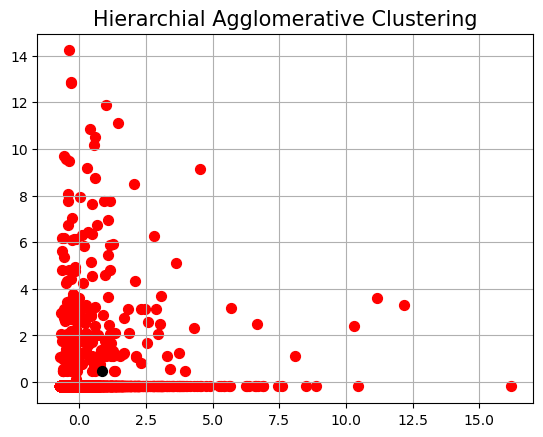

In [28]:
# Best Agglomerative clustering

x = airline_std
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'black')

plt.title('Hierarchial Agglomerative Clustering', fontsize = 15)
plt.grid()
plt.show()

In [29]:
result = pd.DataFrame(y_hc)
result.value_counts()

0    3997
1       1
dtype: int64

#### KMeans clustering

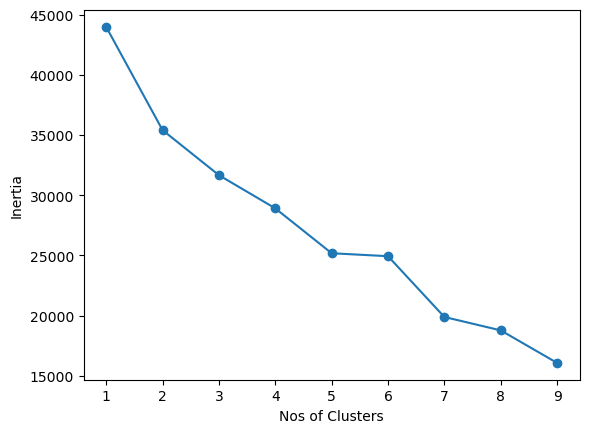

In [30]:
# Finding optimum clusters by fitting KMeans cluster model
# Using Standard scale

inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init='auto')
    kmeans.fit(airline_std)
    inertia.append(kmeans.inertia_)

# Plotting inertia v/s nos of clusters
inertia_frame = pd.DataFrame({'Cluster': range(1, 10), 'Inertia':inertia})
plt.plot(inertia_frame['Cluster'], inertia_frame['Inertia'], marker='o')
plt.xlabel('Nos of Clusters')
plt.ylabel('Inertia')
plt.show()

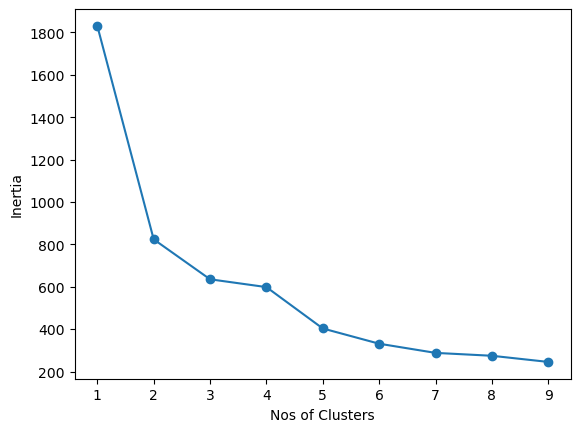

In [31]:
# MinMax scale

inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init='auto')
    kmeans.fit(airline_minmax)
    inertia.append(kmeans.inertia_)

# Plotting inertia v/s nos of clusters
inertia_frame = pd.DataFrame({'Cluster': range(1, 10), 'Inertia':inertia})
plt.plot(inertia_frame['Cluster'], inertia_frame['Inertia'], marker='o')
plt.xlabel('Nos of Clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Silhouette scores for KMeans clusters using standard scaled data
clusters = 0
best_mode = ''
max_score = 0
for num in range(2, 10):
    for mode in ['k-means++', 'random']:
        kmeans = KMeans(n_clusters=num, init=mode, n_init='auto')
        kmeans.fit(airline_std)
        predicts = kmeans.predict(airline_std)
        score = silhouette_score(airline_std, predicts)
        if score > max_score:
            max_score = score
            clusters = num
            best_mode = mode
        print(f'Clusters: {num}, initialization: {mode}, silhouette score: {score}')

Clusters: 2, initialization: k-means++, silhouette score: 0.32650126714931504
Clusters: 2, initialization: random, silhouette score: 0.32517533741779053
Clusters: 3, initialization: k-means++, silhouette score: 0.29784427353435694
Clusters: 3, initialization: random, silhouette score: 0.3105080790750972
Clusters: 4, initialization: k-means++, silhouette score: 0.30903678796985296
Clusters: 4, initialization: random, silhouette score: 0.2531076080886887
Clusters: 5, initialization: k-means++, silhouette score: 0.26171081163996396
Clusters: 5, initialization: random, silhouette score: 0.20429201751217801
Clusters: 6, initialization: k-means++, silhouette score: 0.2135852508354397
Clusters: 6, initialization: random, silhouette score: 0.28673619245306886
Clusters: 7, initialization: k-means++, silhouette score: 0.26035278229385184
Clusters: 7, initialization: random, silhouette score: 0.22103358387262023
Clusters: 8, initialization: k-means++, silhouette score: 0.23326782228466722
Cluster

In [33]:
print('Best parameters for KMeans clustering using standard scaled data- ')
print(f'Clusters: {clusters}, initialization: {best_mode}, silhouette score: {max_score}')

Best parameters for KMeans clustering using standard scaled data- 
Clusters: 2, initialization: k-means++, silhouette score: 0.32650126714931504


In [34]:
# Silhouette scores for KMeans clusters using minmax scaled data
clusters = 0
best_mode = ''
max_score = 0
for num in range(2, 10):
    for mode in ['k-means++', 'random']:
        kmeans = KMeans(n_clusters=num, init=mode, n_init='auto')
        kmeans.fit(airline_minmax)
        predicts = kmeans.predict(airline_std)
        score = silhouette_score(airline_std, predicts)
        if score > max_score:
            max_score = score
            clusters = num
            best_mode = mode
        print(f'Clusters: {num}, initialization: {mode}, silhouette score: {score}')

Clusters: 2, initialization: k-means++, silhouette score: 0.25749623856297255
Clusters: 2, initialization: random, silhouette score: 0.25749623856297255
Clusters: 3, initialization: k-means++, silhouette score: 0.18777772627345968
Clusters: 3, initialization: random, silhouette score: 0.18747416405523806
Clusters: 4, initialization: k-means++, silhouette score: 0.12092463322793846
Clusters: 4, initialization: random, silhouette score: 0.231525465291599
Clusters: 5, initialization: k-means++, silhouette score: 0.2139186908668631
Clusters: 5, initialization: random, silhouette score: 0.16194003218700886
Clusters: 6, initialization: k-means++, silhouette score: 0.14906517058437427
Clusters: 6, initialization: random, silhouette score: 0.1418513509791542
Clusters: 7, initialization: k-means++, silhouette score: 0.1437537682814673
Clusters: 7, initialization: random, silhouette score: 0.16180111858950985
Clusters: 8, initialization: k-means++, silhouette score: 0.14656354477471578
Clusters:

In [35]:
print('Best parameters for KMeans clustering using minmax scaled data- ')
print(f'Clusters: {clusters}, initialization: {best_mode}, silhouette score: {max_score}')

Best parameters for KMeans clustering using minmax scaled data- 
Clusters: 2, initialization: k-means++, silhouette score: 0.25749623856297255


In [36]:
# Best KMeans model fitting
kmeans = KMeans(n_clusters=5, init='k-means++', n_init='auto')
kmeans.fit(airline_std)
predicts = kmeans.predict(airline_std)

result_df = pd.DataFrame(airline_std)
result_df['Cluster'] = predicts

In [37]:
# Silhouette score
score = silhouette_score(airline_std, predicts)
print('Silhouette score for KMeans clustering is', score)

Silhouette score for KMeans clustering is 0.2529984651645566


In [38]:
# Clusterwise nos of customers
result_df['Cluster'].value_counts()

2    2189
1    1285
3     335
4     131
0      58
Name: Cluster, dtype: int64

In [39]:
result_df.head()

,0,1,2,3,4,5,6,7,8,9,10,Cluster
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072,2
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072,2
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072,2
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072,2
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659,3


In [40]:
airline_df['Clusters'] = predicts
airline_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [41]:
airline_df['Clusters'].value_counts()

2    2189
1    1285
3     335
4     131
0      58
Name: Clusters, dtype: int64

In [42]:
# Columnwise counts clusterwise
airline_df.groupby(['Clusters']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Clusters,,,,,,,,,,,
0,58,58,58,58,58,58,58,58,58,58,58
1,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285
2,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189
3,335,335,335,335,335,335,335,335,335,335,335
4,131,131,131,131,131,131,131,131,131,131,131


In [43]:
airline_df.groupby(['Clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Clusters,,,,,,,,,,,
0,118307.913793,5491.982759,2.017241,1.000000,1.000000,18968.293103,12.275862,955.465517,2.913793,3910.862069,0.534483
1,82066.663035,55.206226,3.080934,1.009339,1.000000,25038.807782,17.050584,285.044358,0.860700,4569.280156,0.551751
2,39455.767017,42.510279,1.078575,1.018273,1.000457,3362.057561,5.681133,193.916857,0.585199,3627.202832,0.177707
3,221127.979104,101.561194,4.588060,1.000000,1.143284,72337.047761,23.083582,634.964179,2.017910,5504.391045,0.740299
4,164630.847328,456.190840,1.992366,1.045802,1.000000,28204.244275,27.519084,5960.816794,17.259542,4475.183206,0.793893


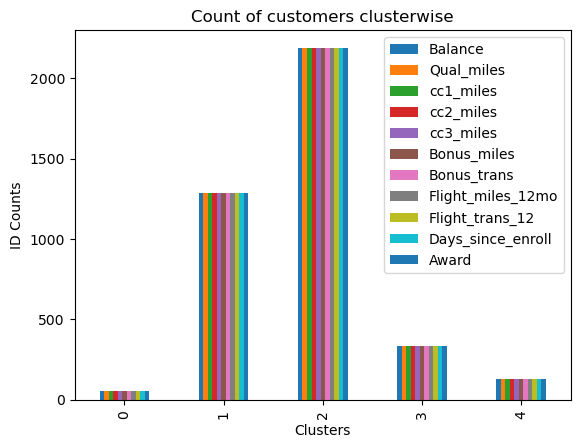

In [44]:
# Visualizaton of dataset clusterwise
airline_df.groupby(['Clusters']).count().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('ID Counts')
plt.title('Count of customers clusterwise')
plt.show()

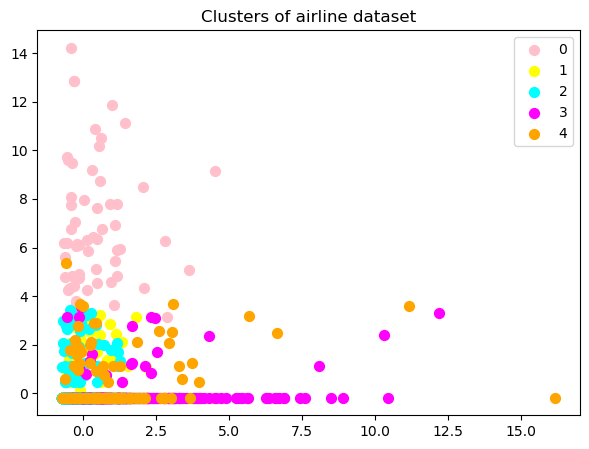

In [45]:
# Clusters visualization - scatter form
x = airline_std
y_means = predicts
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')

plt.legend([0, 1, 2, 3, 4])
plt.title('Clusters of airline dataset')
plt.show()

#### DBSCAN clustering

In [46]:
# Finding optimum parameters

ep = 0
minpt = 0
max_score = 0
for epsilon in [1, 3, 5, 7]:
    print('Epsilon: ', epsilon)
    for minpts in range(5, 10):
        # Modscore
        dbscan = DBSCAN(eps=epsilon, min_samples=minpts, metric='euclidean')

        # Fitting moel
        dbscan.fit(airline_std)

        labels = dbscan.labels_
        score = silhouette_score(airline_std, labels)
        if score > max_score:
            max_score = score
            ep = epsilon
            minpt = minpts
            clusters = labels
        print('Min_samples: ', minpts)
        print('Silhouette score: ', score)
        print('Clusters: ', np.unique(labels))
    print()

Epsilon:  1
Min_samples:  5
Silhouette score:  0.1983550327862541
Clusters:  [-1  0  1  2  3  4  5]
Min_samples:  6
Silhouette score:  0.2188101353371082
Clusters:  [-1  0  1  2  3  4]
Min_samples:  7
Silhouette score:  0.19690770333574958
Clusters:  [-1  0  1  2  3  4]
Min_samples:  8
Silhouette score:  0.22185318044135646
Clusters:  [-1  0  1  2]
Min_samples:  9
Silhouette score:  0.22013424988702146
Clusters:  [-1  0  1  2]

Epsilon:  3
Min_samples:  5
Silhouette score:  0.542017630834565
Clusters:  [-1  0  1  2]
Min_samples:  6
Silhouette score:  0.5422423838924231
Clusters:  [-1  0  1  2]
Min_samples:  7
Silhouette score:  0.5426556425305399
Clusters:  [-1  0  1  2]
Min_samples:  8
Silhouette score:  0.5431710825207849
Clusters:  [-1  0  1  2]
Min_samples:  9
Silhouette score:  0.5435244293419507
Clusters:  [-1  0  1  2]

Epsilon:  5
Min_samples:  5
Silhouette score:  0.5457825527775727
Clusters:  [-1  0  1  2  3]
Min_samples:  6
Silhouette score:  0.5470619723528951
Clusters:  [-

Observation:
From above results, DBSCAN model having parameters epsilon 3 or 5 and minimum points ranging from 5 to 10 can be considered for classifying dataset into 3 clusters based on silhouette score, which will be around 0.54.

In [47]:
# Best optimal model
dbscan = DBSCAN(eps=5, min_samples=5, metric='euclidean')

# Fitting model
dbscan.fit(airline_std)

labels = dbscan.labels_
print('Clusters details other than -1 which is noise: ', np.unique(labels))

Clusters details other than -1 which is noise:  [-1  0  1  2  3]


In [48]:
# Adding clusters to records
airline_db = airline_df.drop('Clusters', axis = 1)
airline_db['Clusters'] = labels

In [49]:
# Clusterwise nos of customers
airline_db['Clusters'].value_counts()

 0    3930
 2      28
-1      20
 1      15
 3       5
Name: Clusters, dtype: int64

In [50]:
# Columnwise counts clusterwise
airline_db.groupby(['Clusters']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Clusters,,,,,,,,,,,
-1,20,20,20,20,20,20,20,20,20,20,20
0,3930,3930,3930,3930,3930,3930,3930,3930,3930,3930,3930
1,15,15,15,15,15,15,15,15,15,15,15
2,28,28,28,28,28,28,28,28,28,28,28
3,5,5,5,5,5,5,5,5,5,5,5


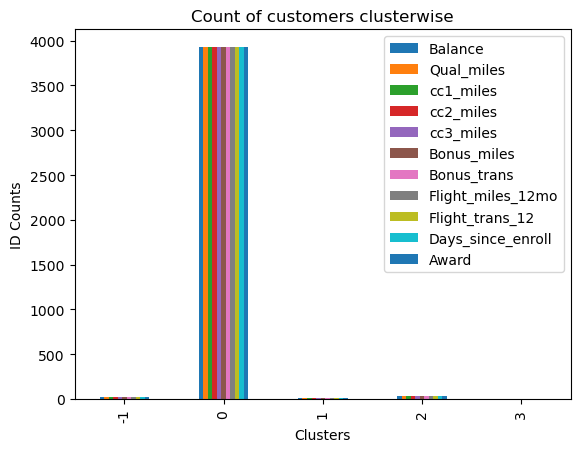

In [51]:
# Visualizaton of dataset clusterwise
airline_db.groupby(['Clusters']).count().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('ID Counts')
plt.title('Count of customers clusterwise')
plt.show()

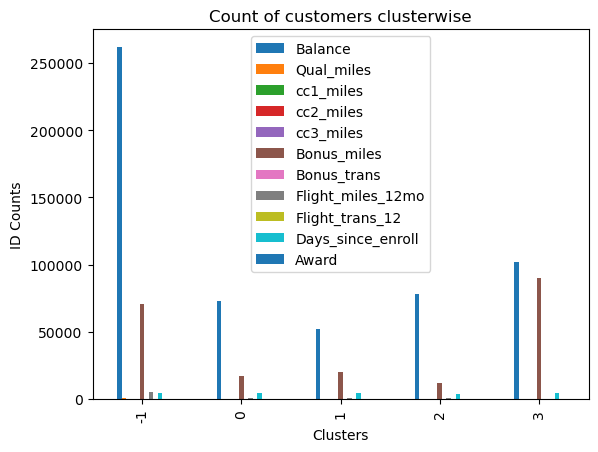

In [52]:
# Visualizaton of dataset clusterwise
airline_db.groupby(['Clusters']).mean().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('ID Counts')
plt.title('Count of customers clusterwise')
plt.show()

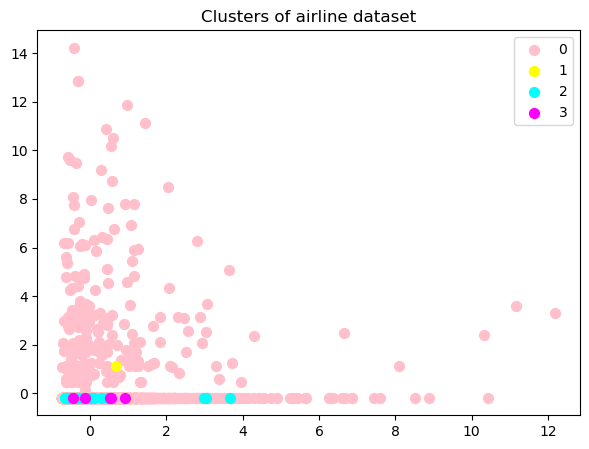

In [53]:
# Clusters visualization - scatter form
x = airline_std
y_means = labels
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')

plt.legend([0, 1, 2, 3])
plt.title('Clusters of airline dataset')
plt.show()

### Problem statement - 2

#### Exploratory Data Analysis

In [54]:
# Loading dataset

crime_df = pd.read_csv(r'./crime_data.csv')

#Glance of data
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [55]:
crime_df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [56]:
# 1. Column renaming
crime_df.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [57]:
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [58]:
#2. Shape of data
crime_df.shape

(50, 5)

In [59]:
#3. Technical information of data
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [60]:
#4. Statistical summary of data
crime_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [61]:
#5. Presence of null values
crime_df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [62]:
#6. Presence of duplicate values
crime_df.duplicated().sum()

0

#### Visualization

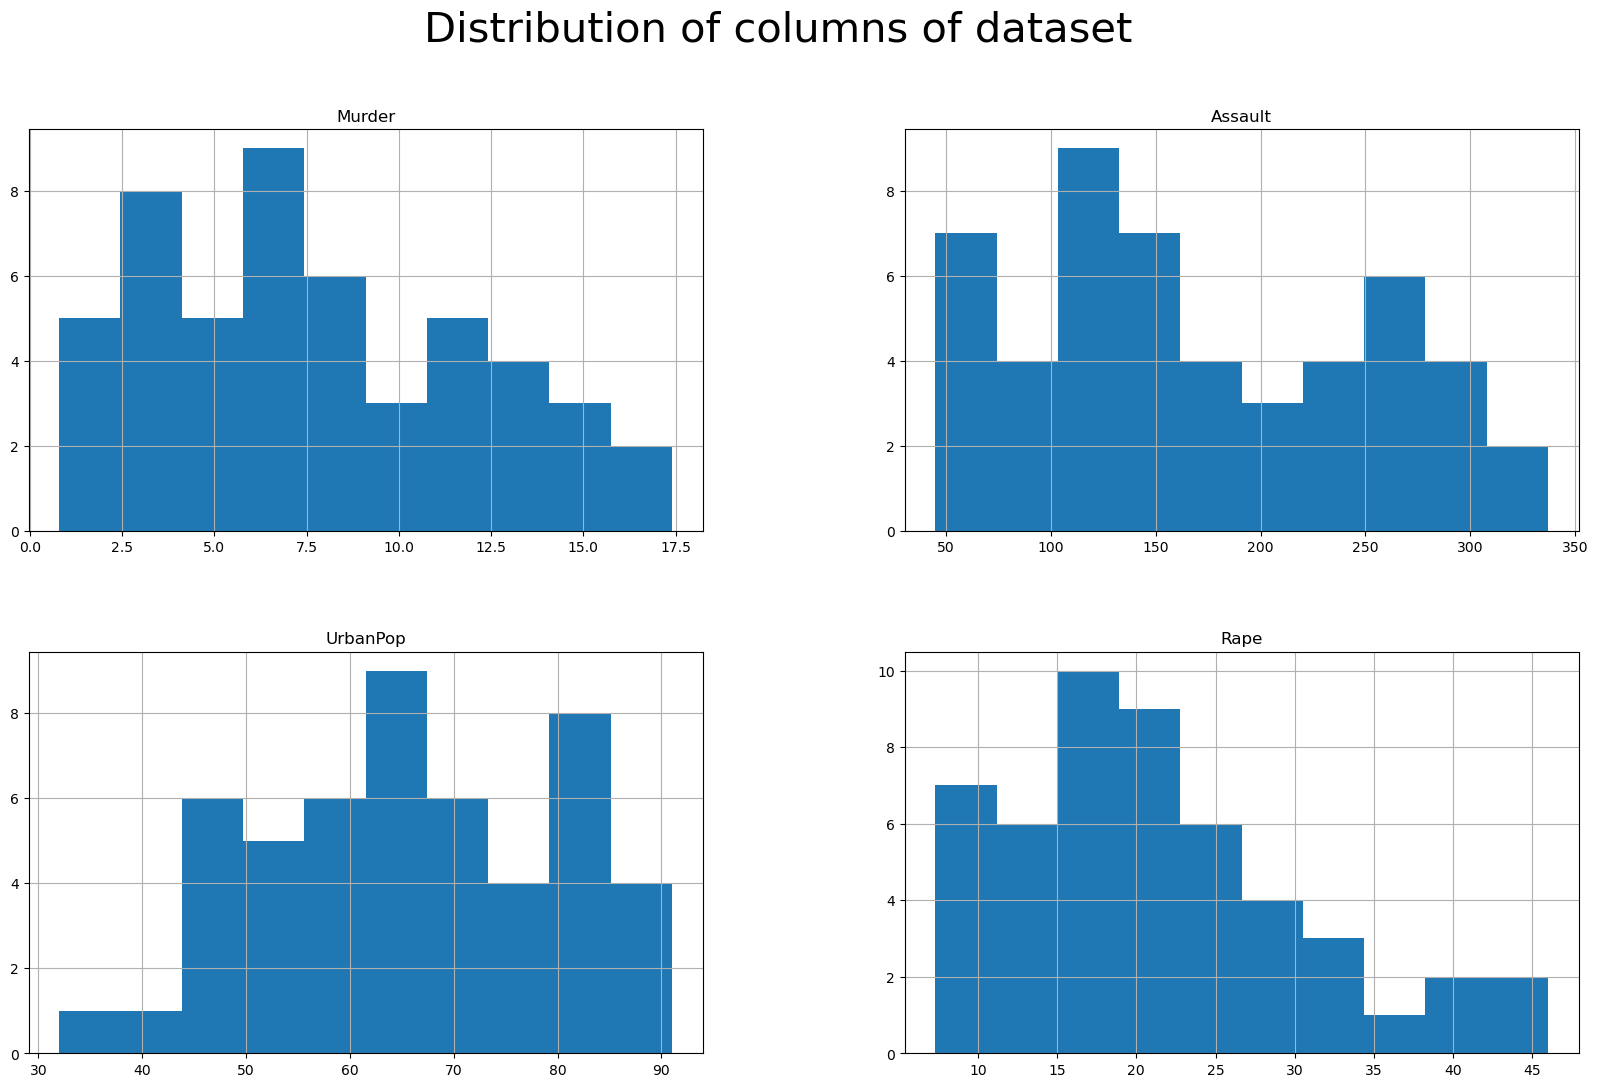

In [63]:
#7. Visualisation of distribution of dataset

crime_df.hist(figsize=(20, 12))
plt.suptitle('Distribution of columns of dataset', size=30)
plt.show()

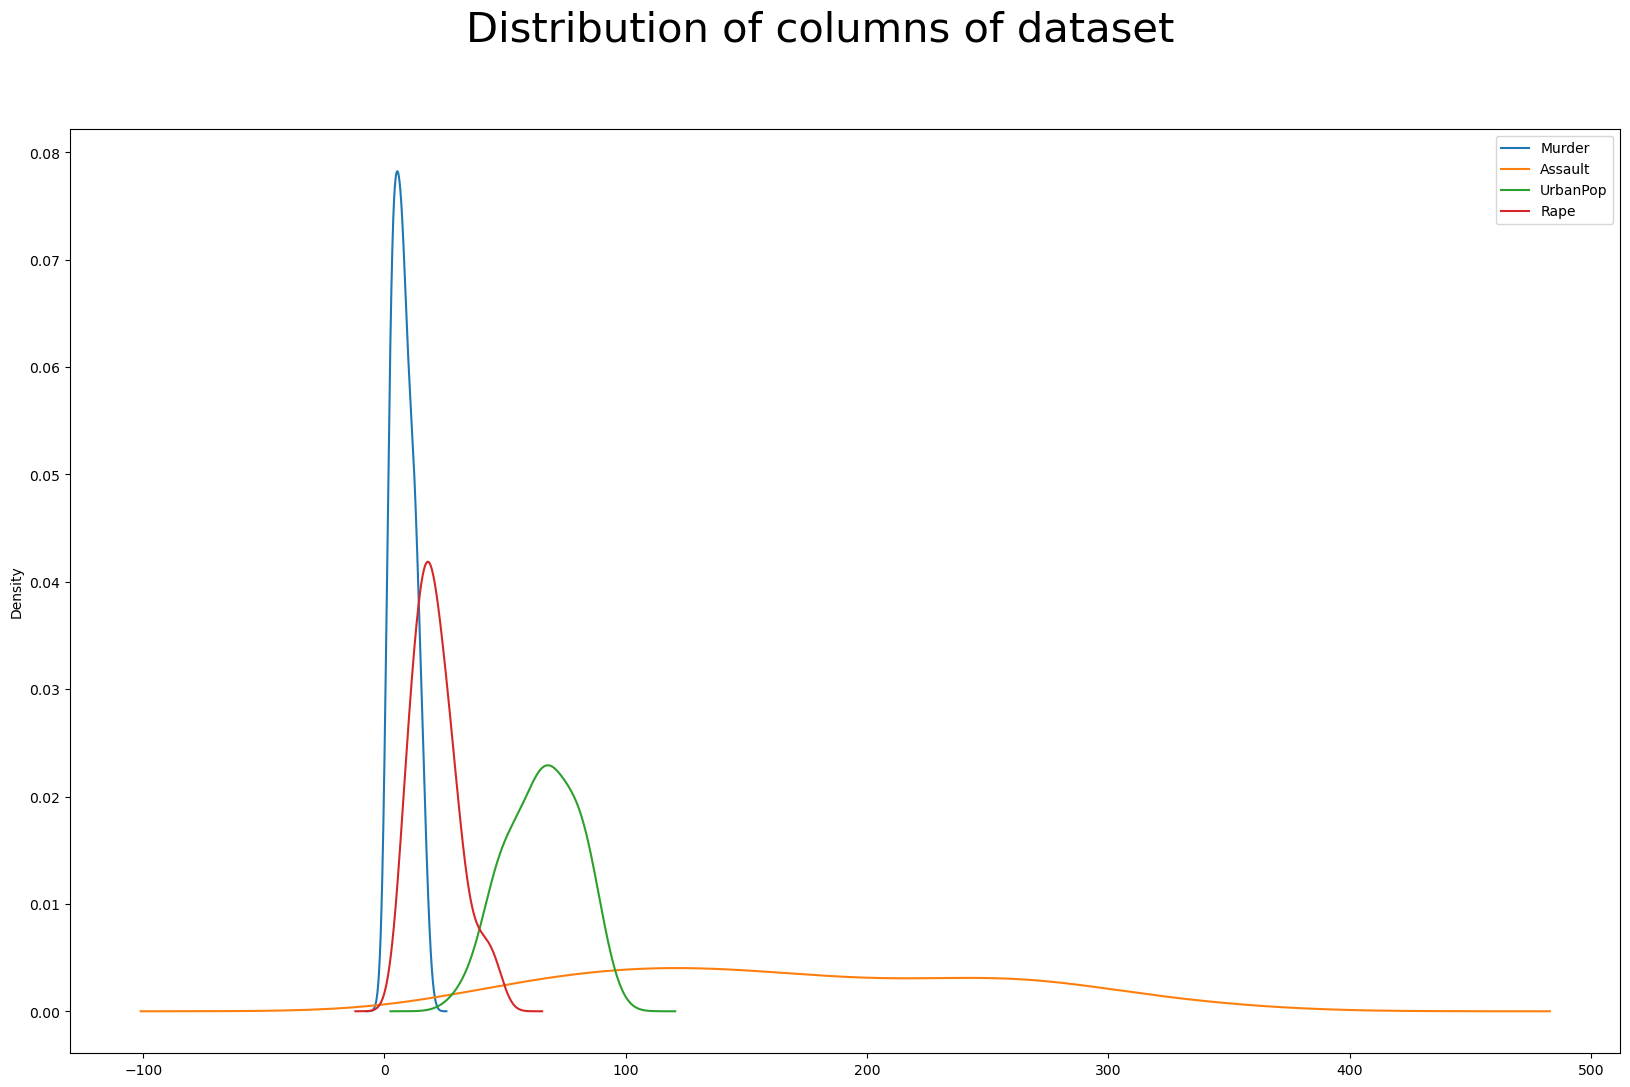

In [64]:
crime_df.plot(kind='kde', figsize=(20, 12))
plt.suptitle('Distribution of columns of dataset', size=30)
plt.show()

In [65]:
# Skewness in the dataset
crime_df.skew(numeric_only=True)

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [66]:
#8. Correlation b/w datasets
crime_df.corr(numeric_only=True)

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


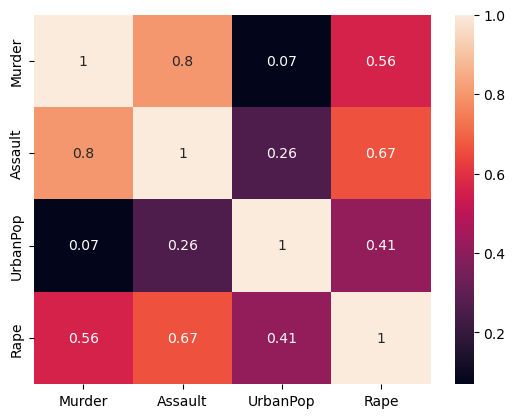

In [67]:
# Correlation visualization

sns.heatmap(data=crime_df.drop('State', axis=1).corr(), annot=True)
plt.show()

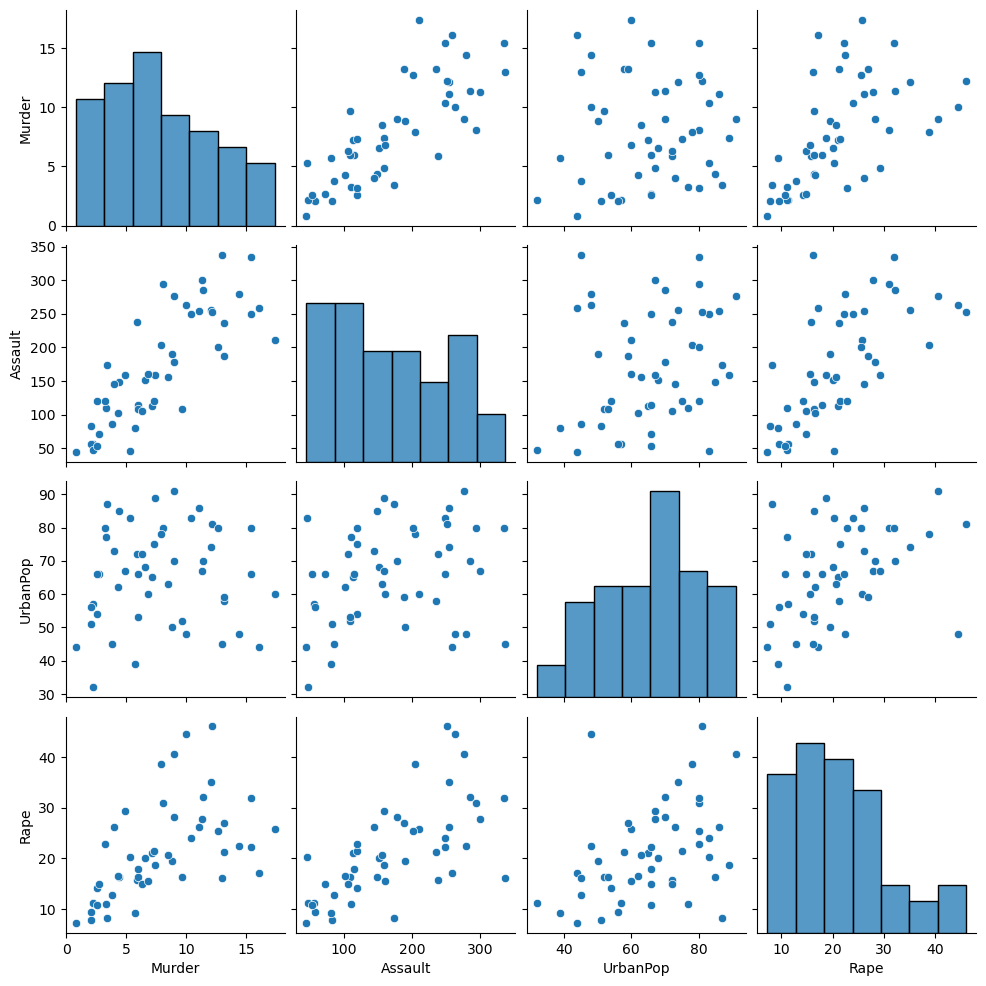

In [68]:
sns.pairplot(data=crime_df)
plt.show()

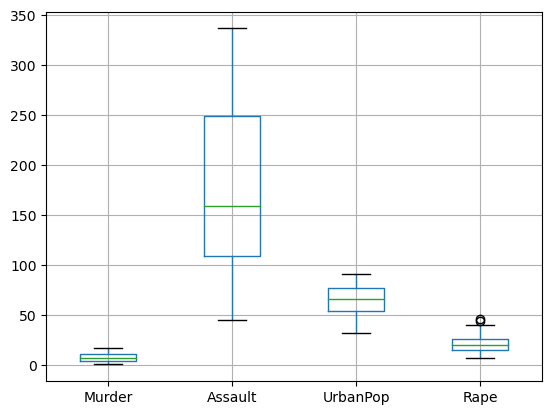

In [69]:
#9. Presence of outliers
crime_df.drop('State', axis=1).boxplot()
plt.show()

Observations:
1. Given dataset has 50 records and 5 columns. First column renamed to State 
2. Datatypes of the dataset are consistent and all the data values are in numerical form except State.
3. Mean and standard deviation of data values of columns have significant differences and needs to be standardized.
4. No null values observed in the dataset 
5. No duplicate records found in the datset.
6. Only Rape column is right skewed and remaining columns are almost normally distributed.
7. Murder, Assault and Rape are positively correlated to each other and not with Urban population.
8. One outlier on upper side present in Rape column.
9. Heatmap and pairplots shows maximum part of the dataset have low correlation among attributes. Hence, various clustering techniques explored to analyse the dataset.

In [70]:
# Standardization of dataset

# Standard scaling
std_scaler = StandardScaler()
crime_std = std_scaler.fit_transform(crime_df.drop('State', axis=1))
crime_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [71]:
# MinMax scaling
mm_scaler = MinMaxScaler()
crime_mm = mm_scaler.fit_transform(crime_df.drop('State', axis=1))
crime_mm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

#### Hirarchical clustering

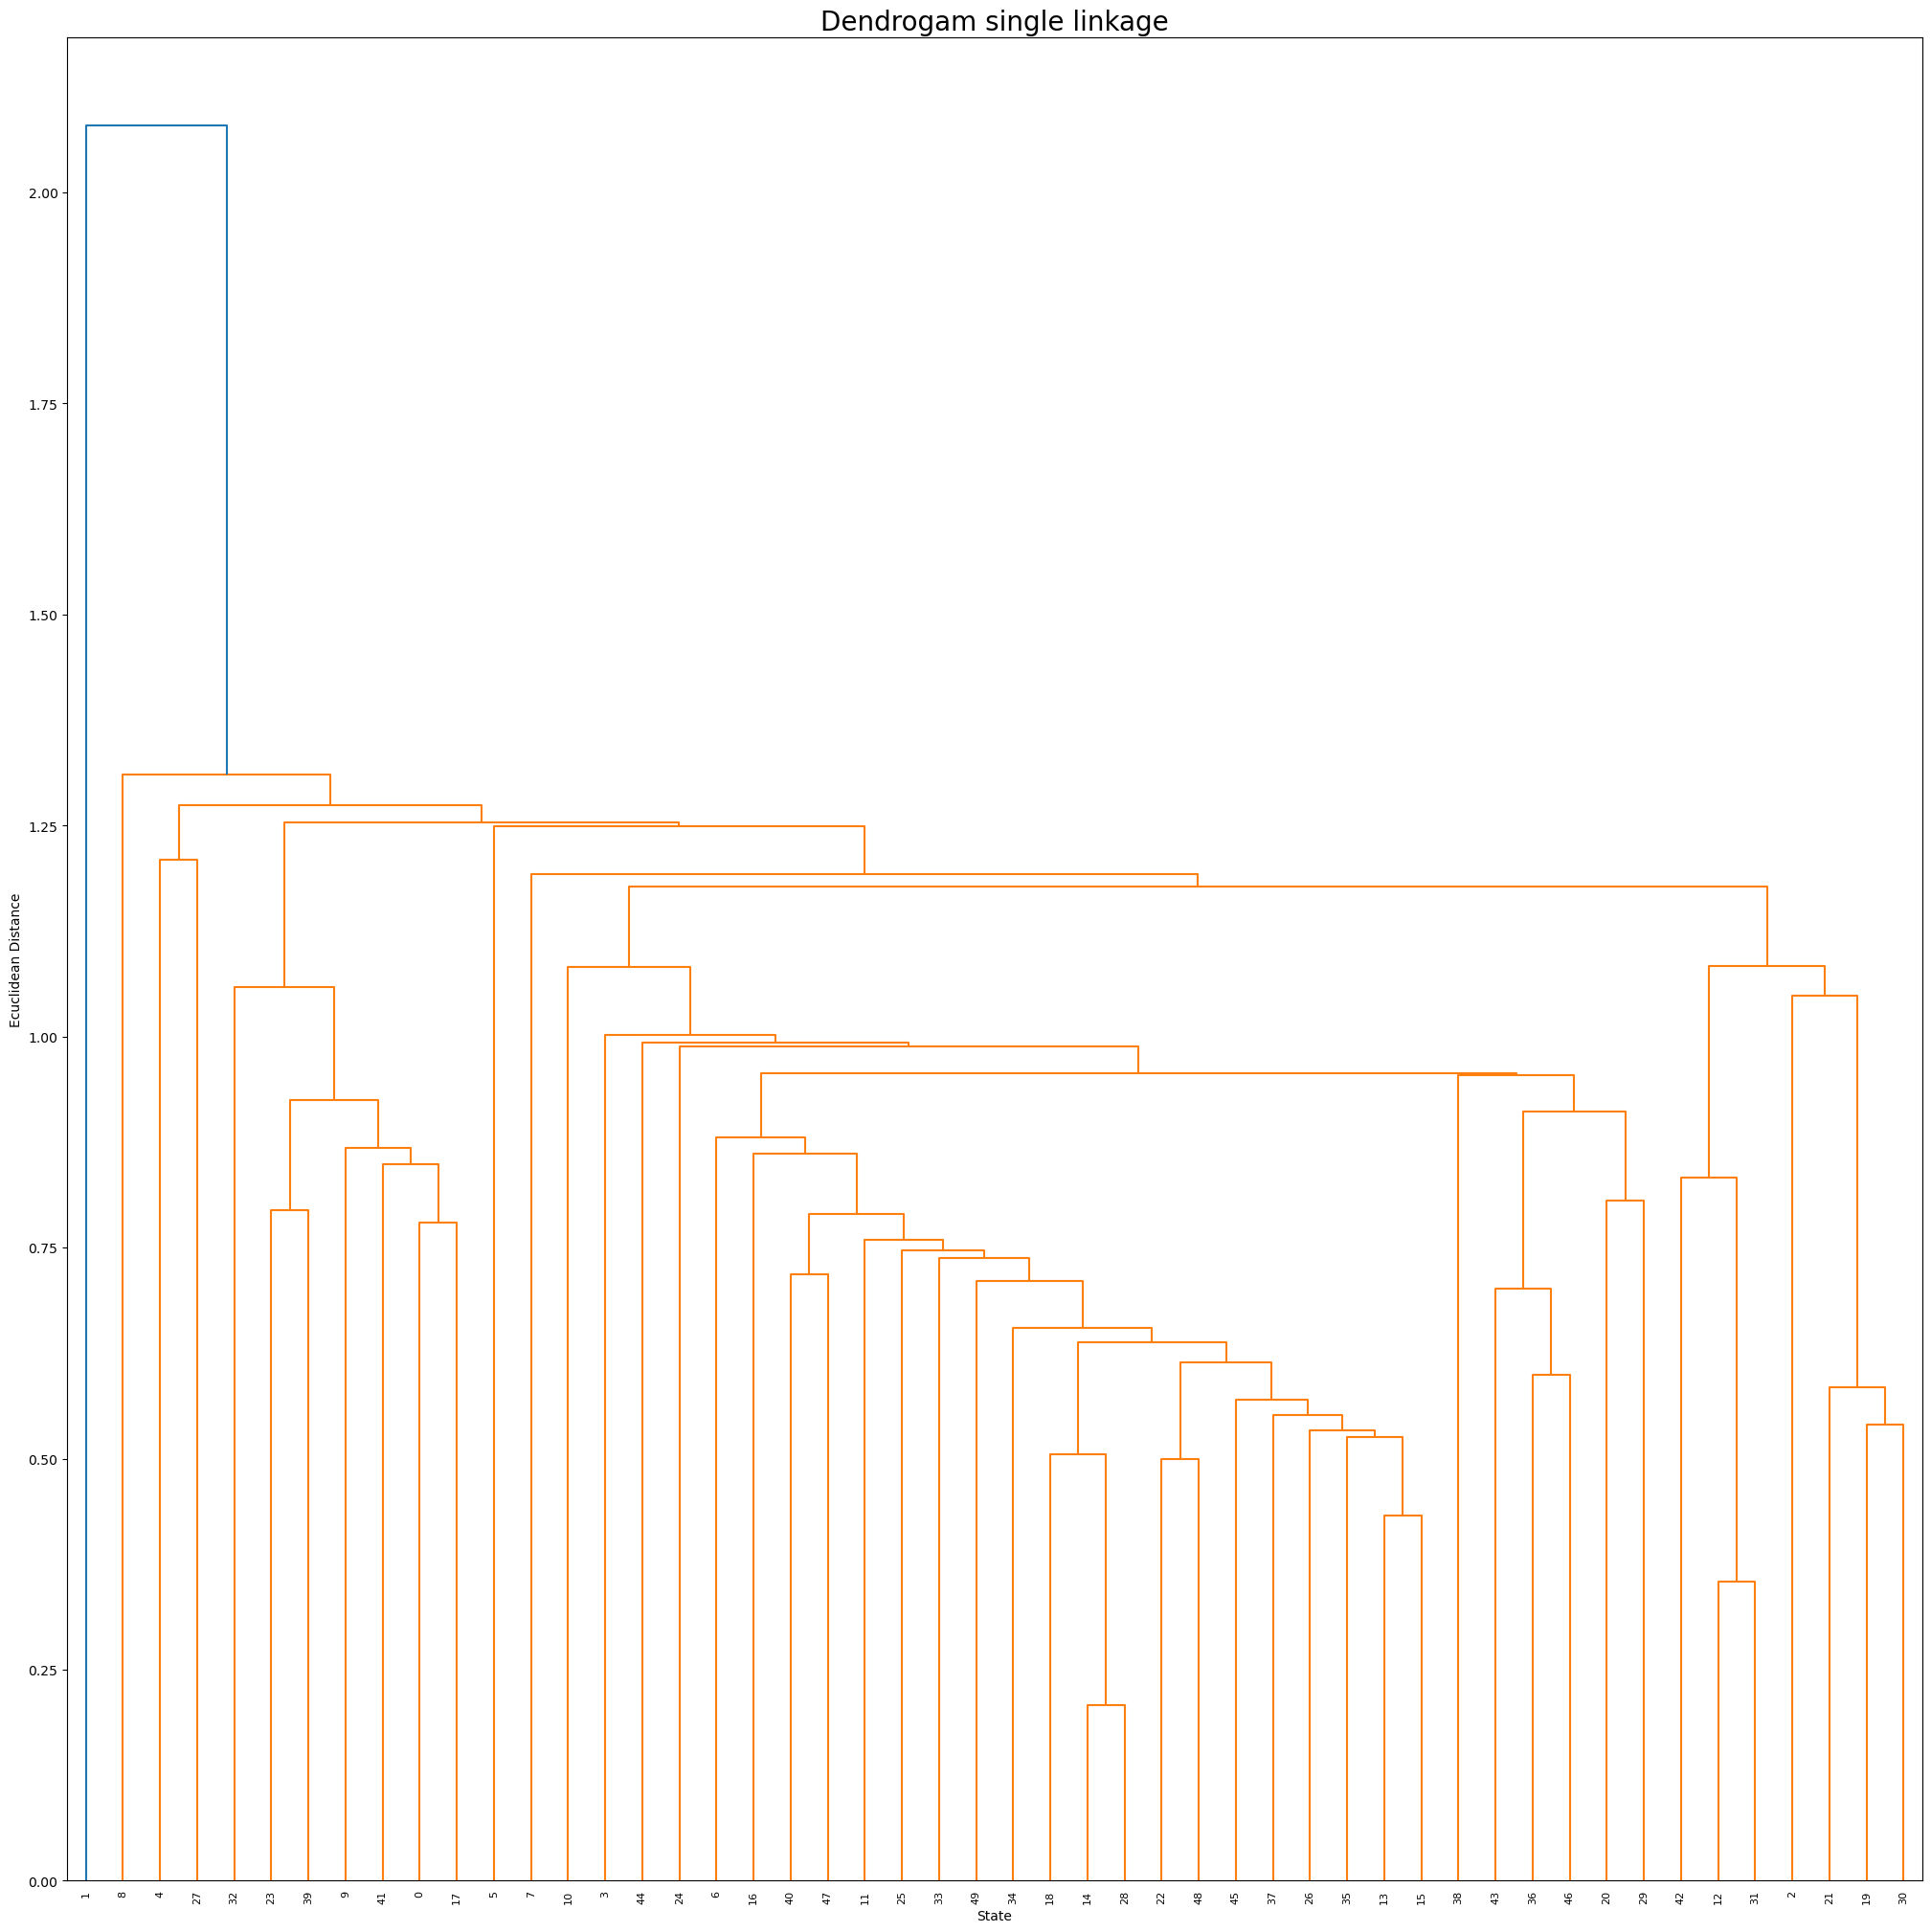

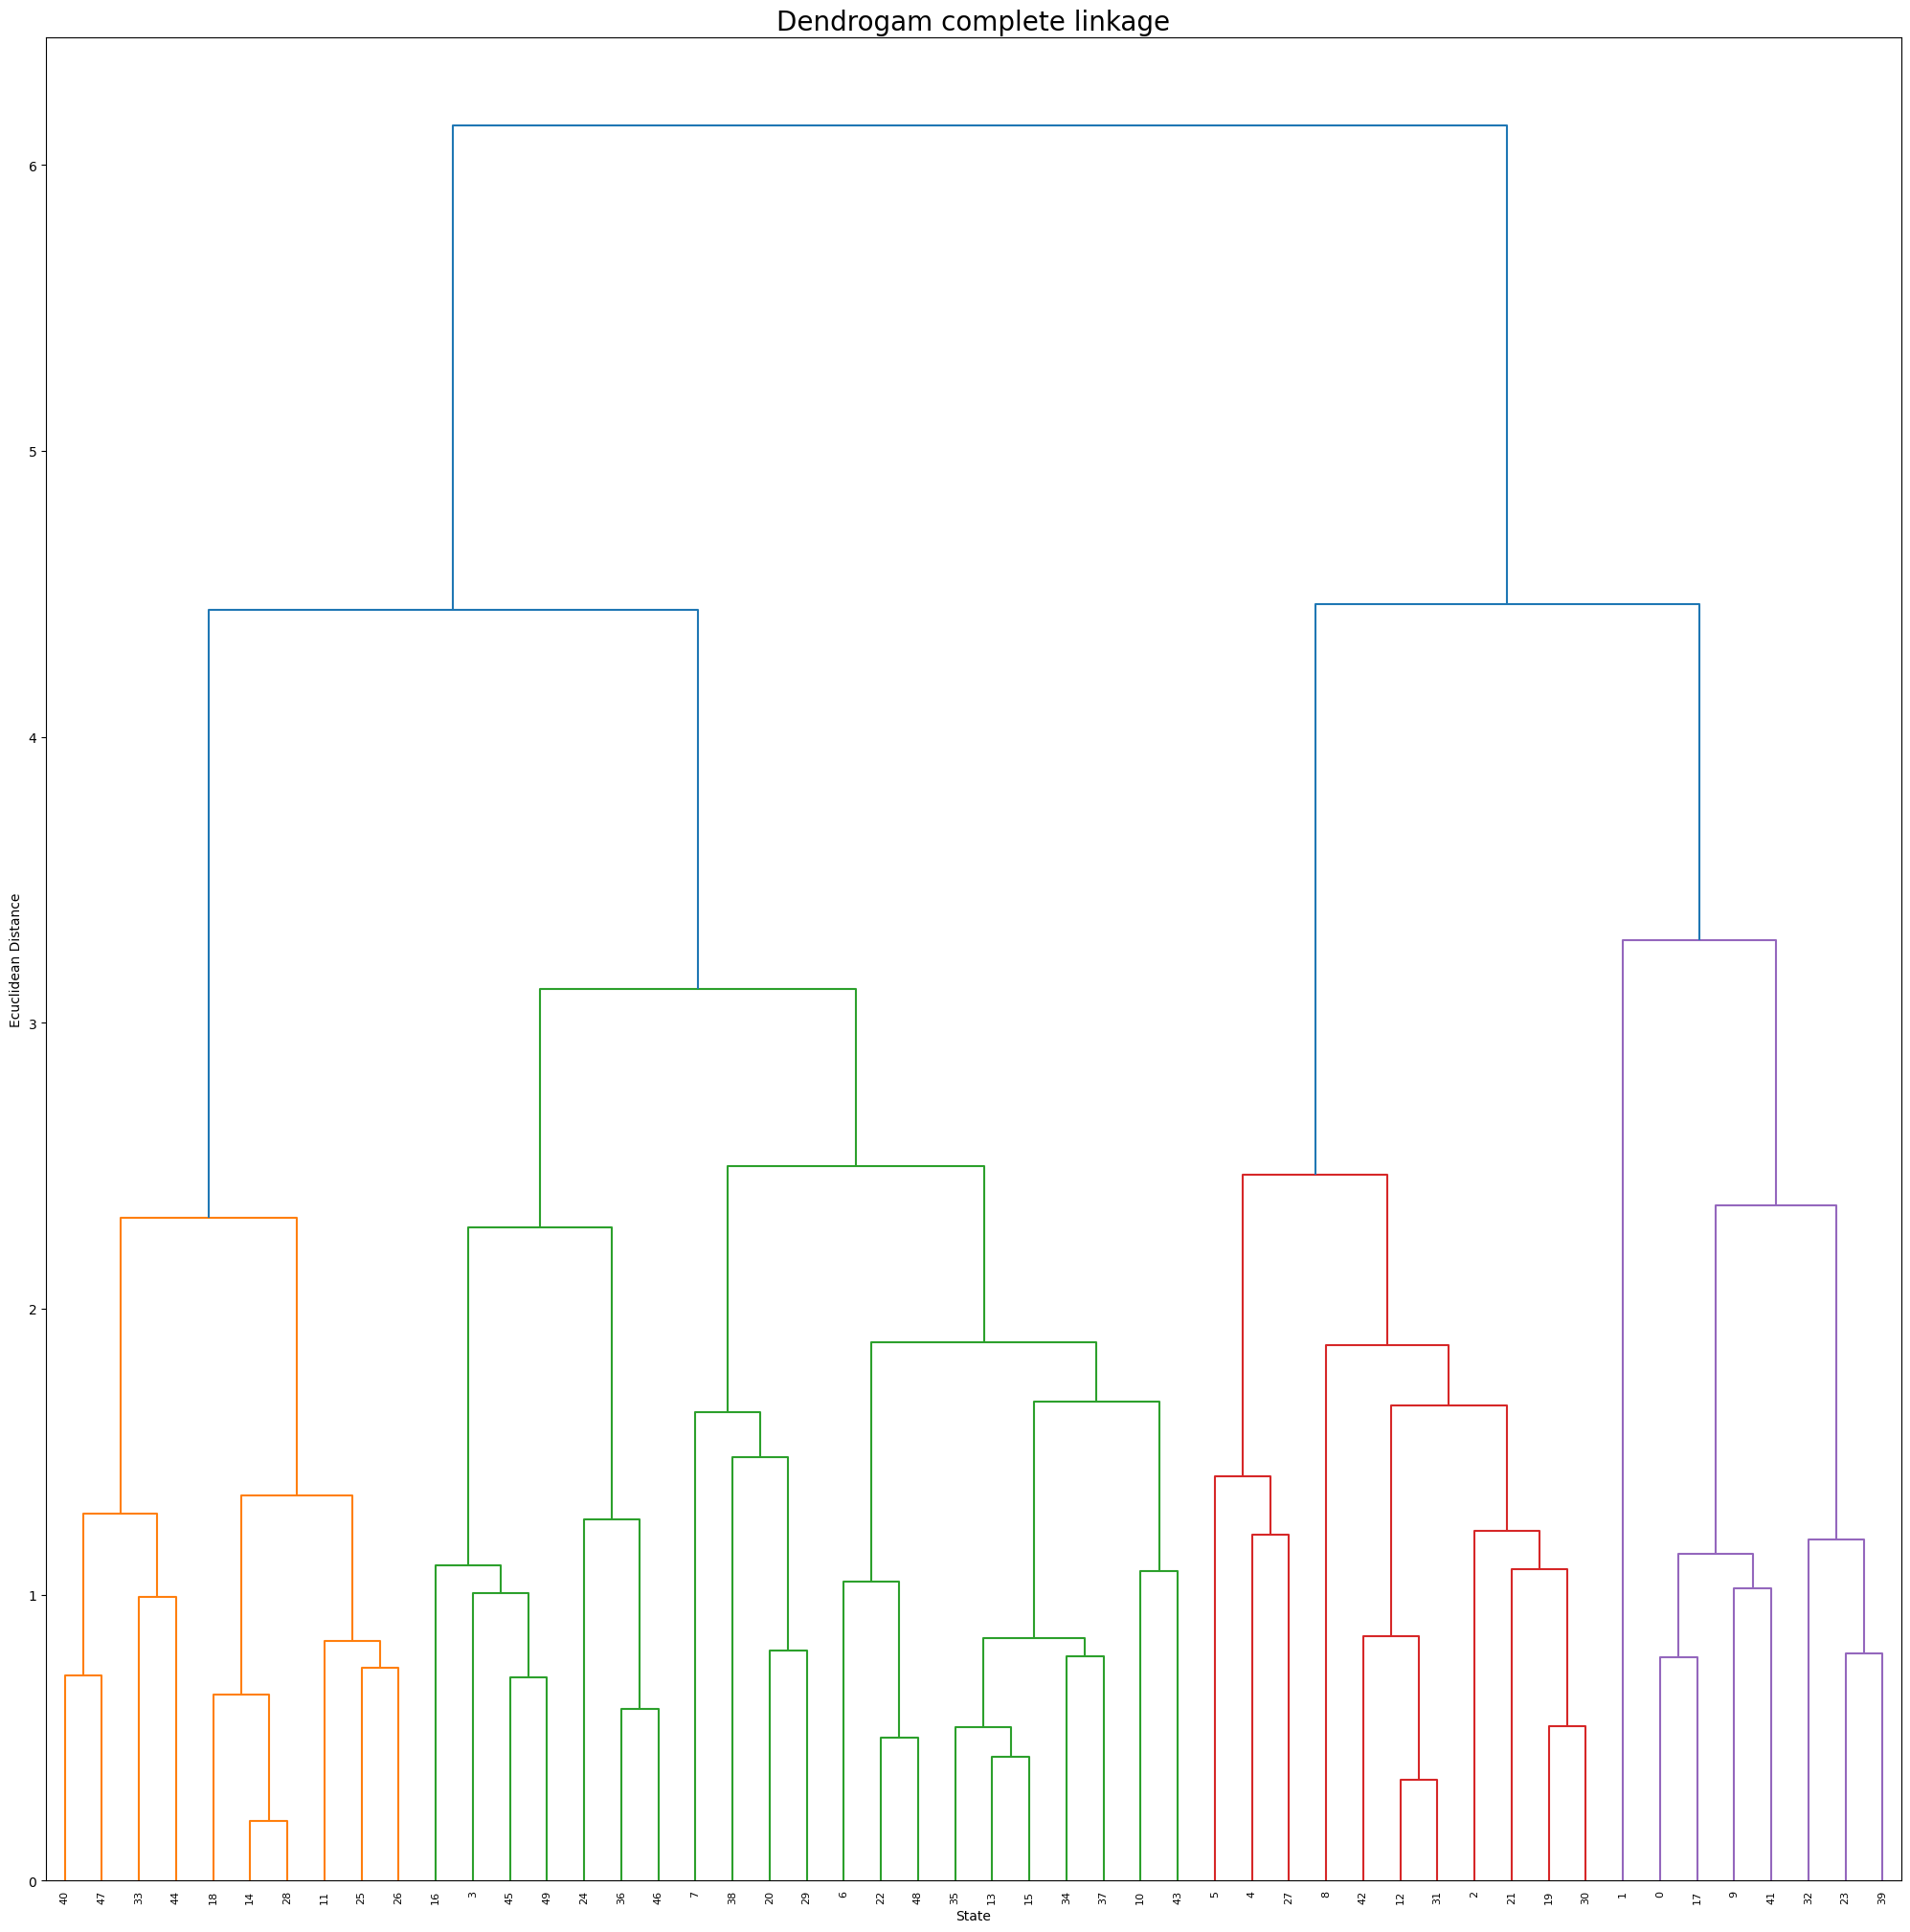

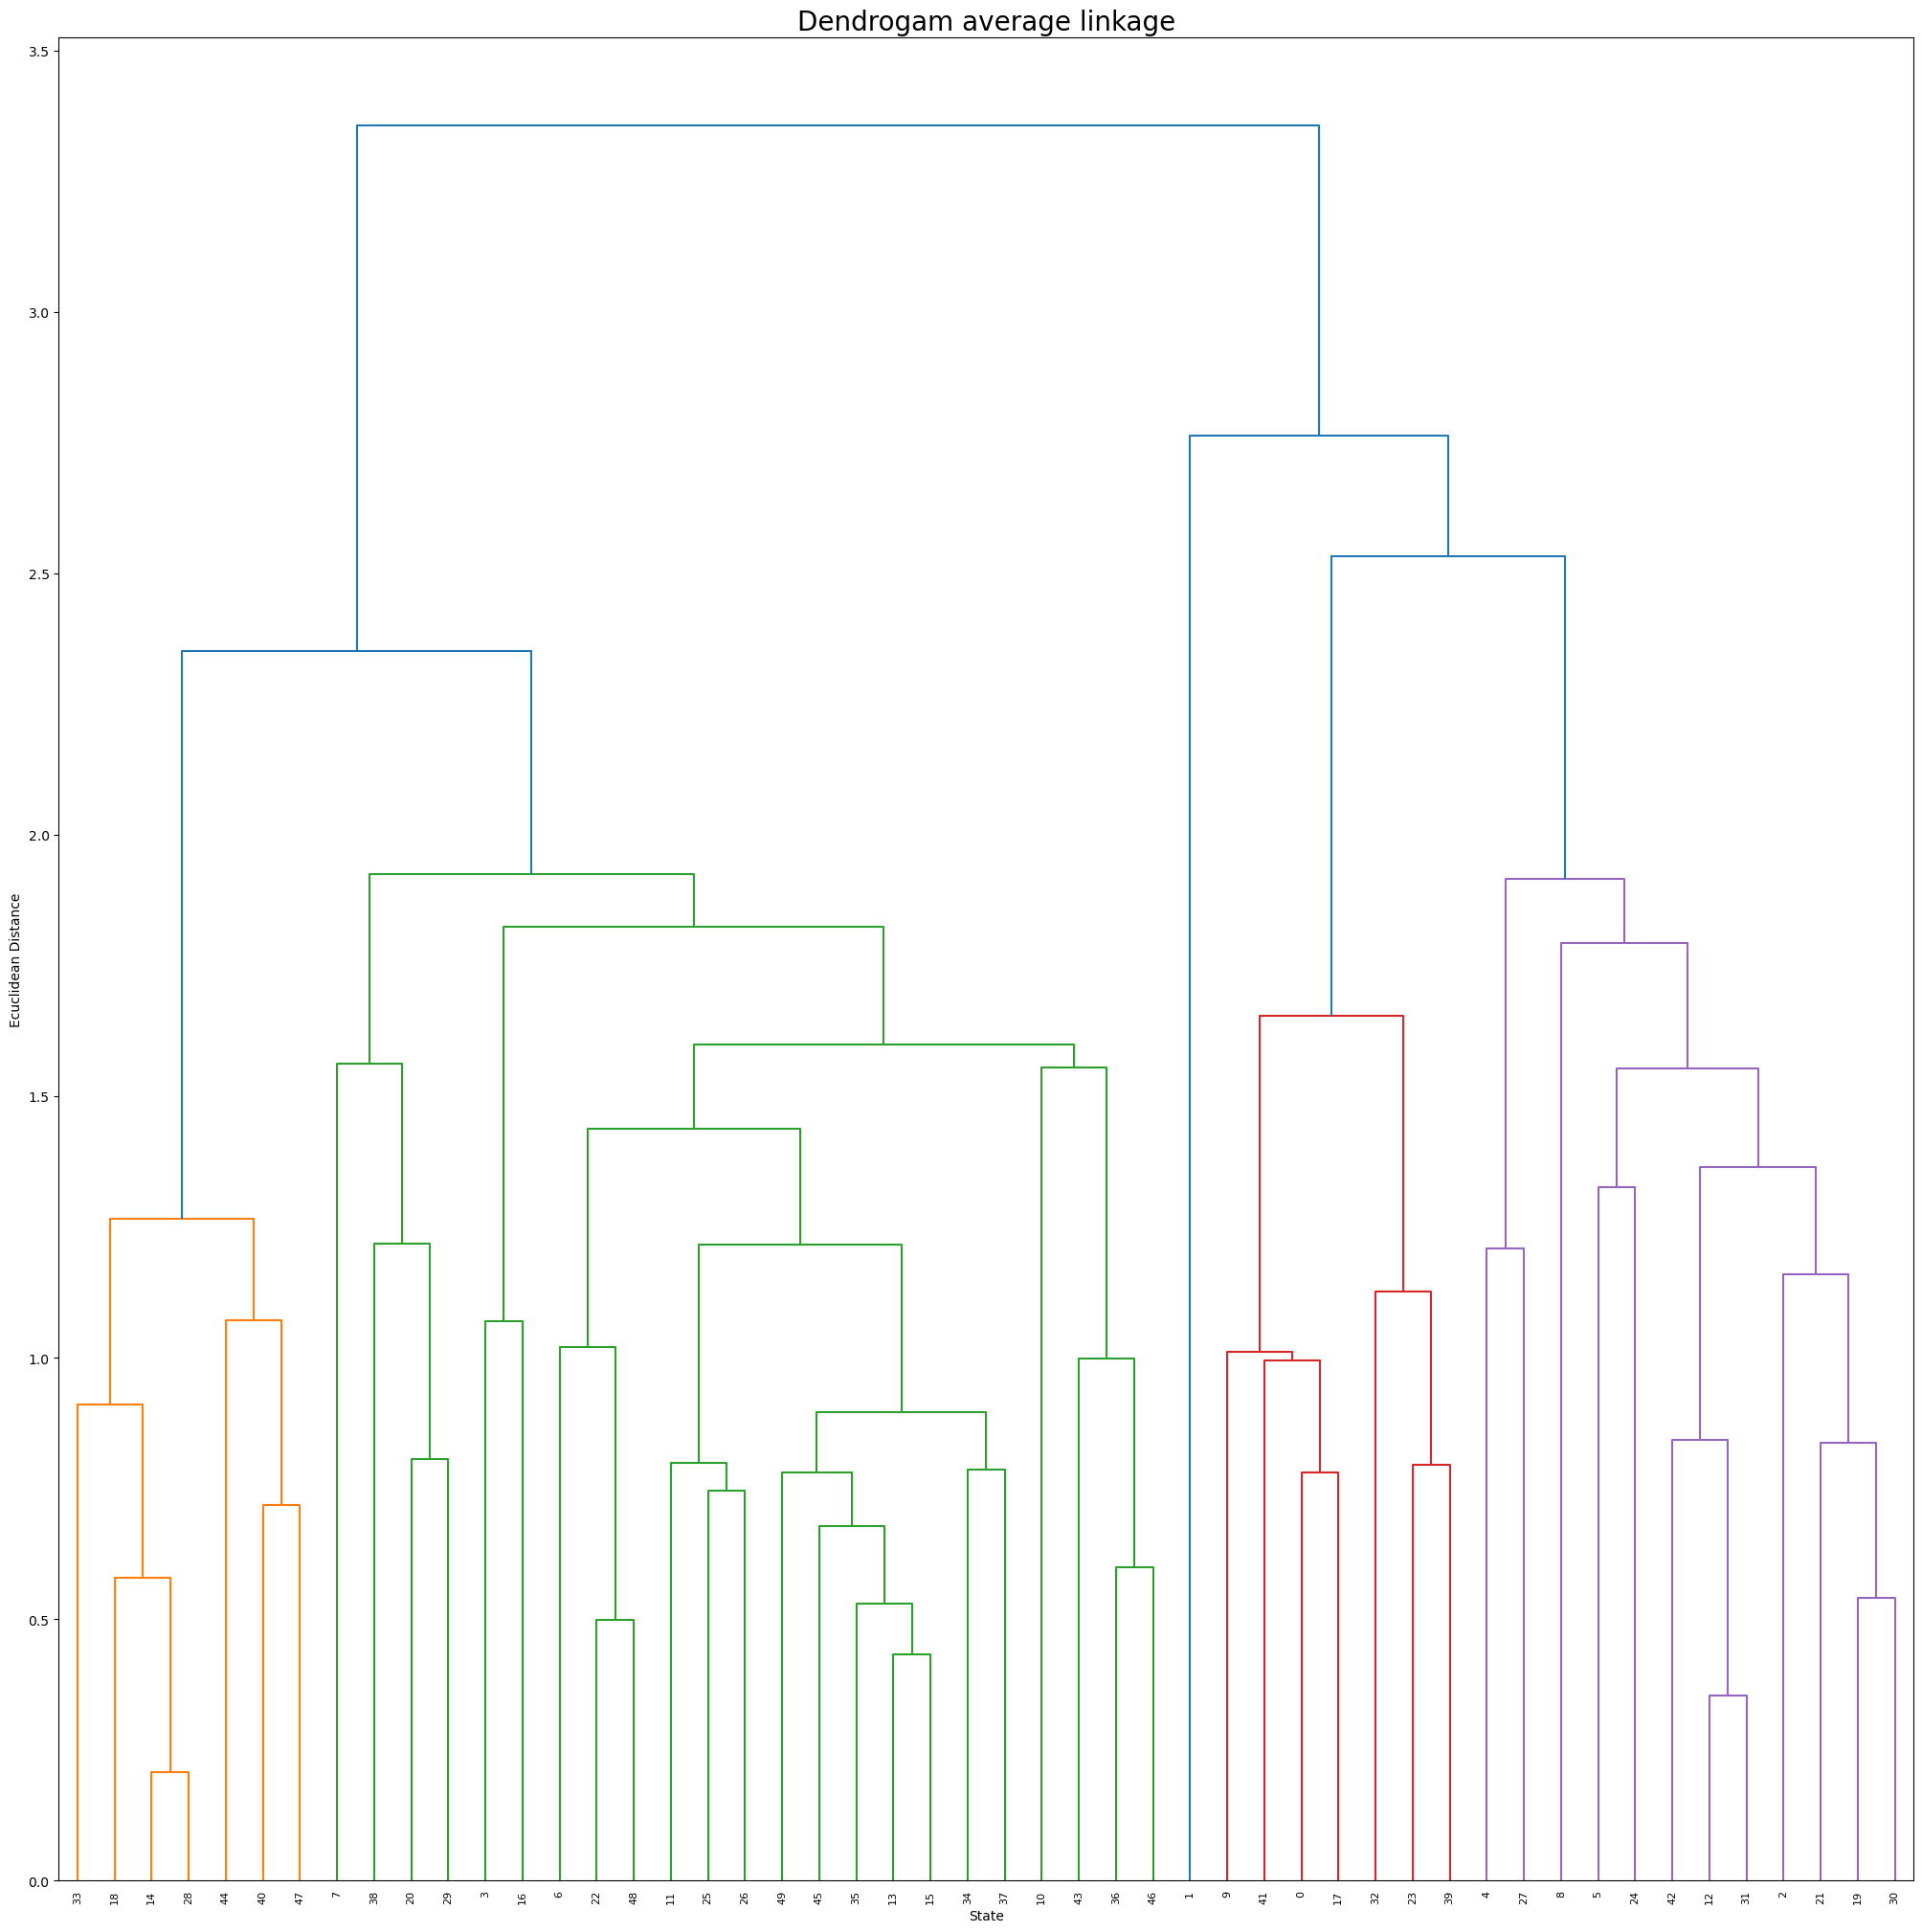

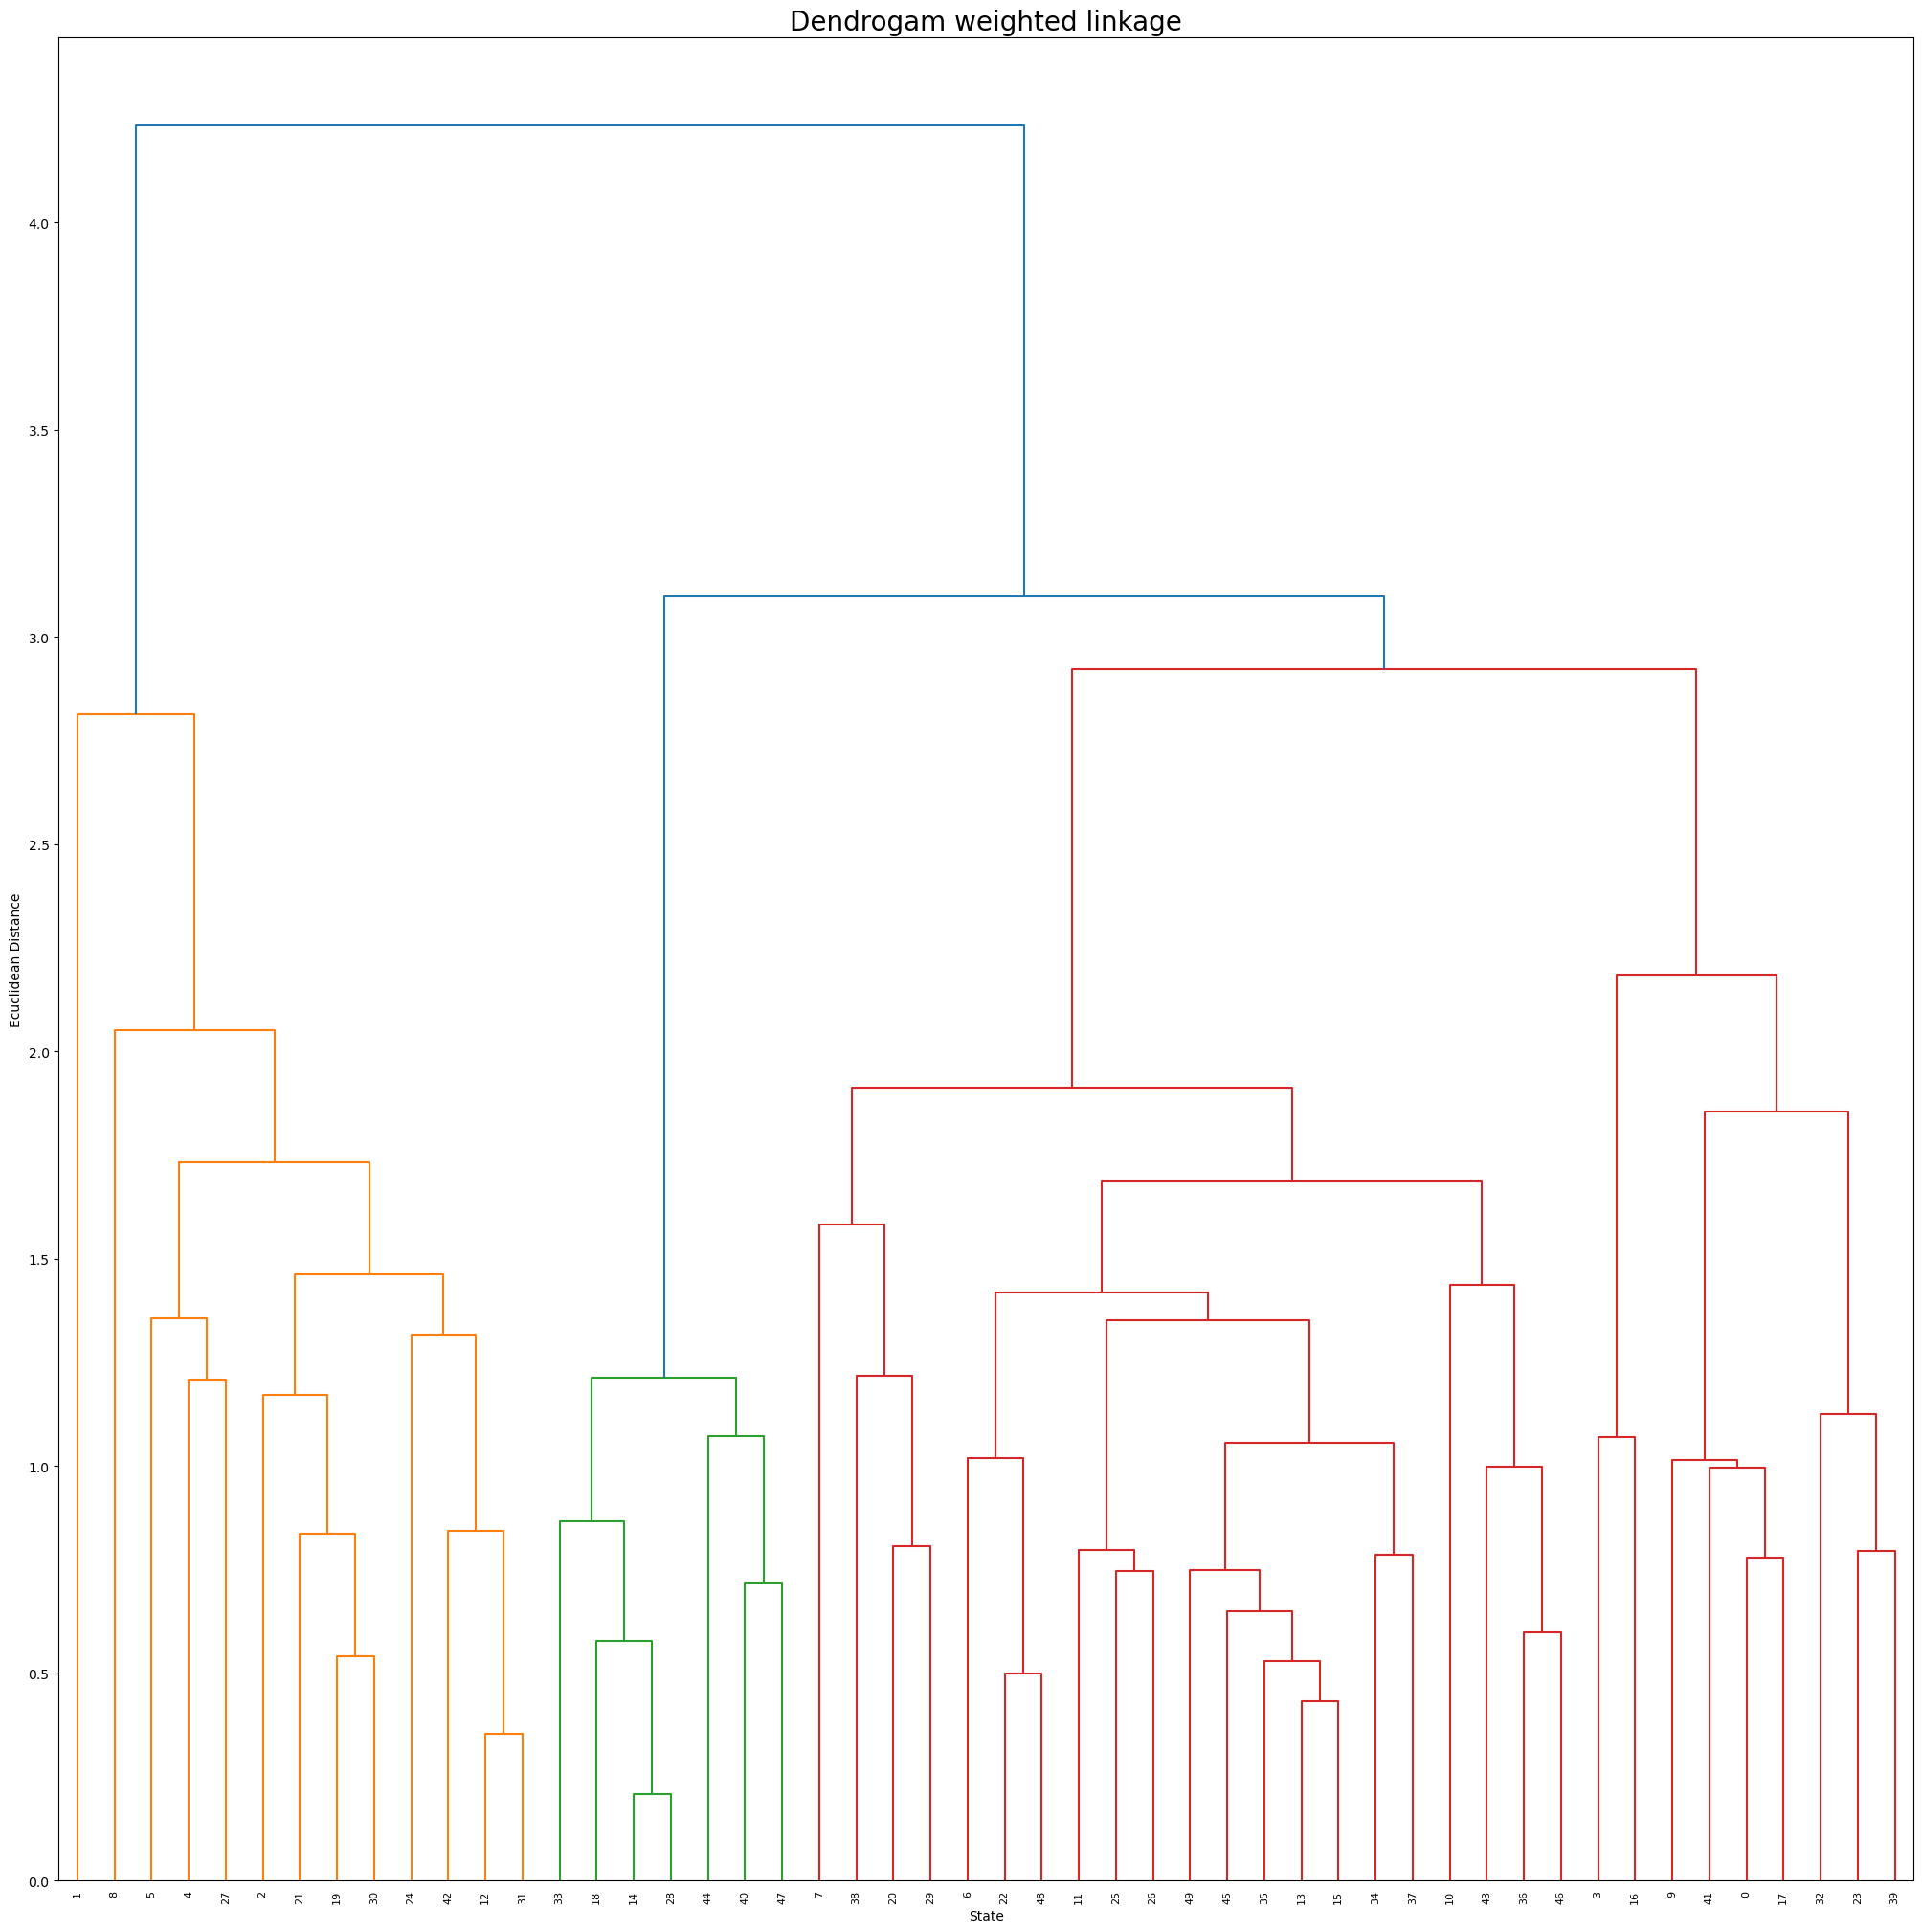

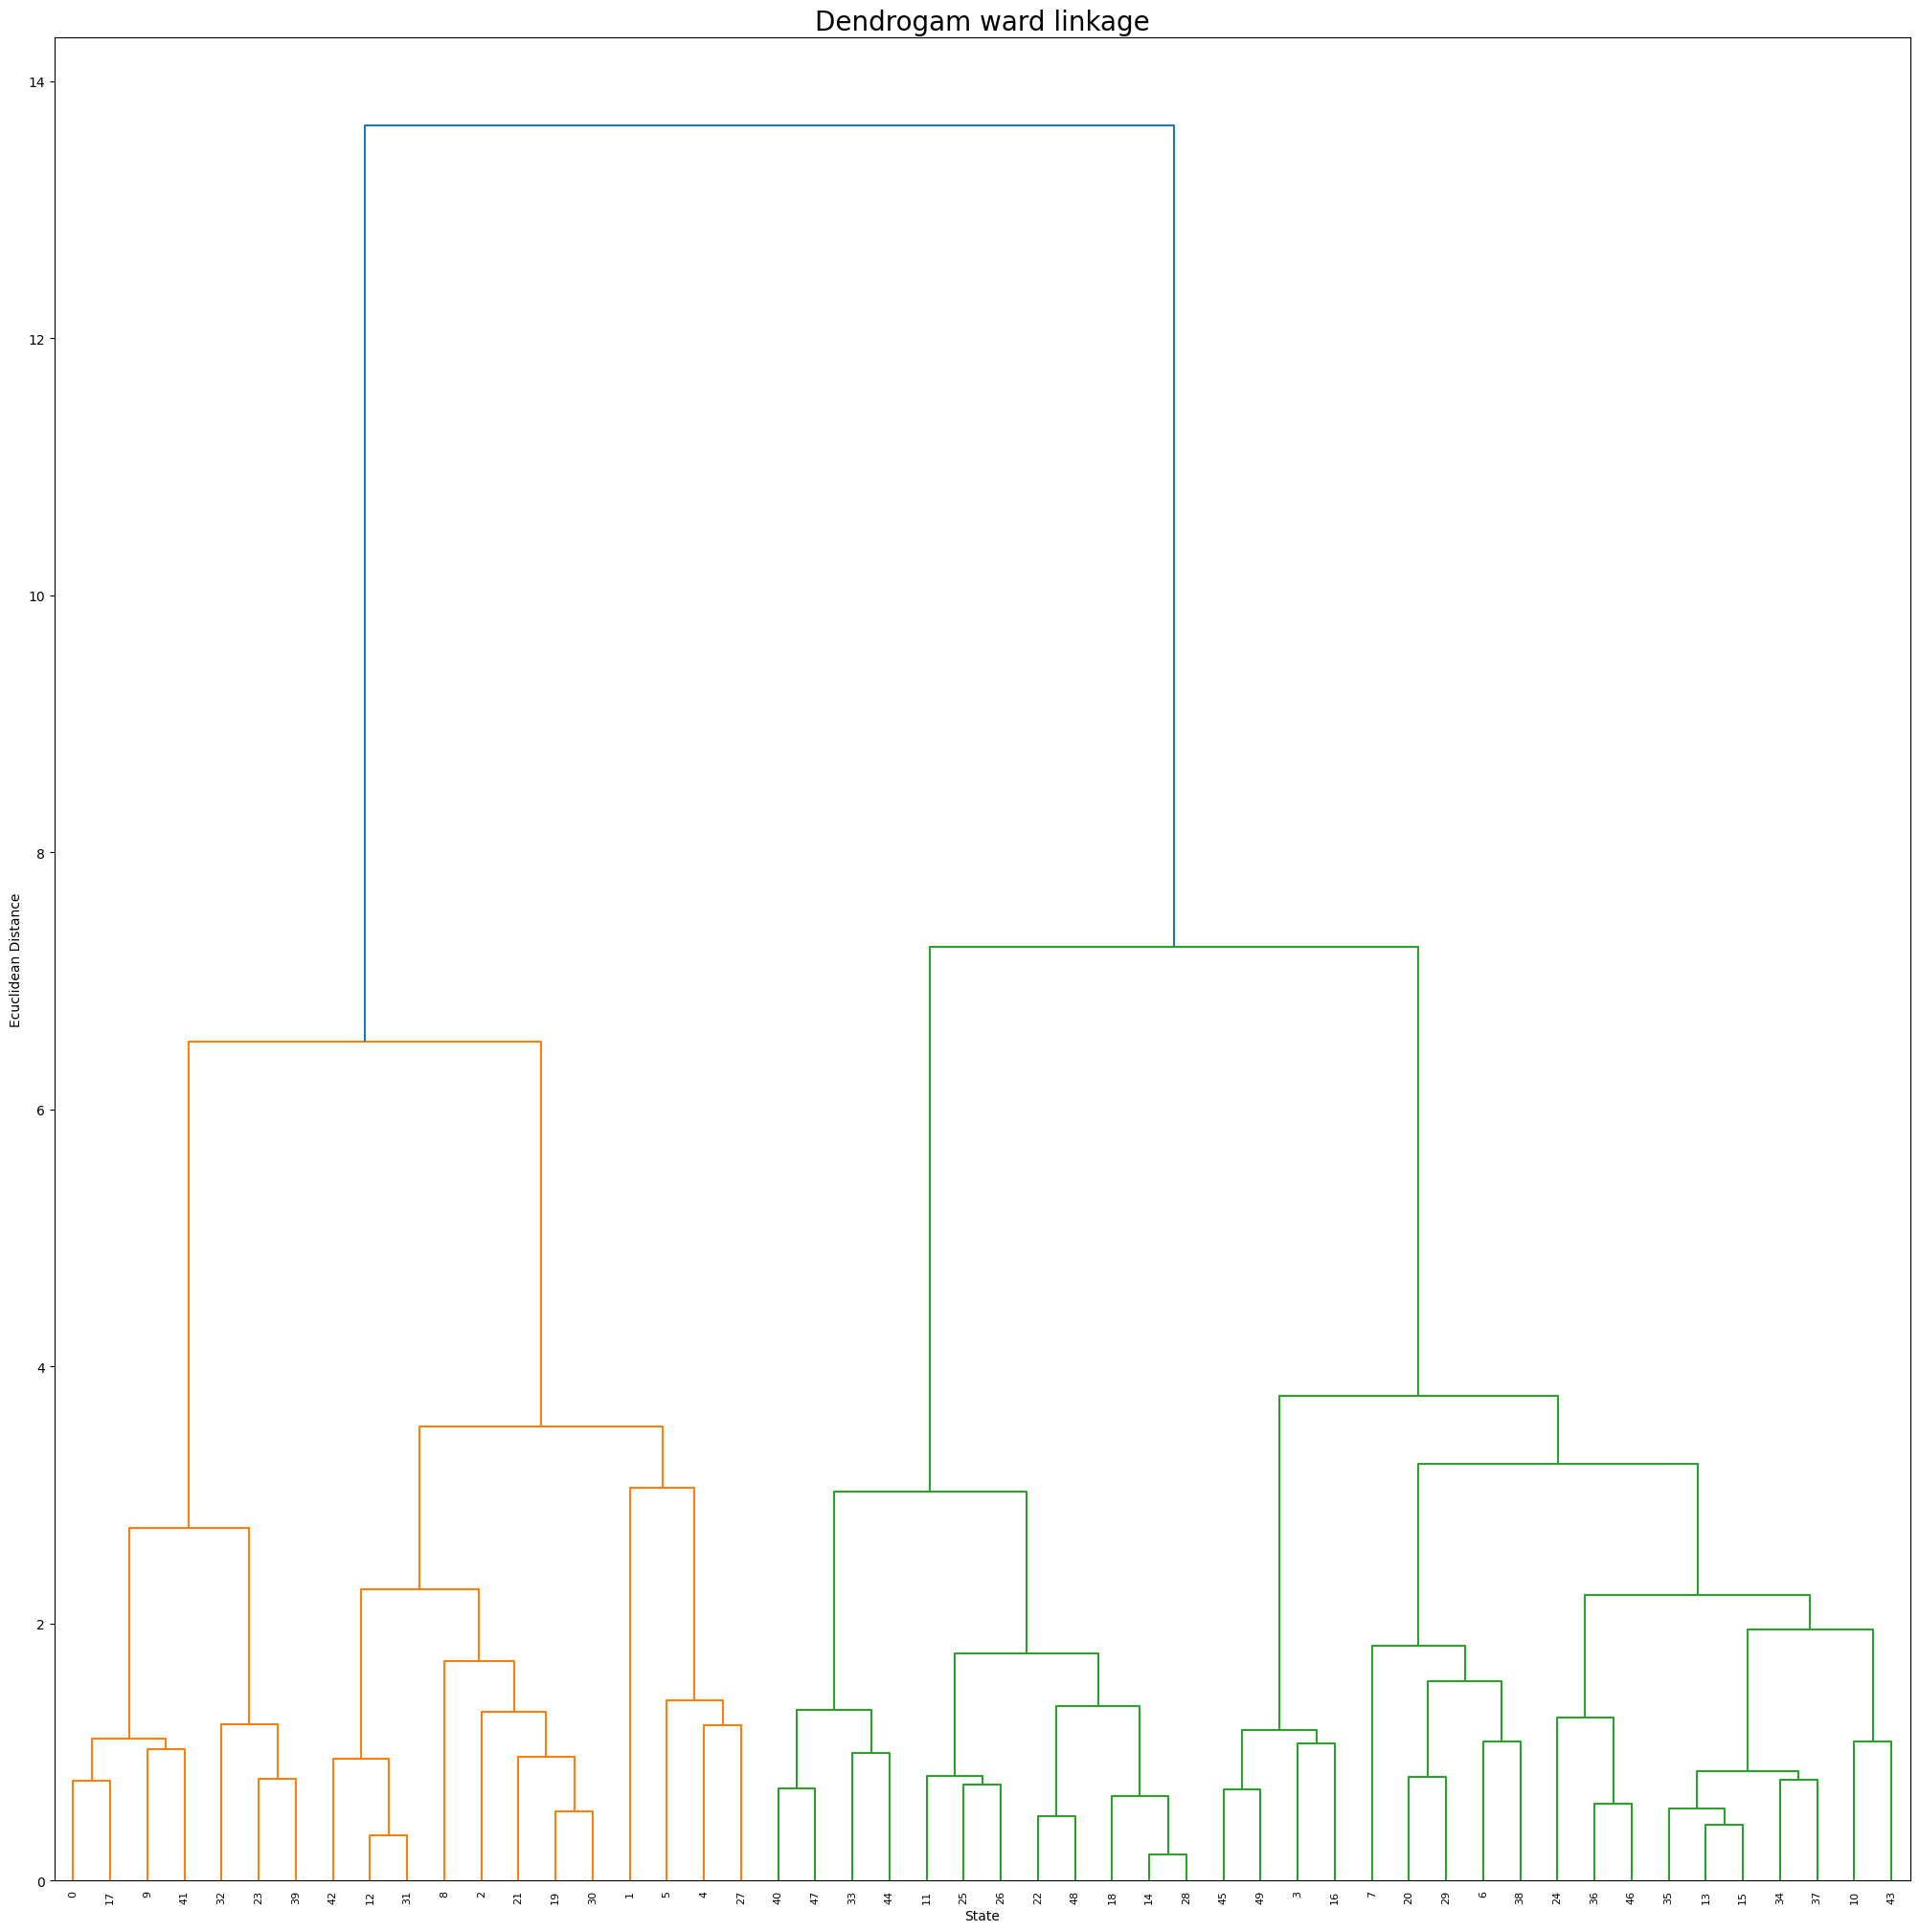

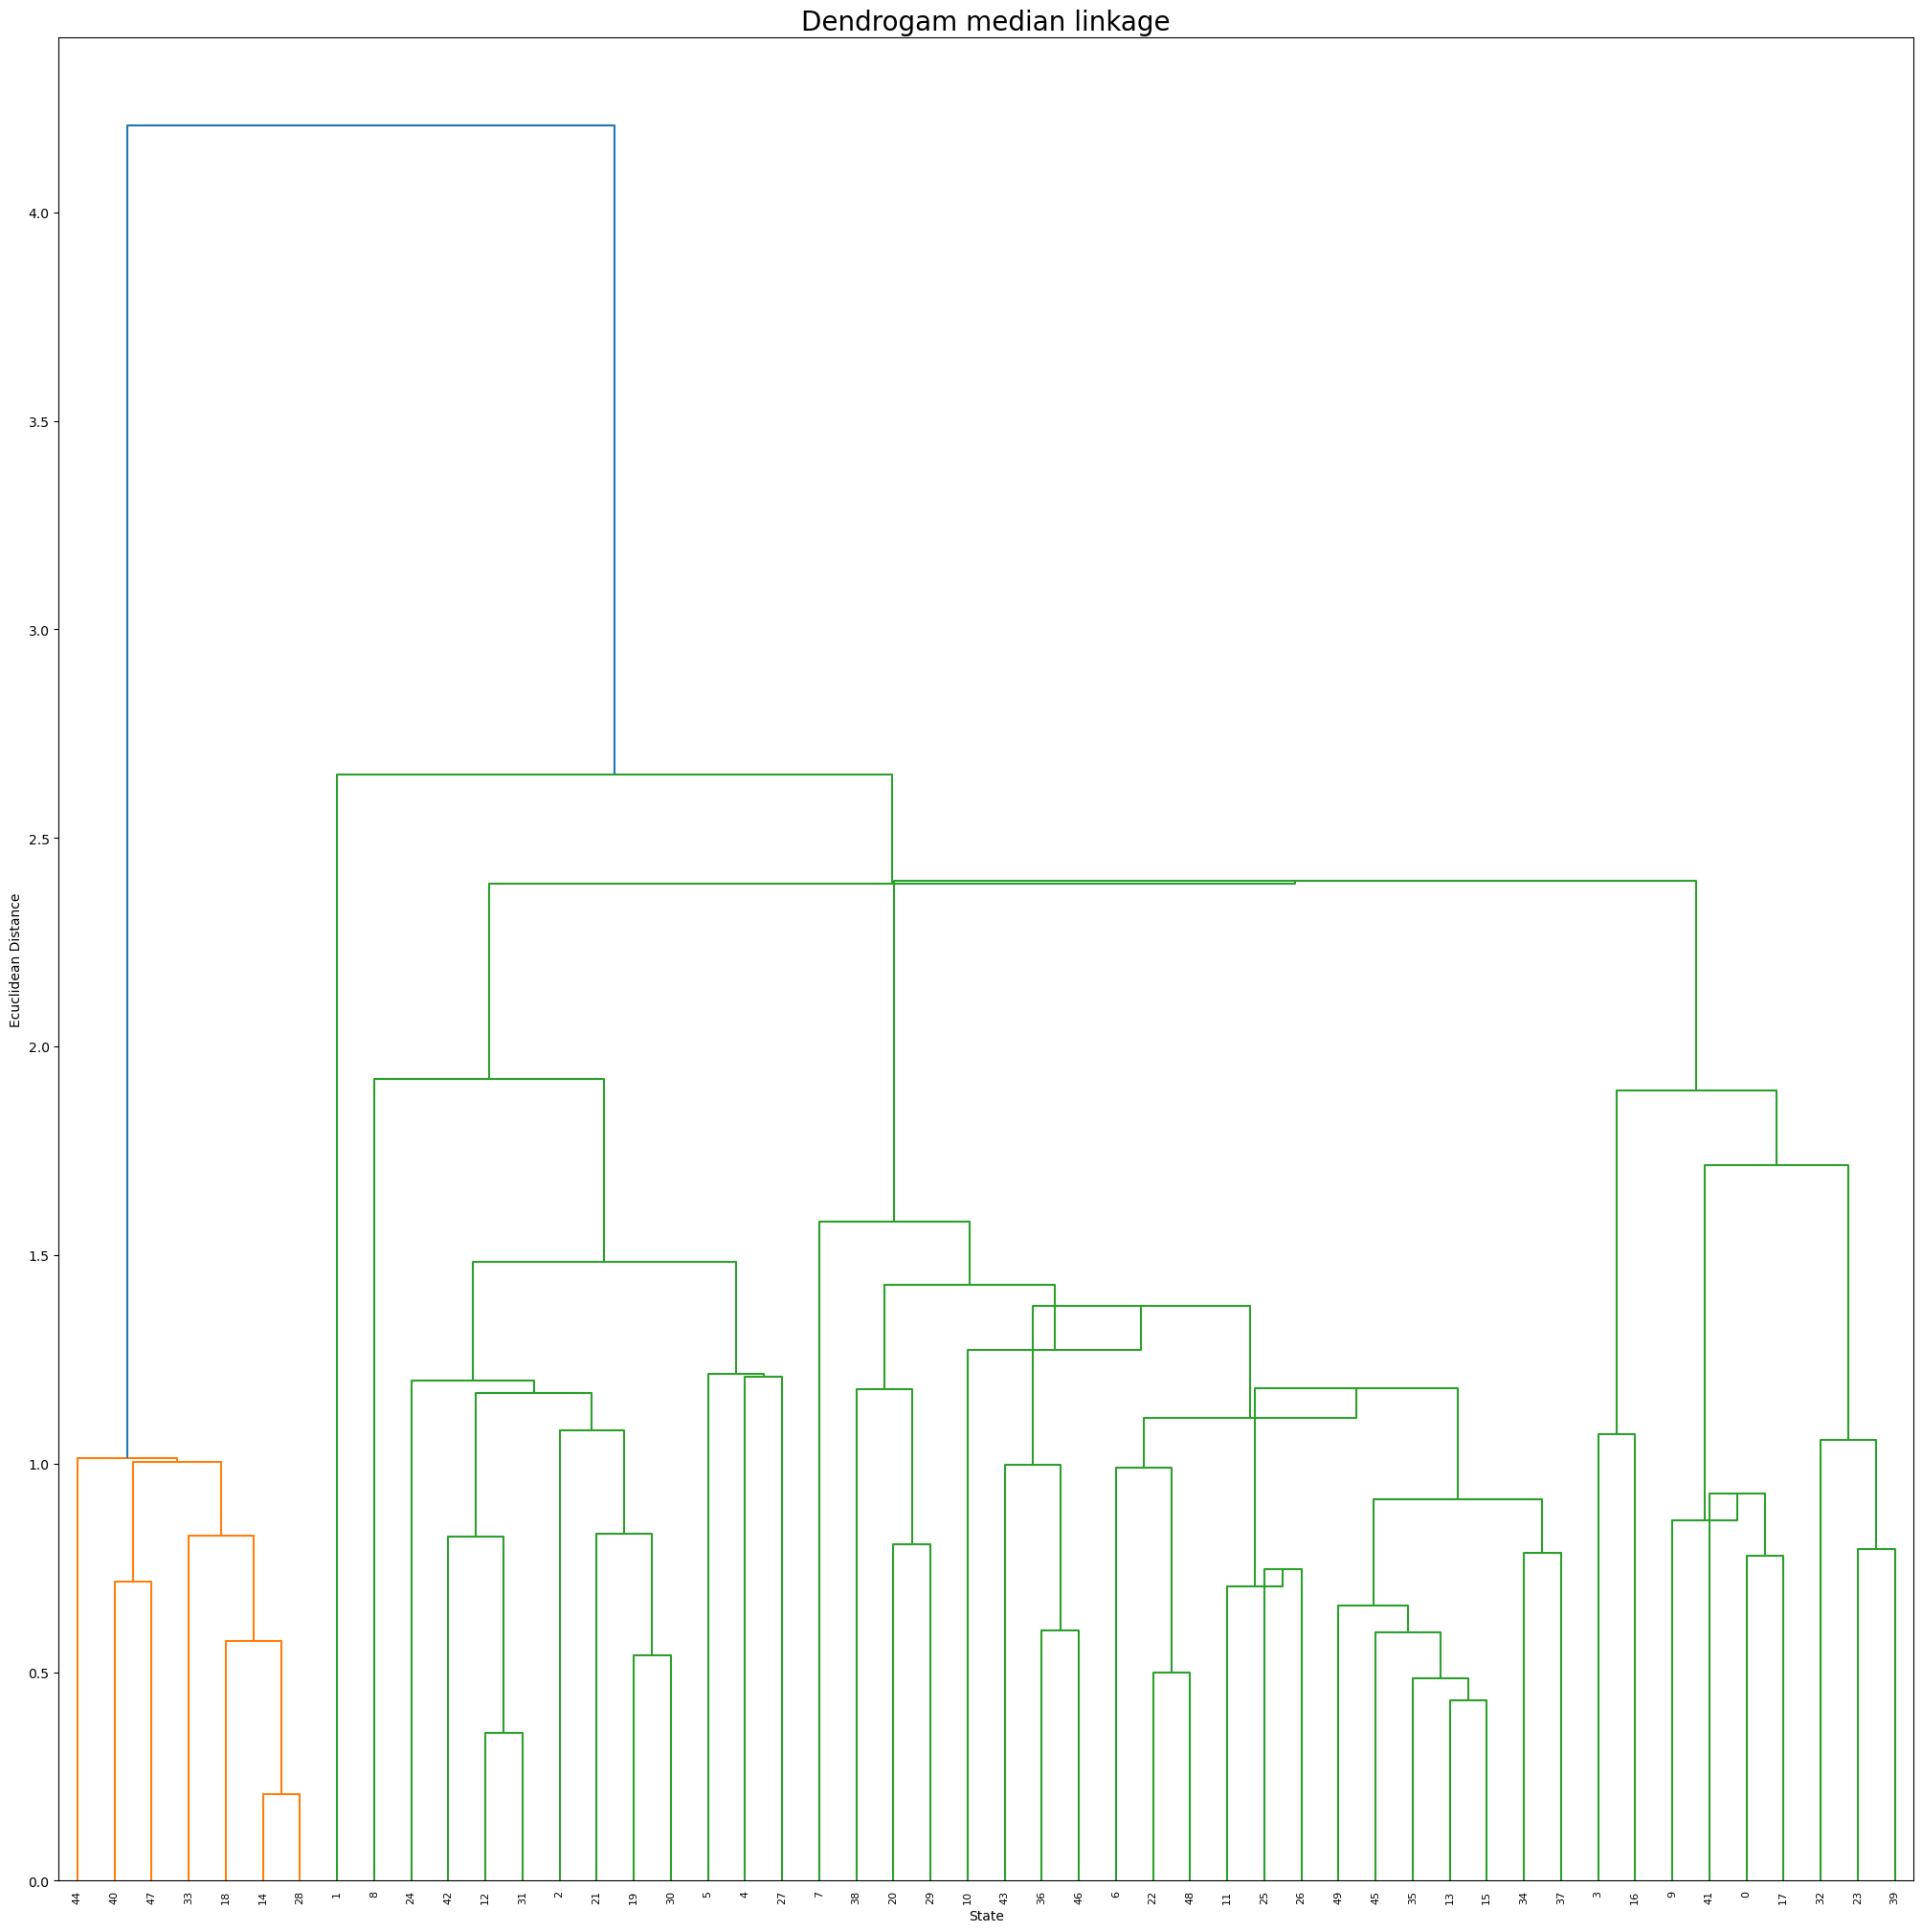

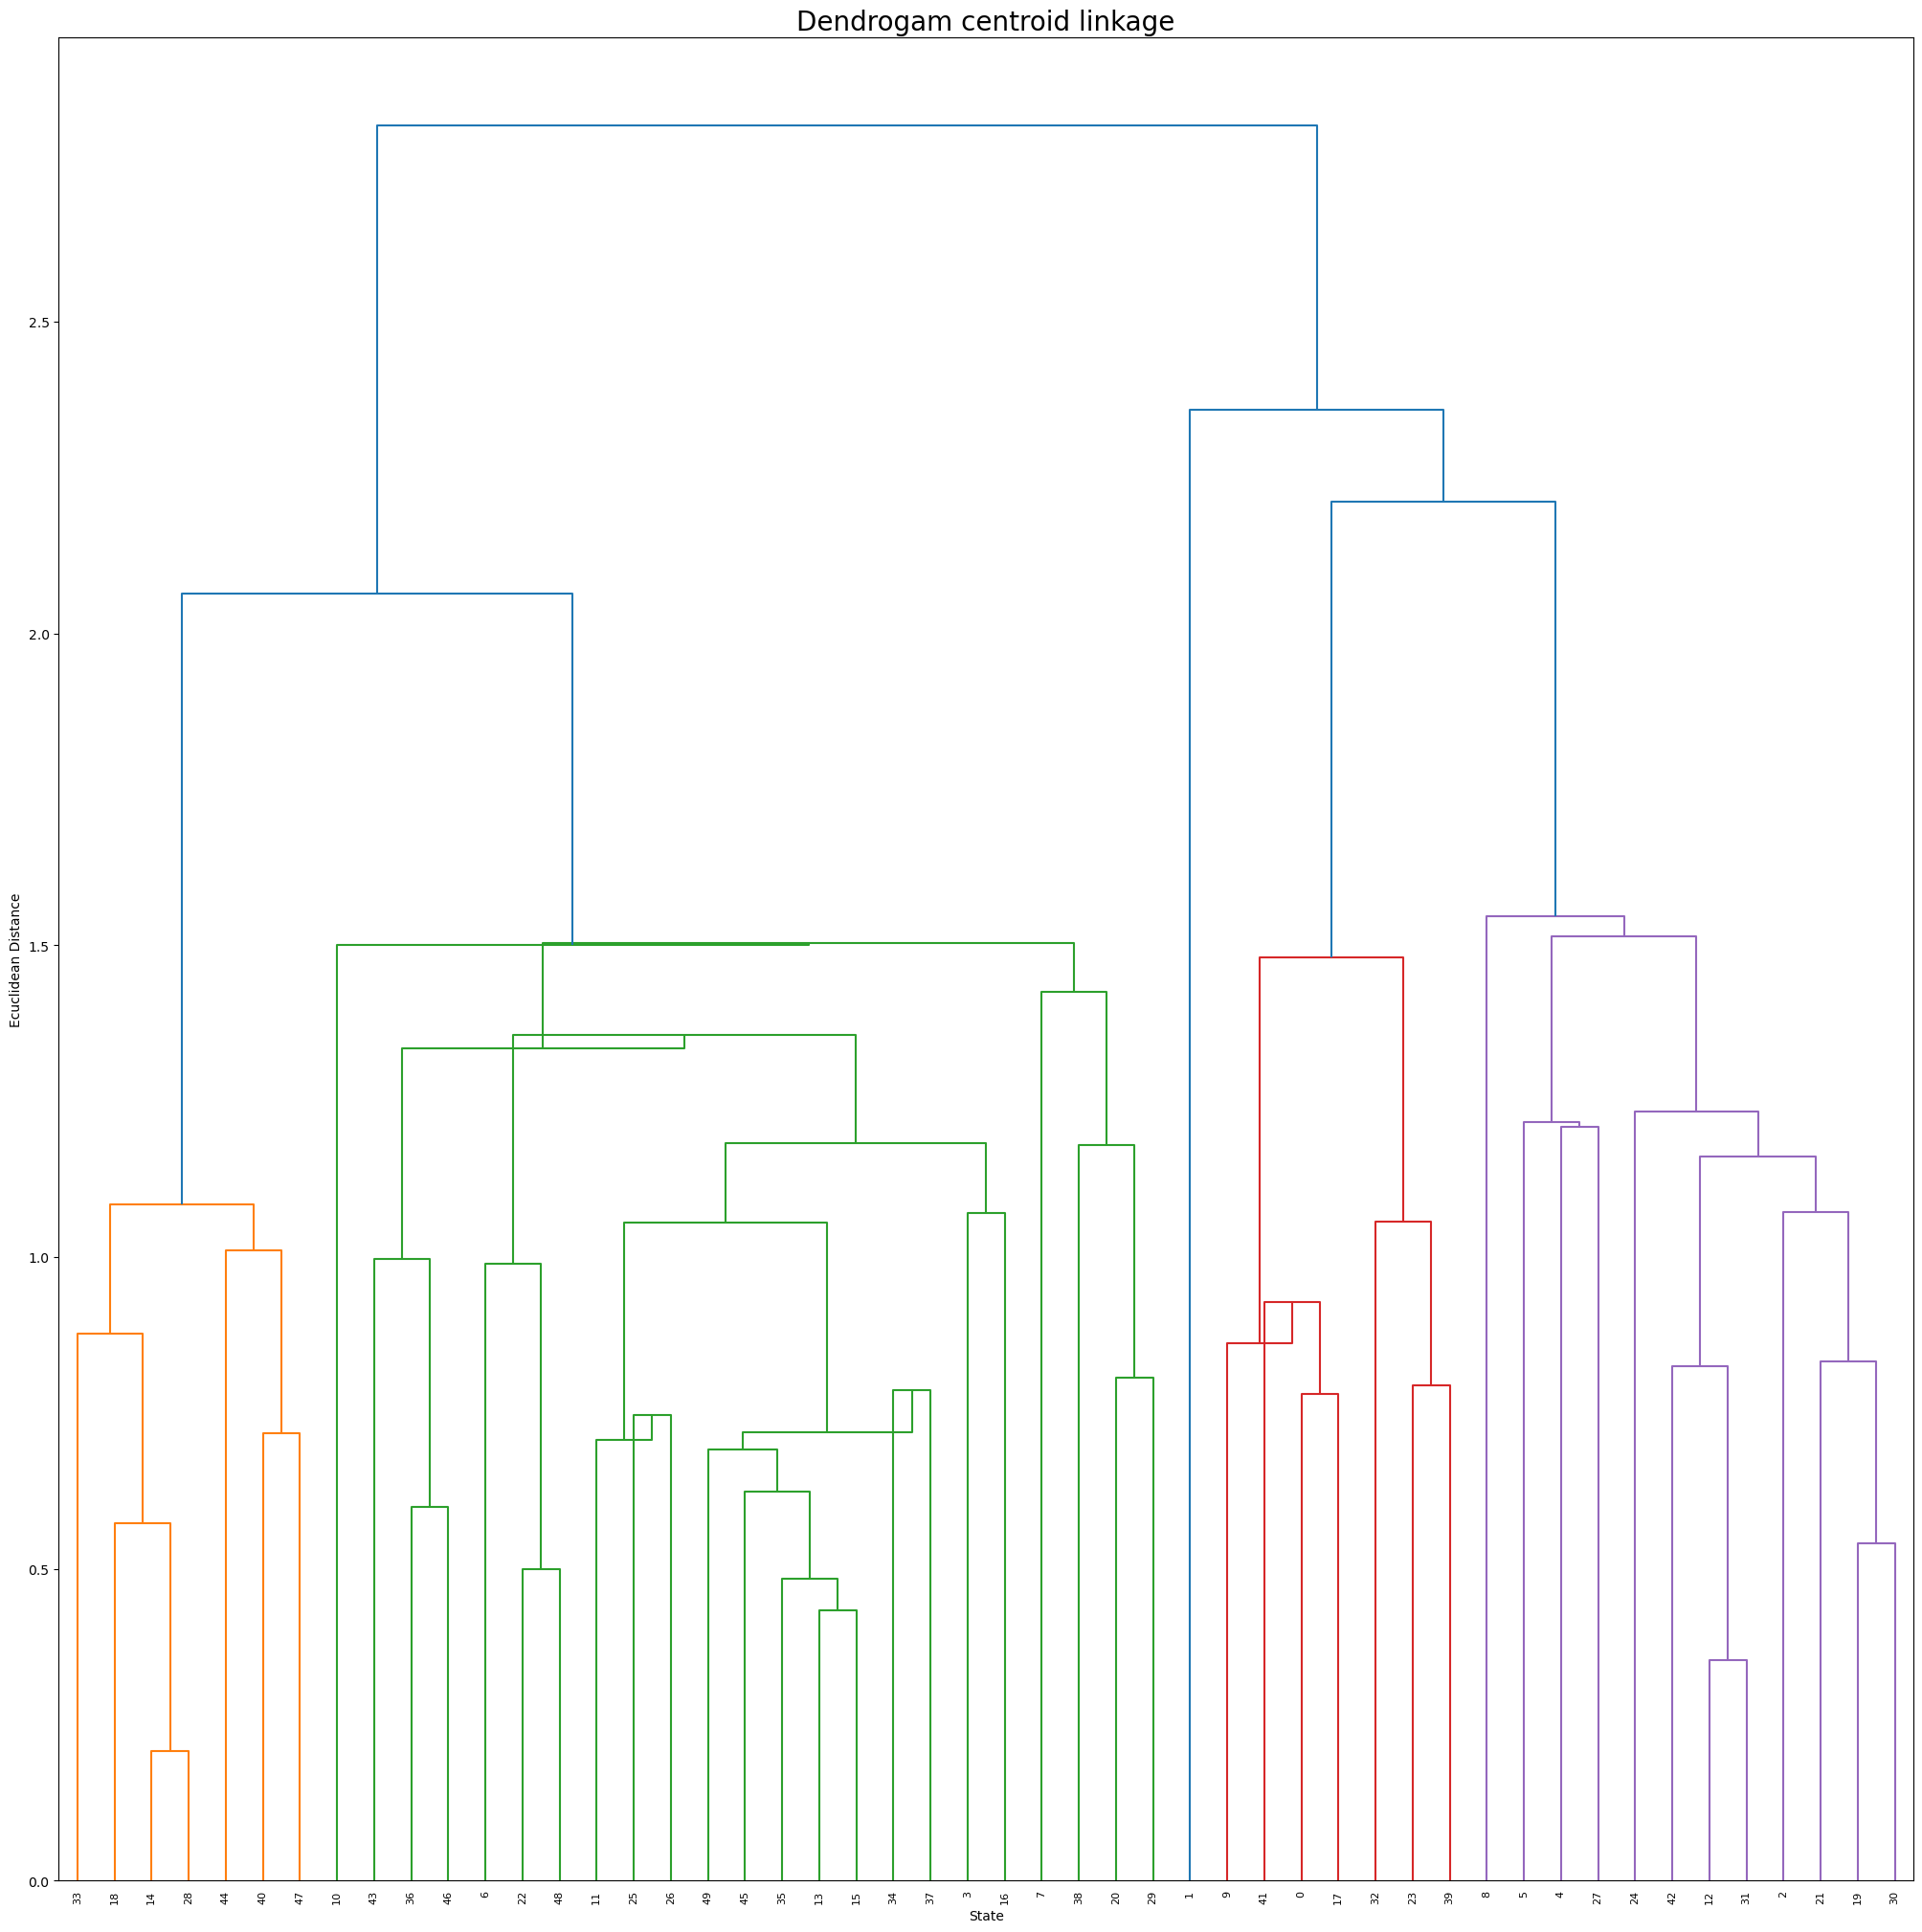

In [72]:
# 1. Hirarchical clustering - 
# Dendrogram of dataset using standard scaled data

for method in ['single','complete', 'average', 'weighted', 'ward', 'median', 'centroid']:
    plt.figure(figsize=(25, 25))
    dendrogram = sch.dendrogram(sch.linkage(crime_std, method=method))
    plt.title(f'Dendrogam {method} linkage', fontsize = 20)
    plt.xlabel('State')
    plt.ylabel('Ecuclidean Distance')
    plt.show()

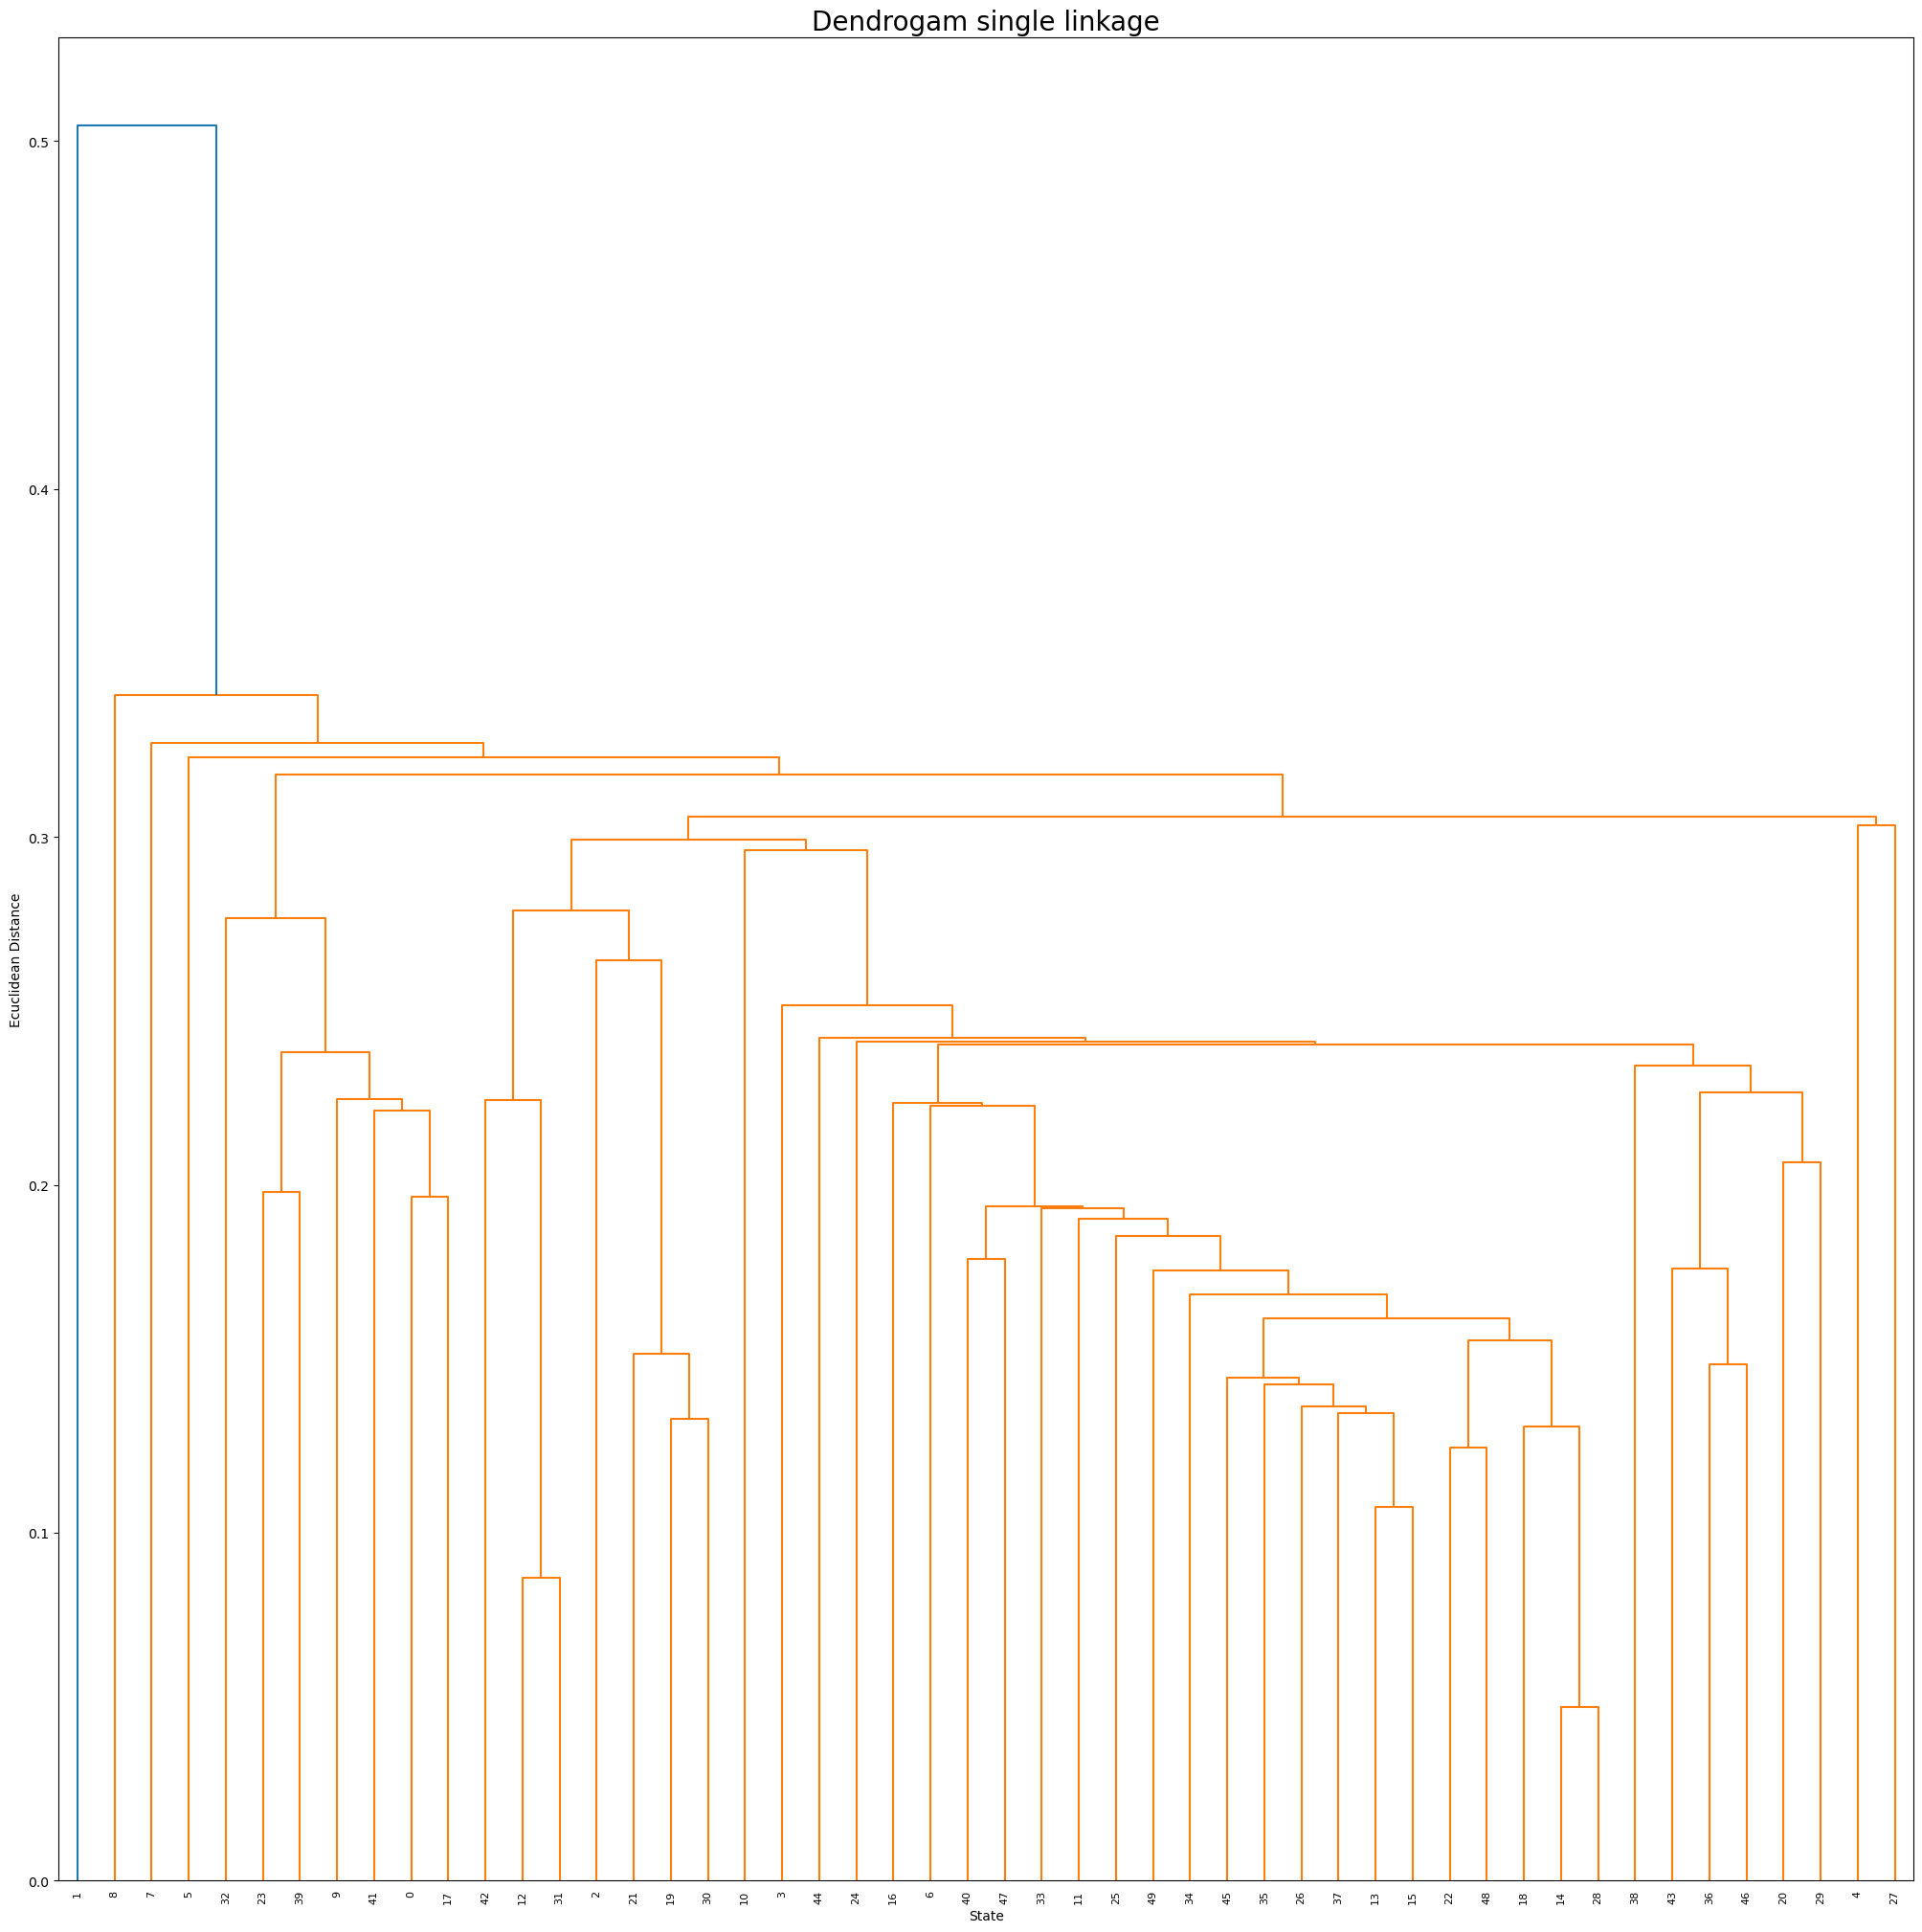

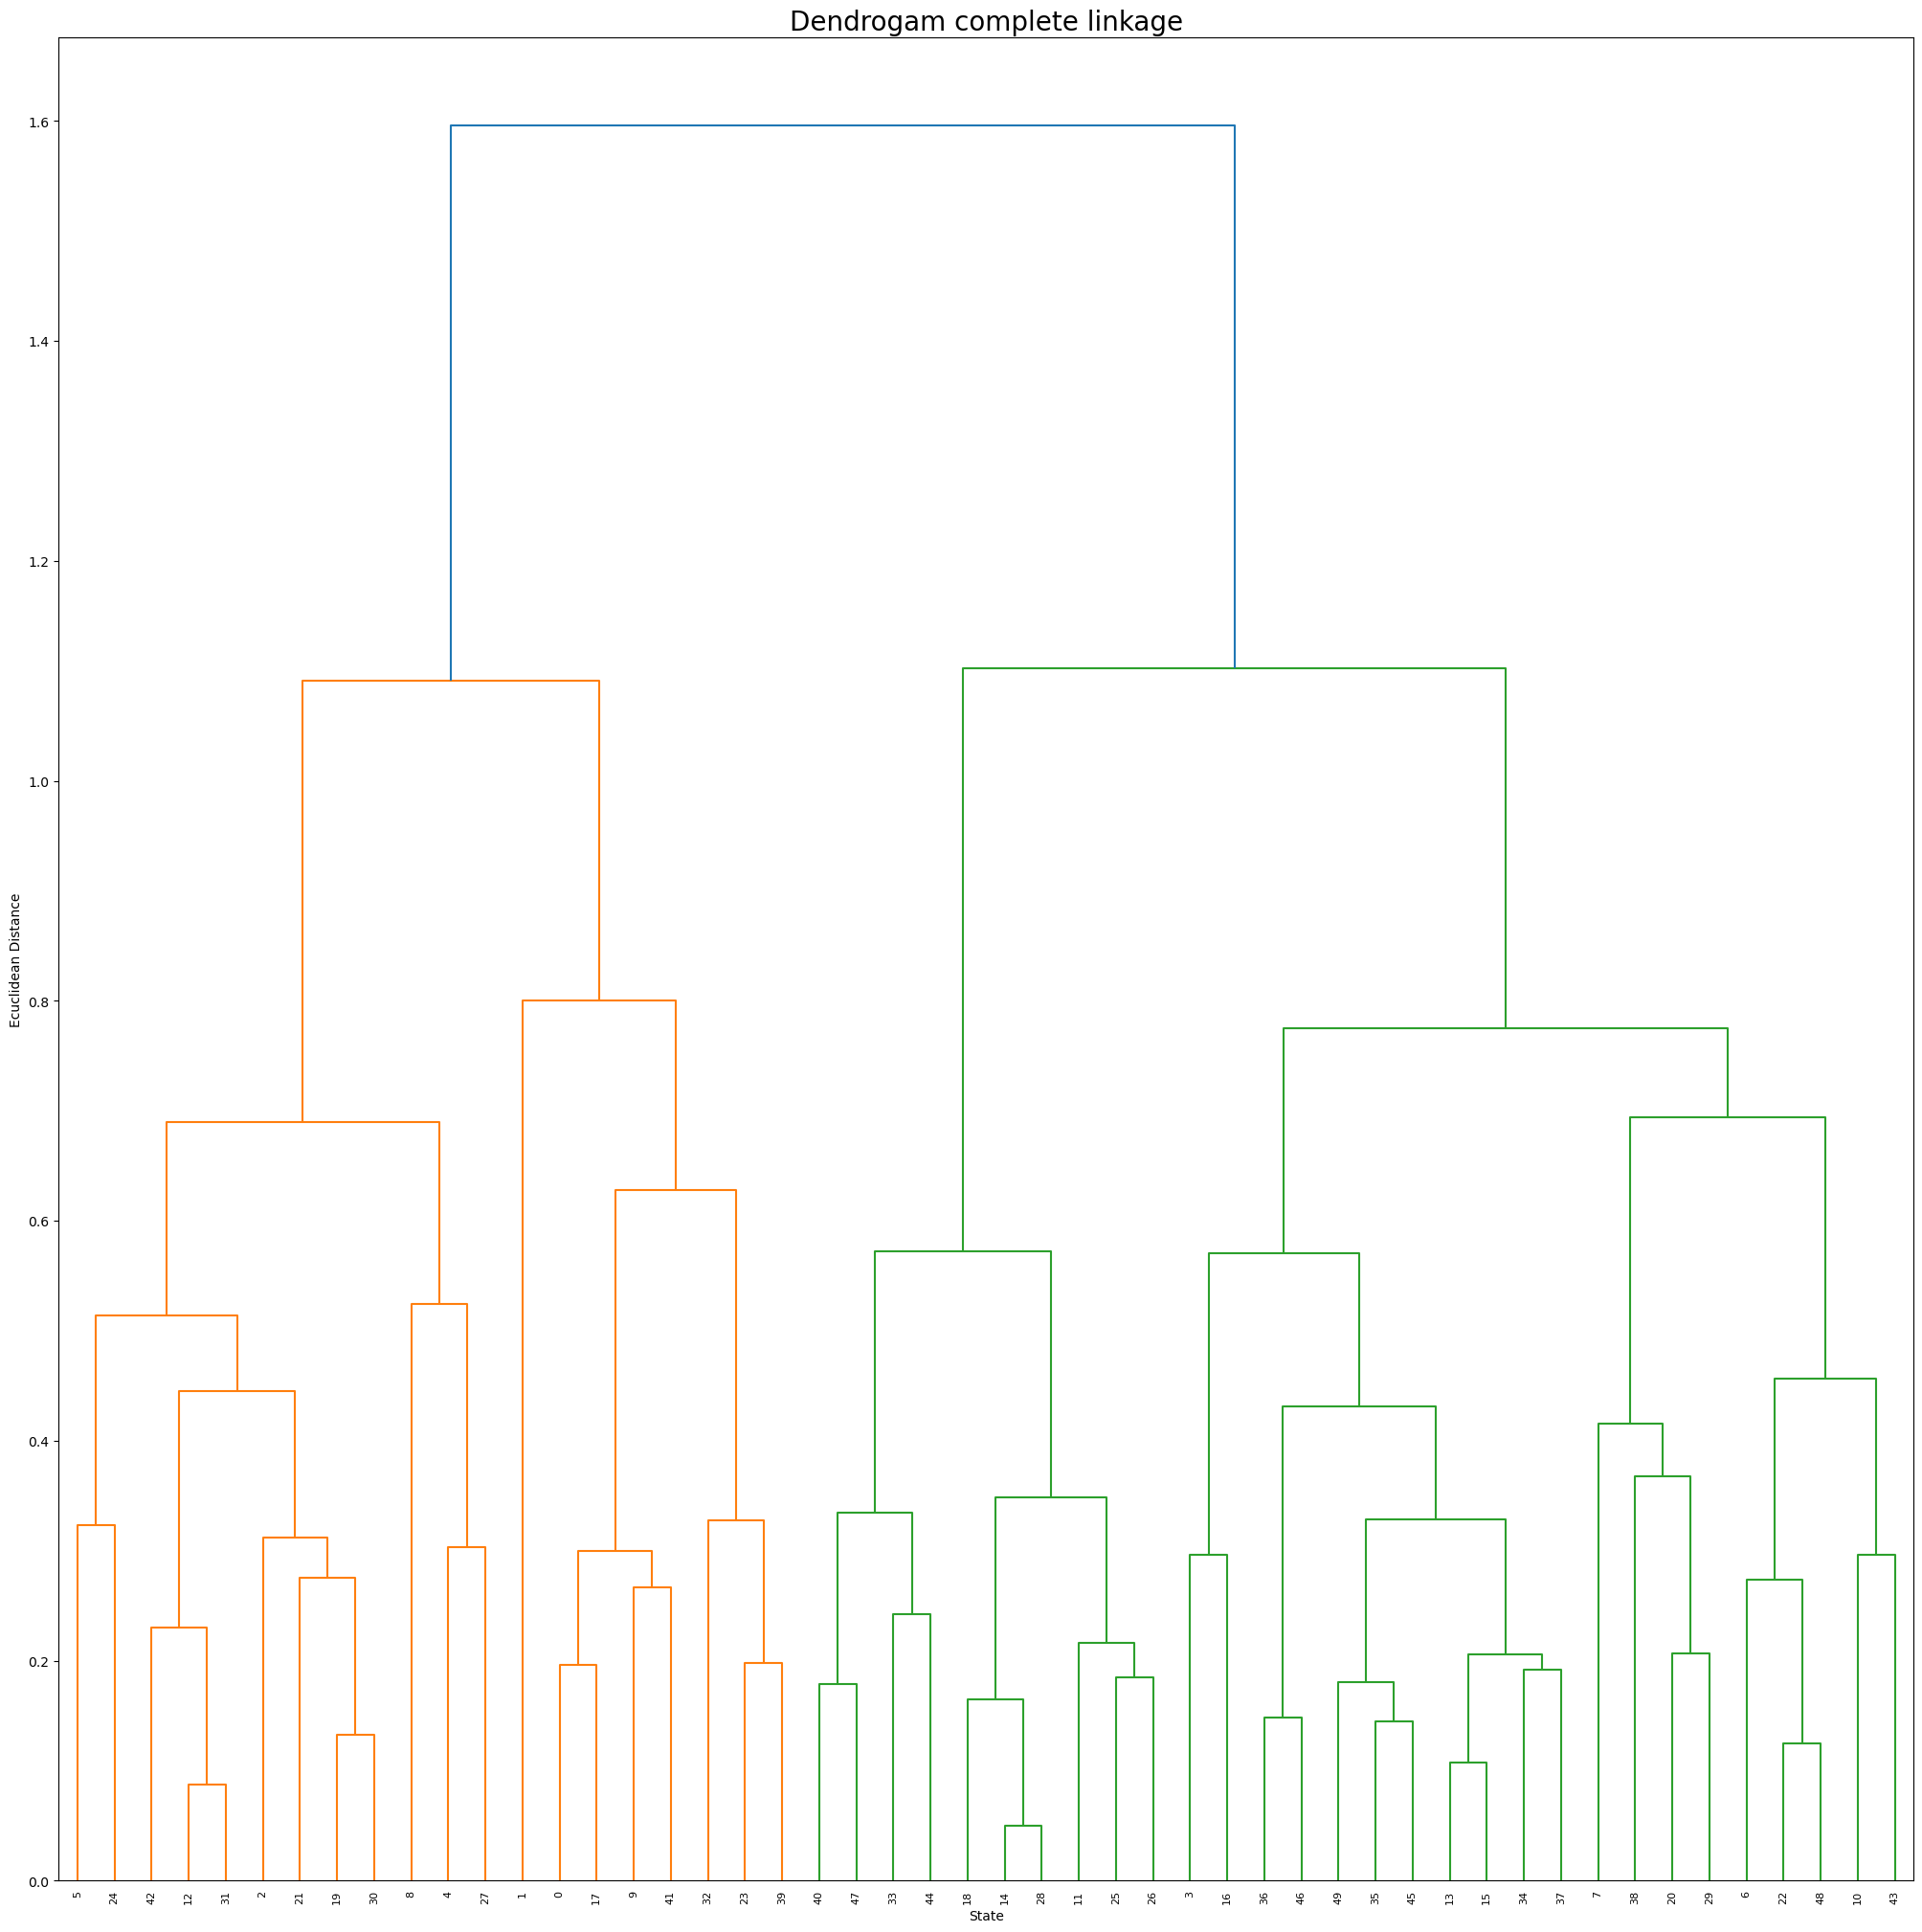

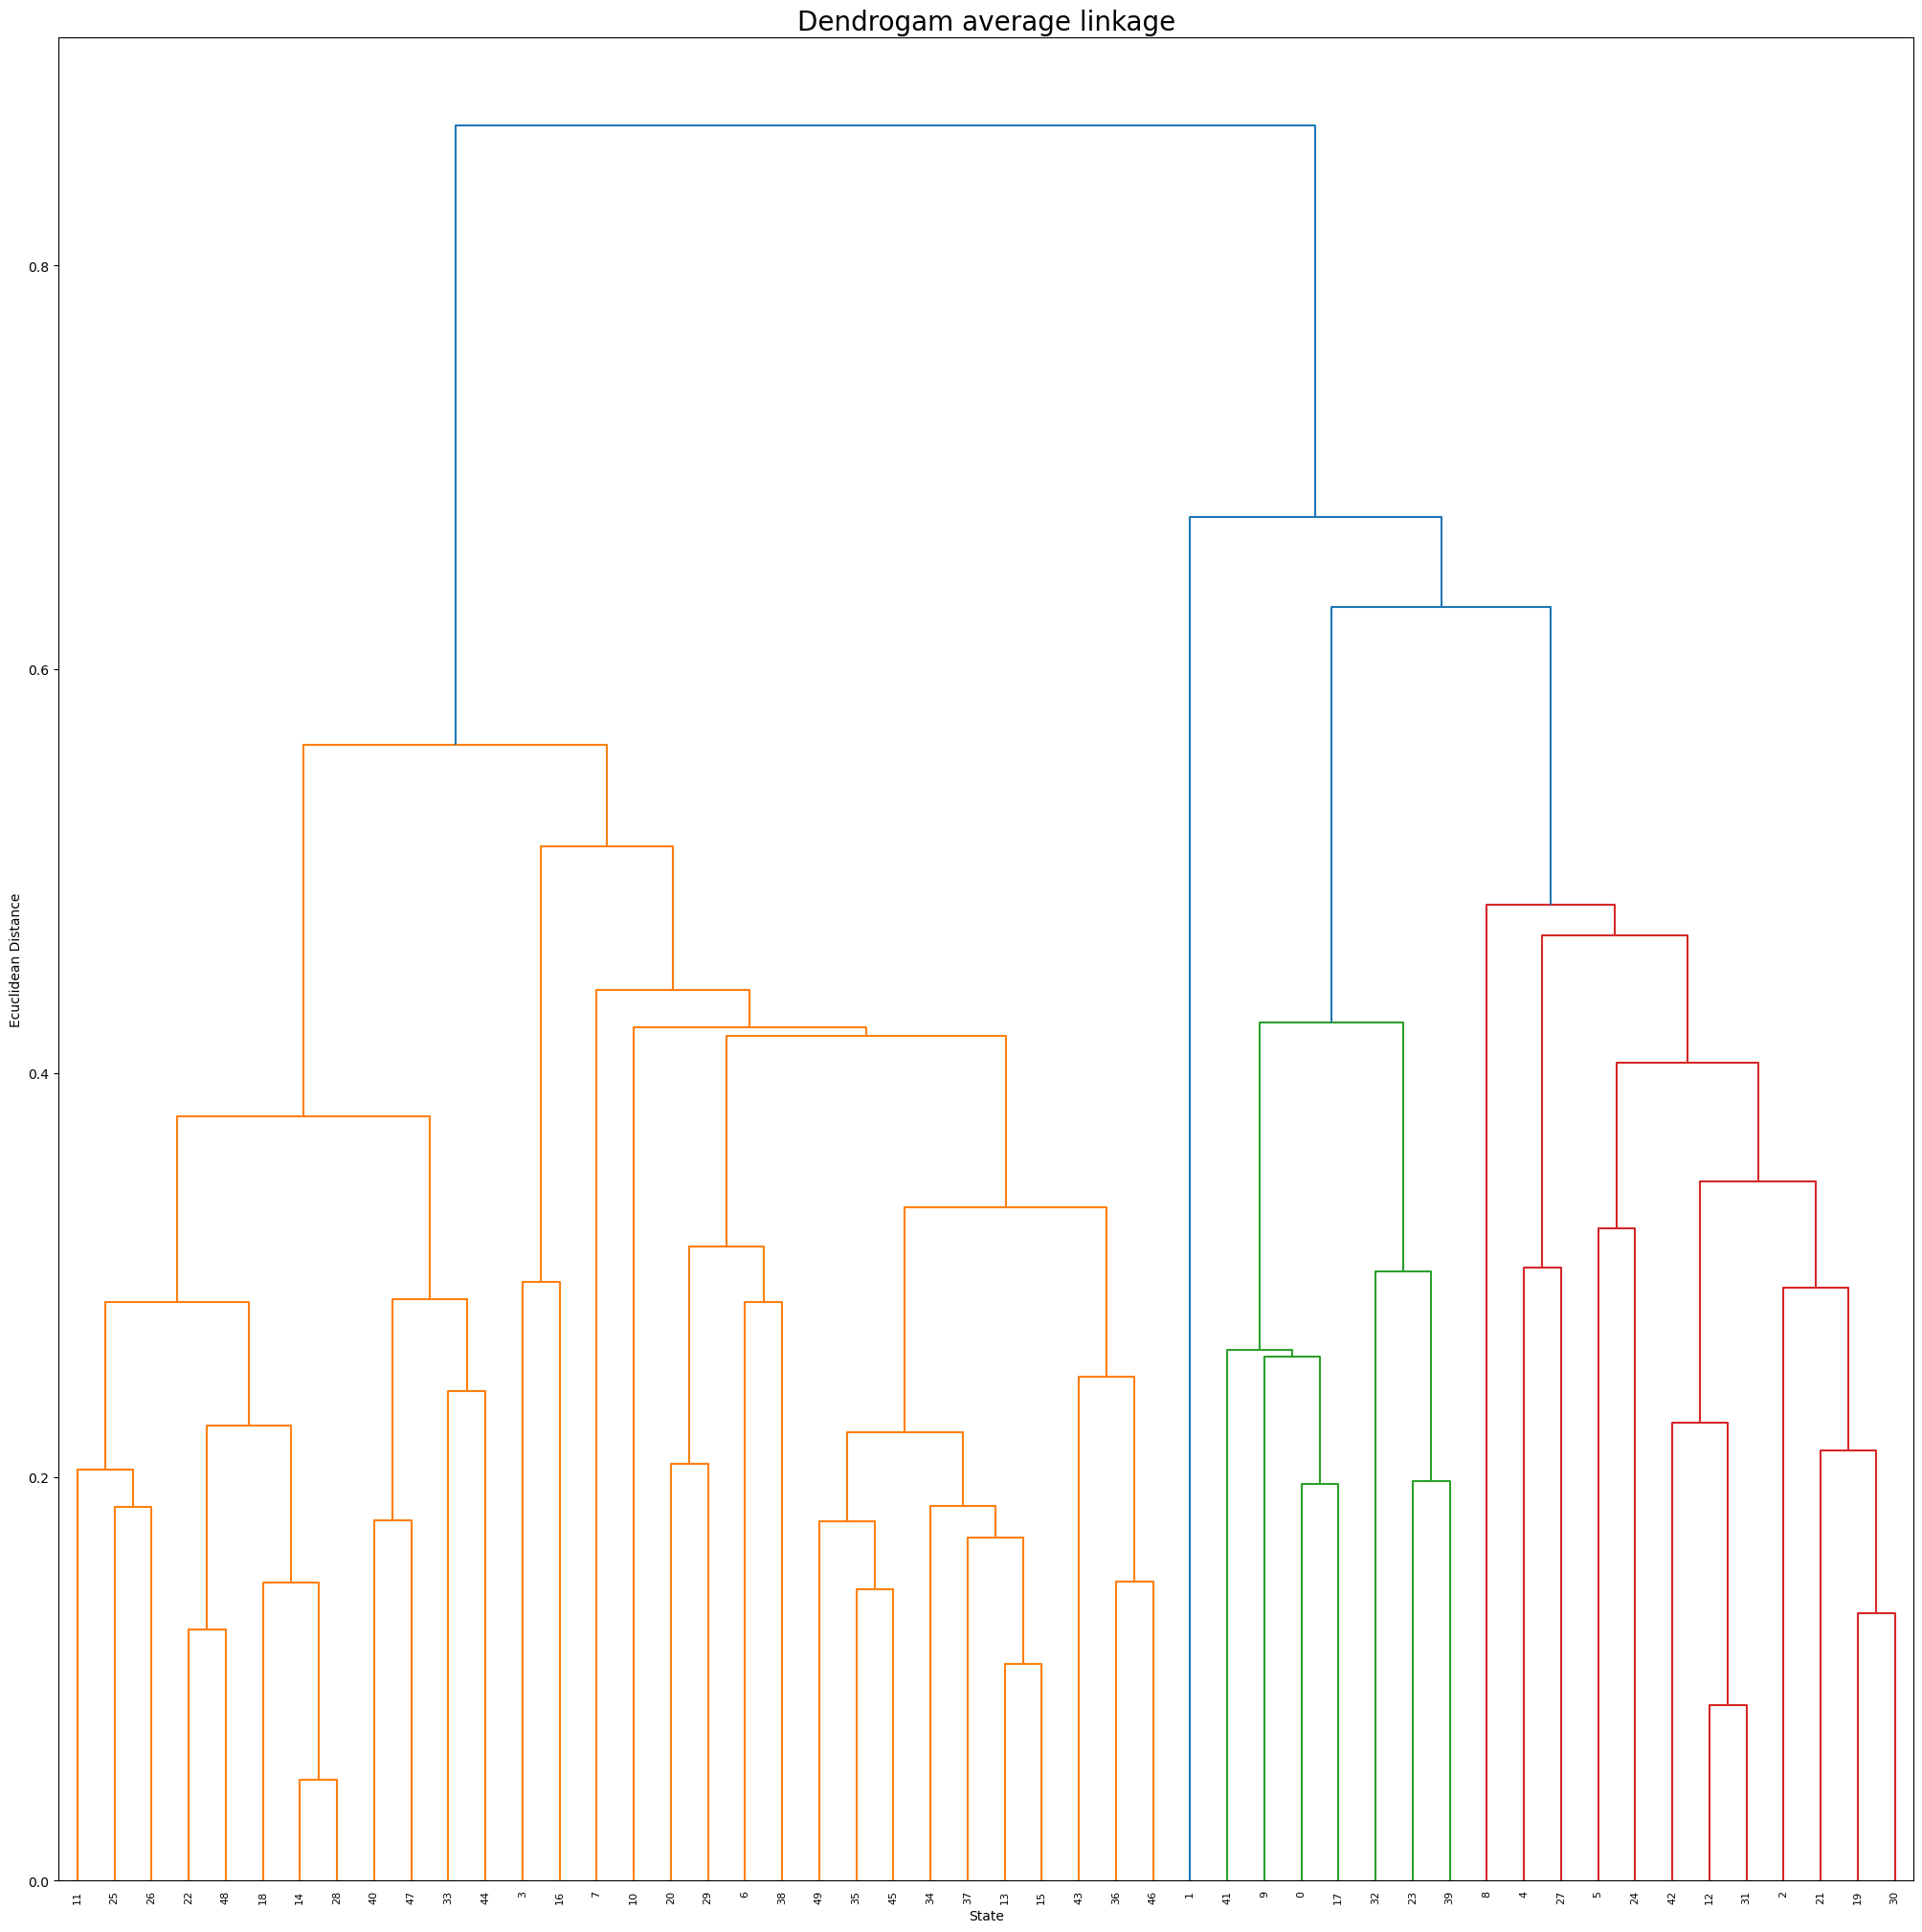

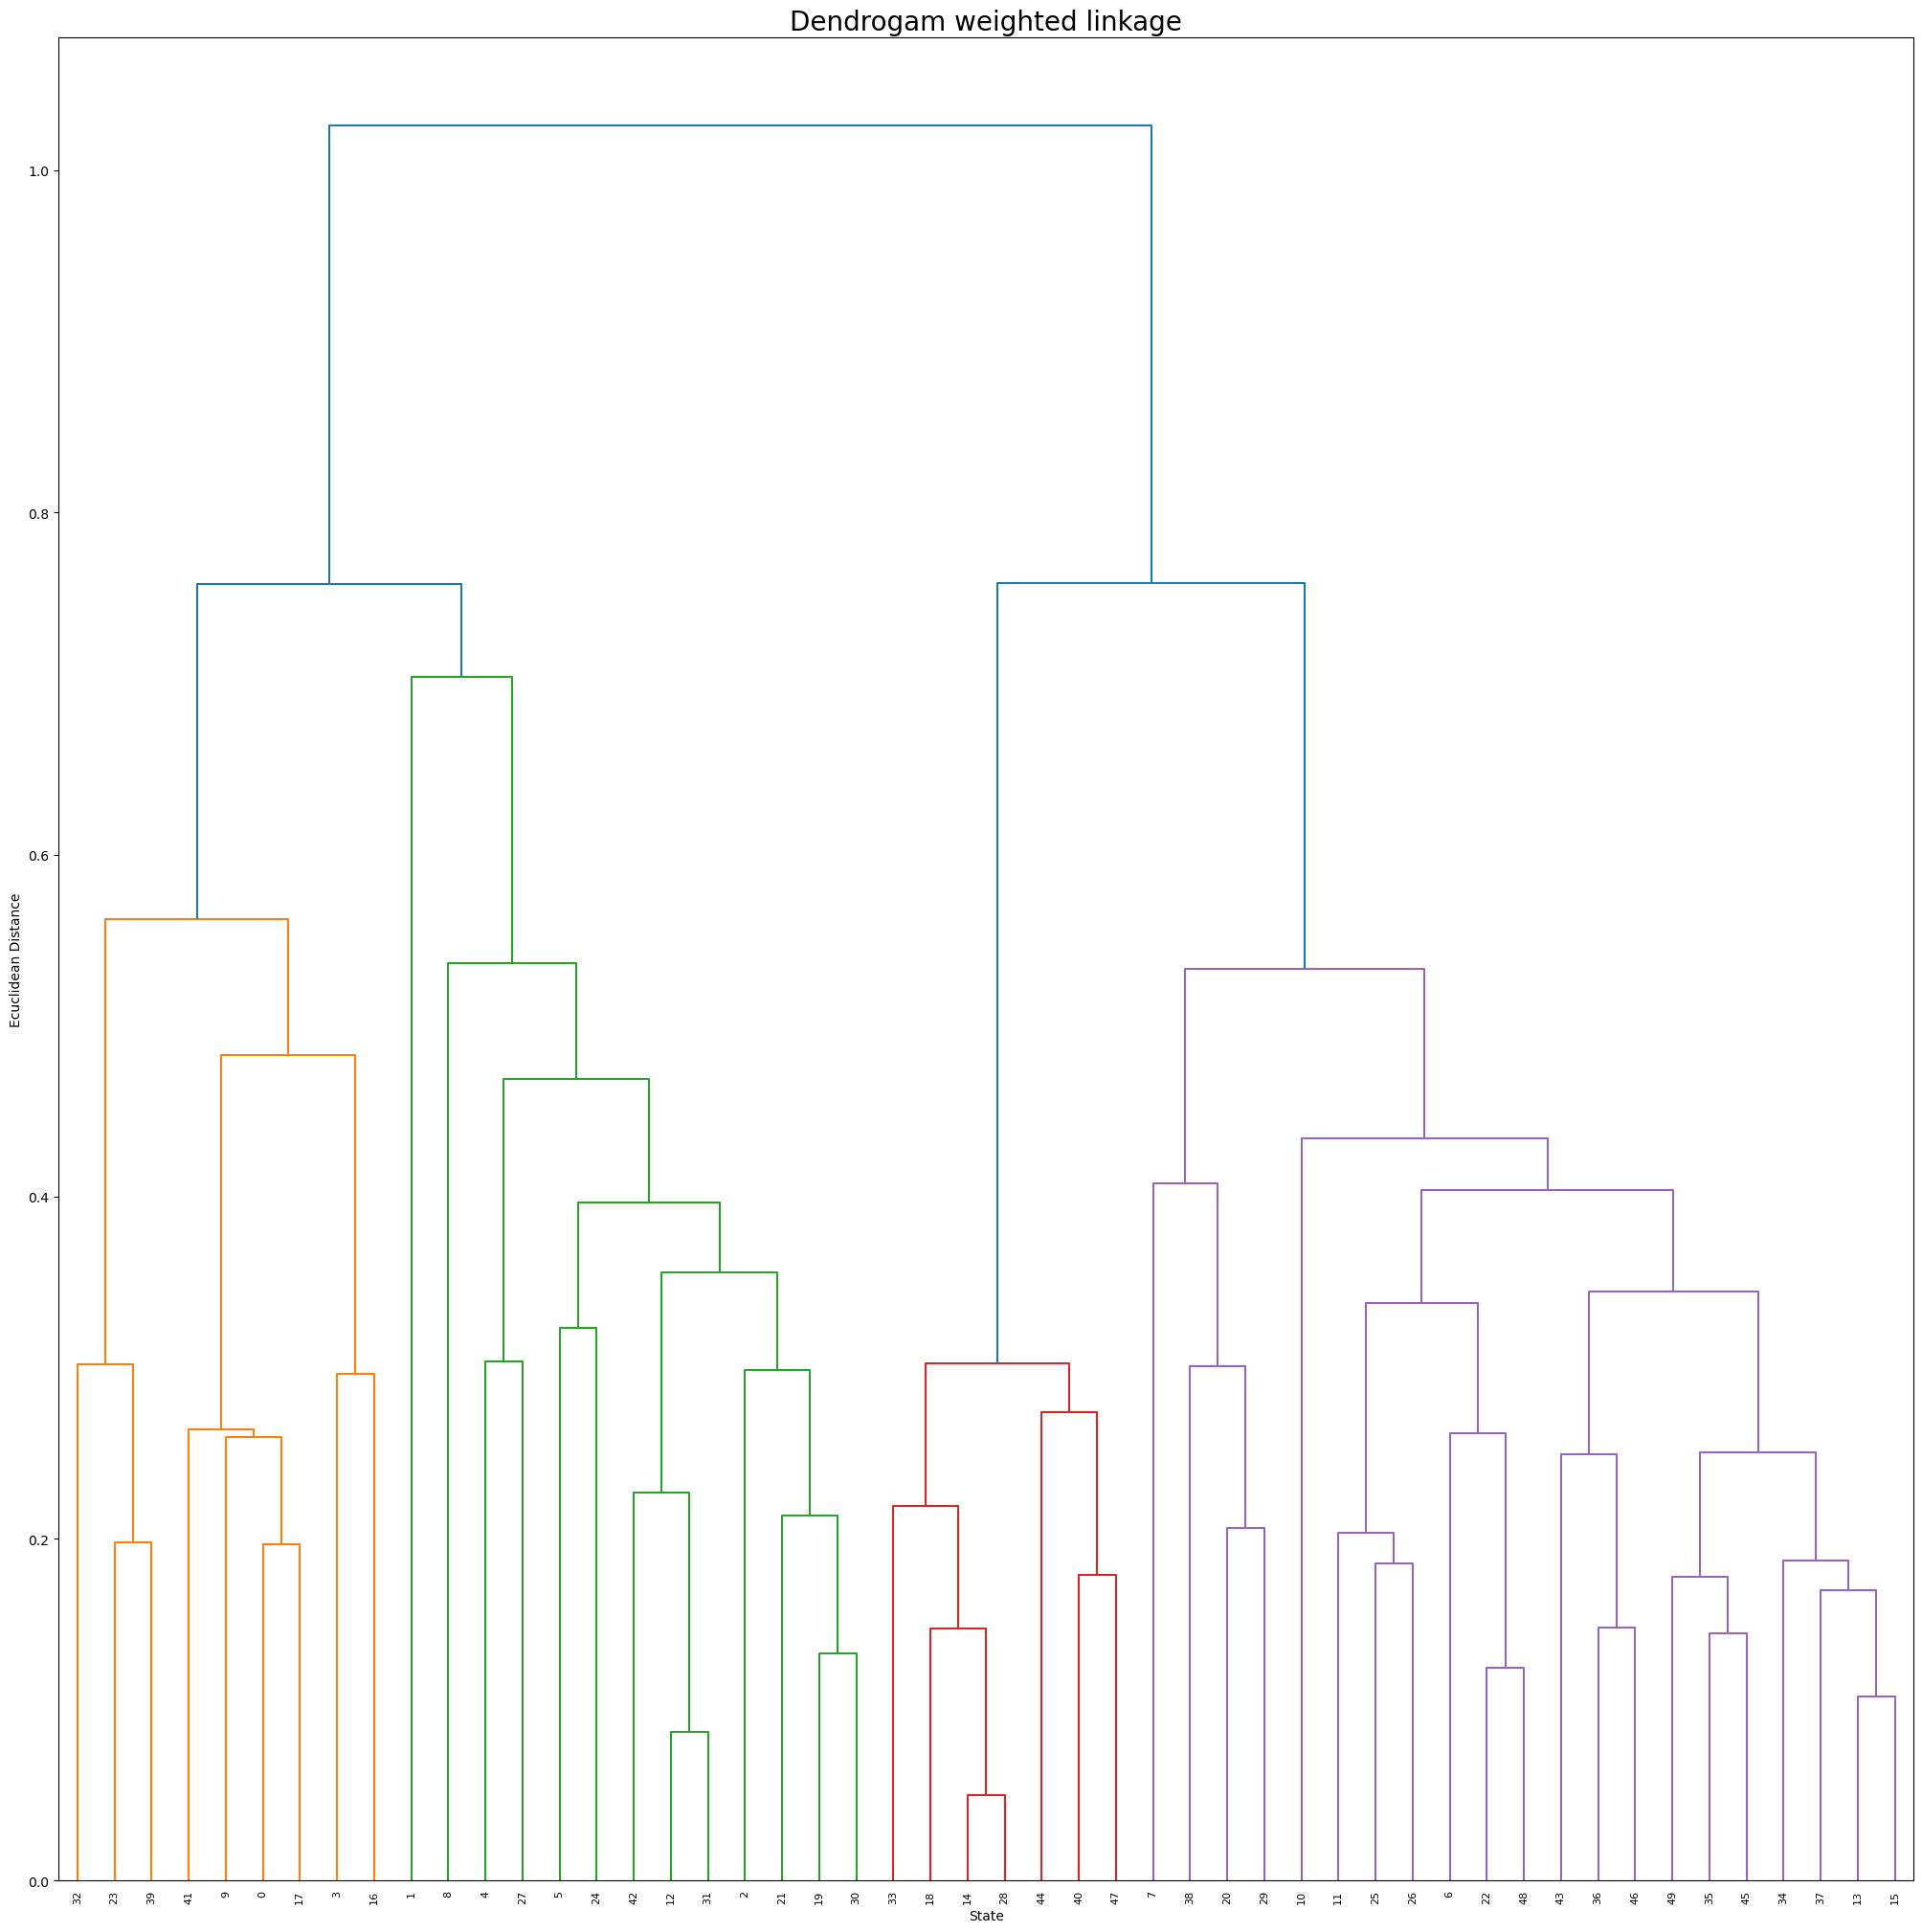

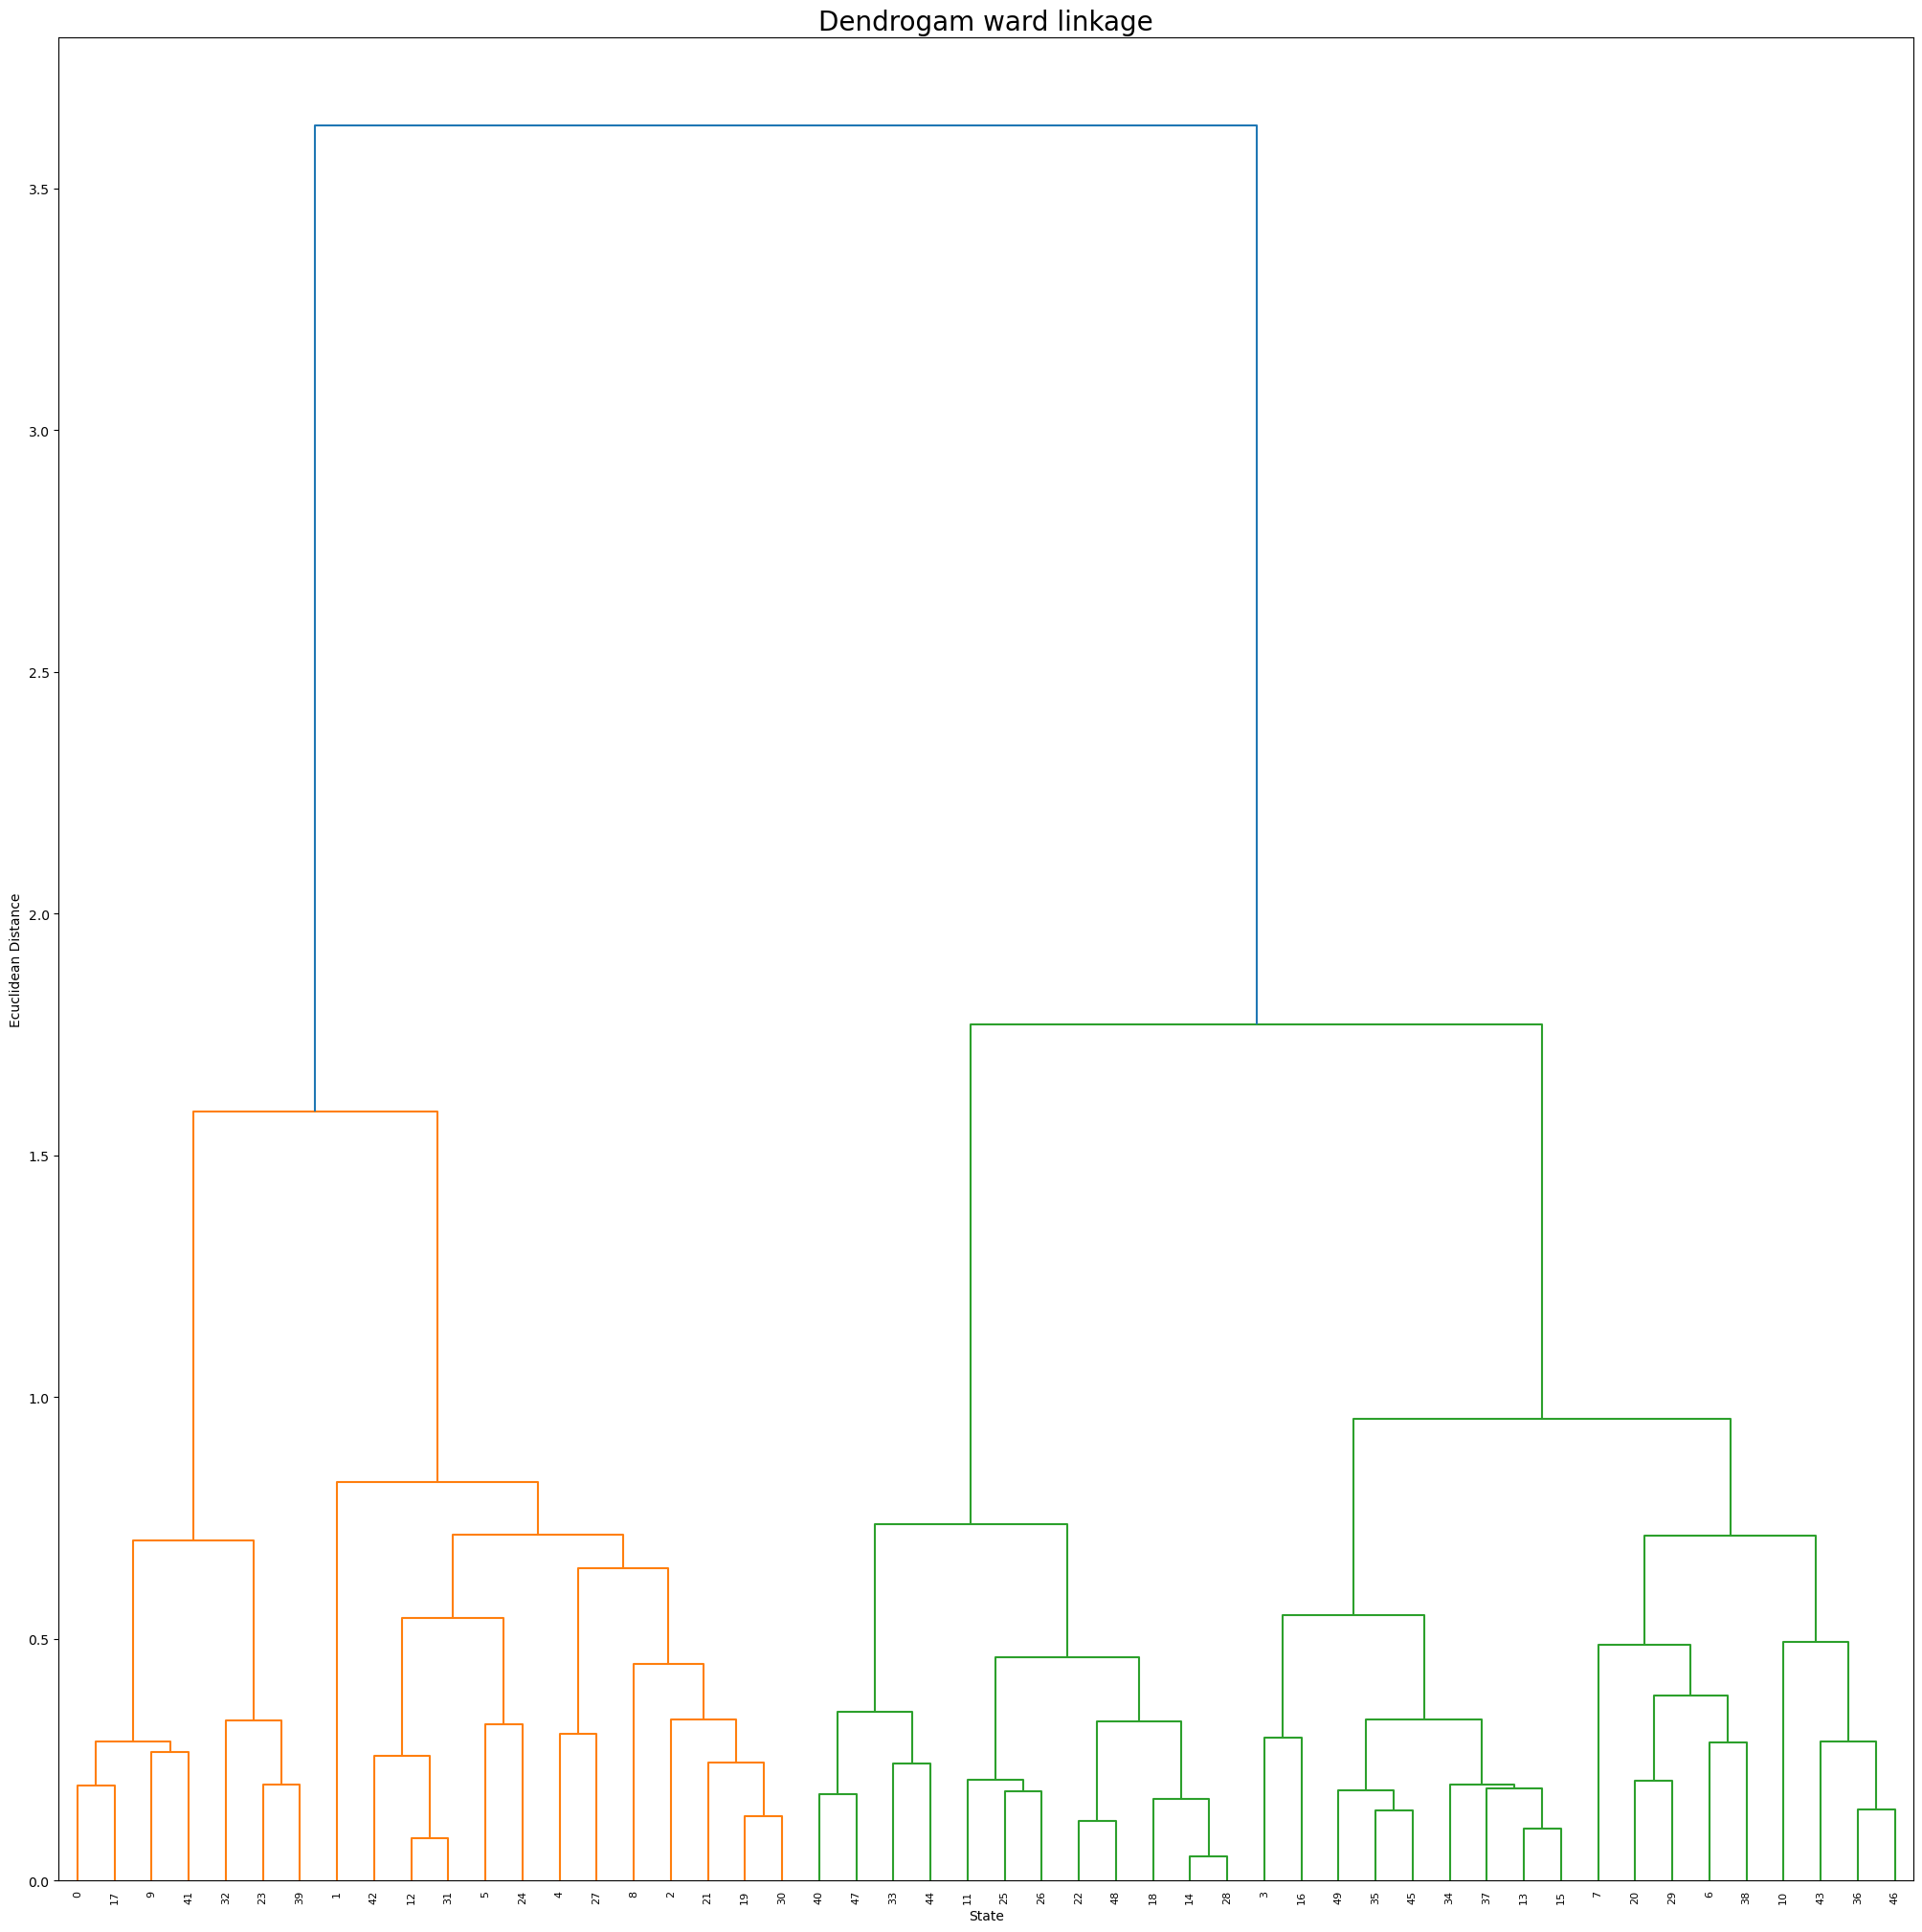

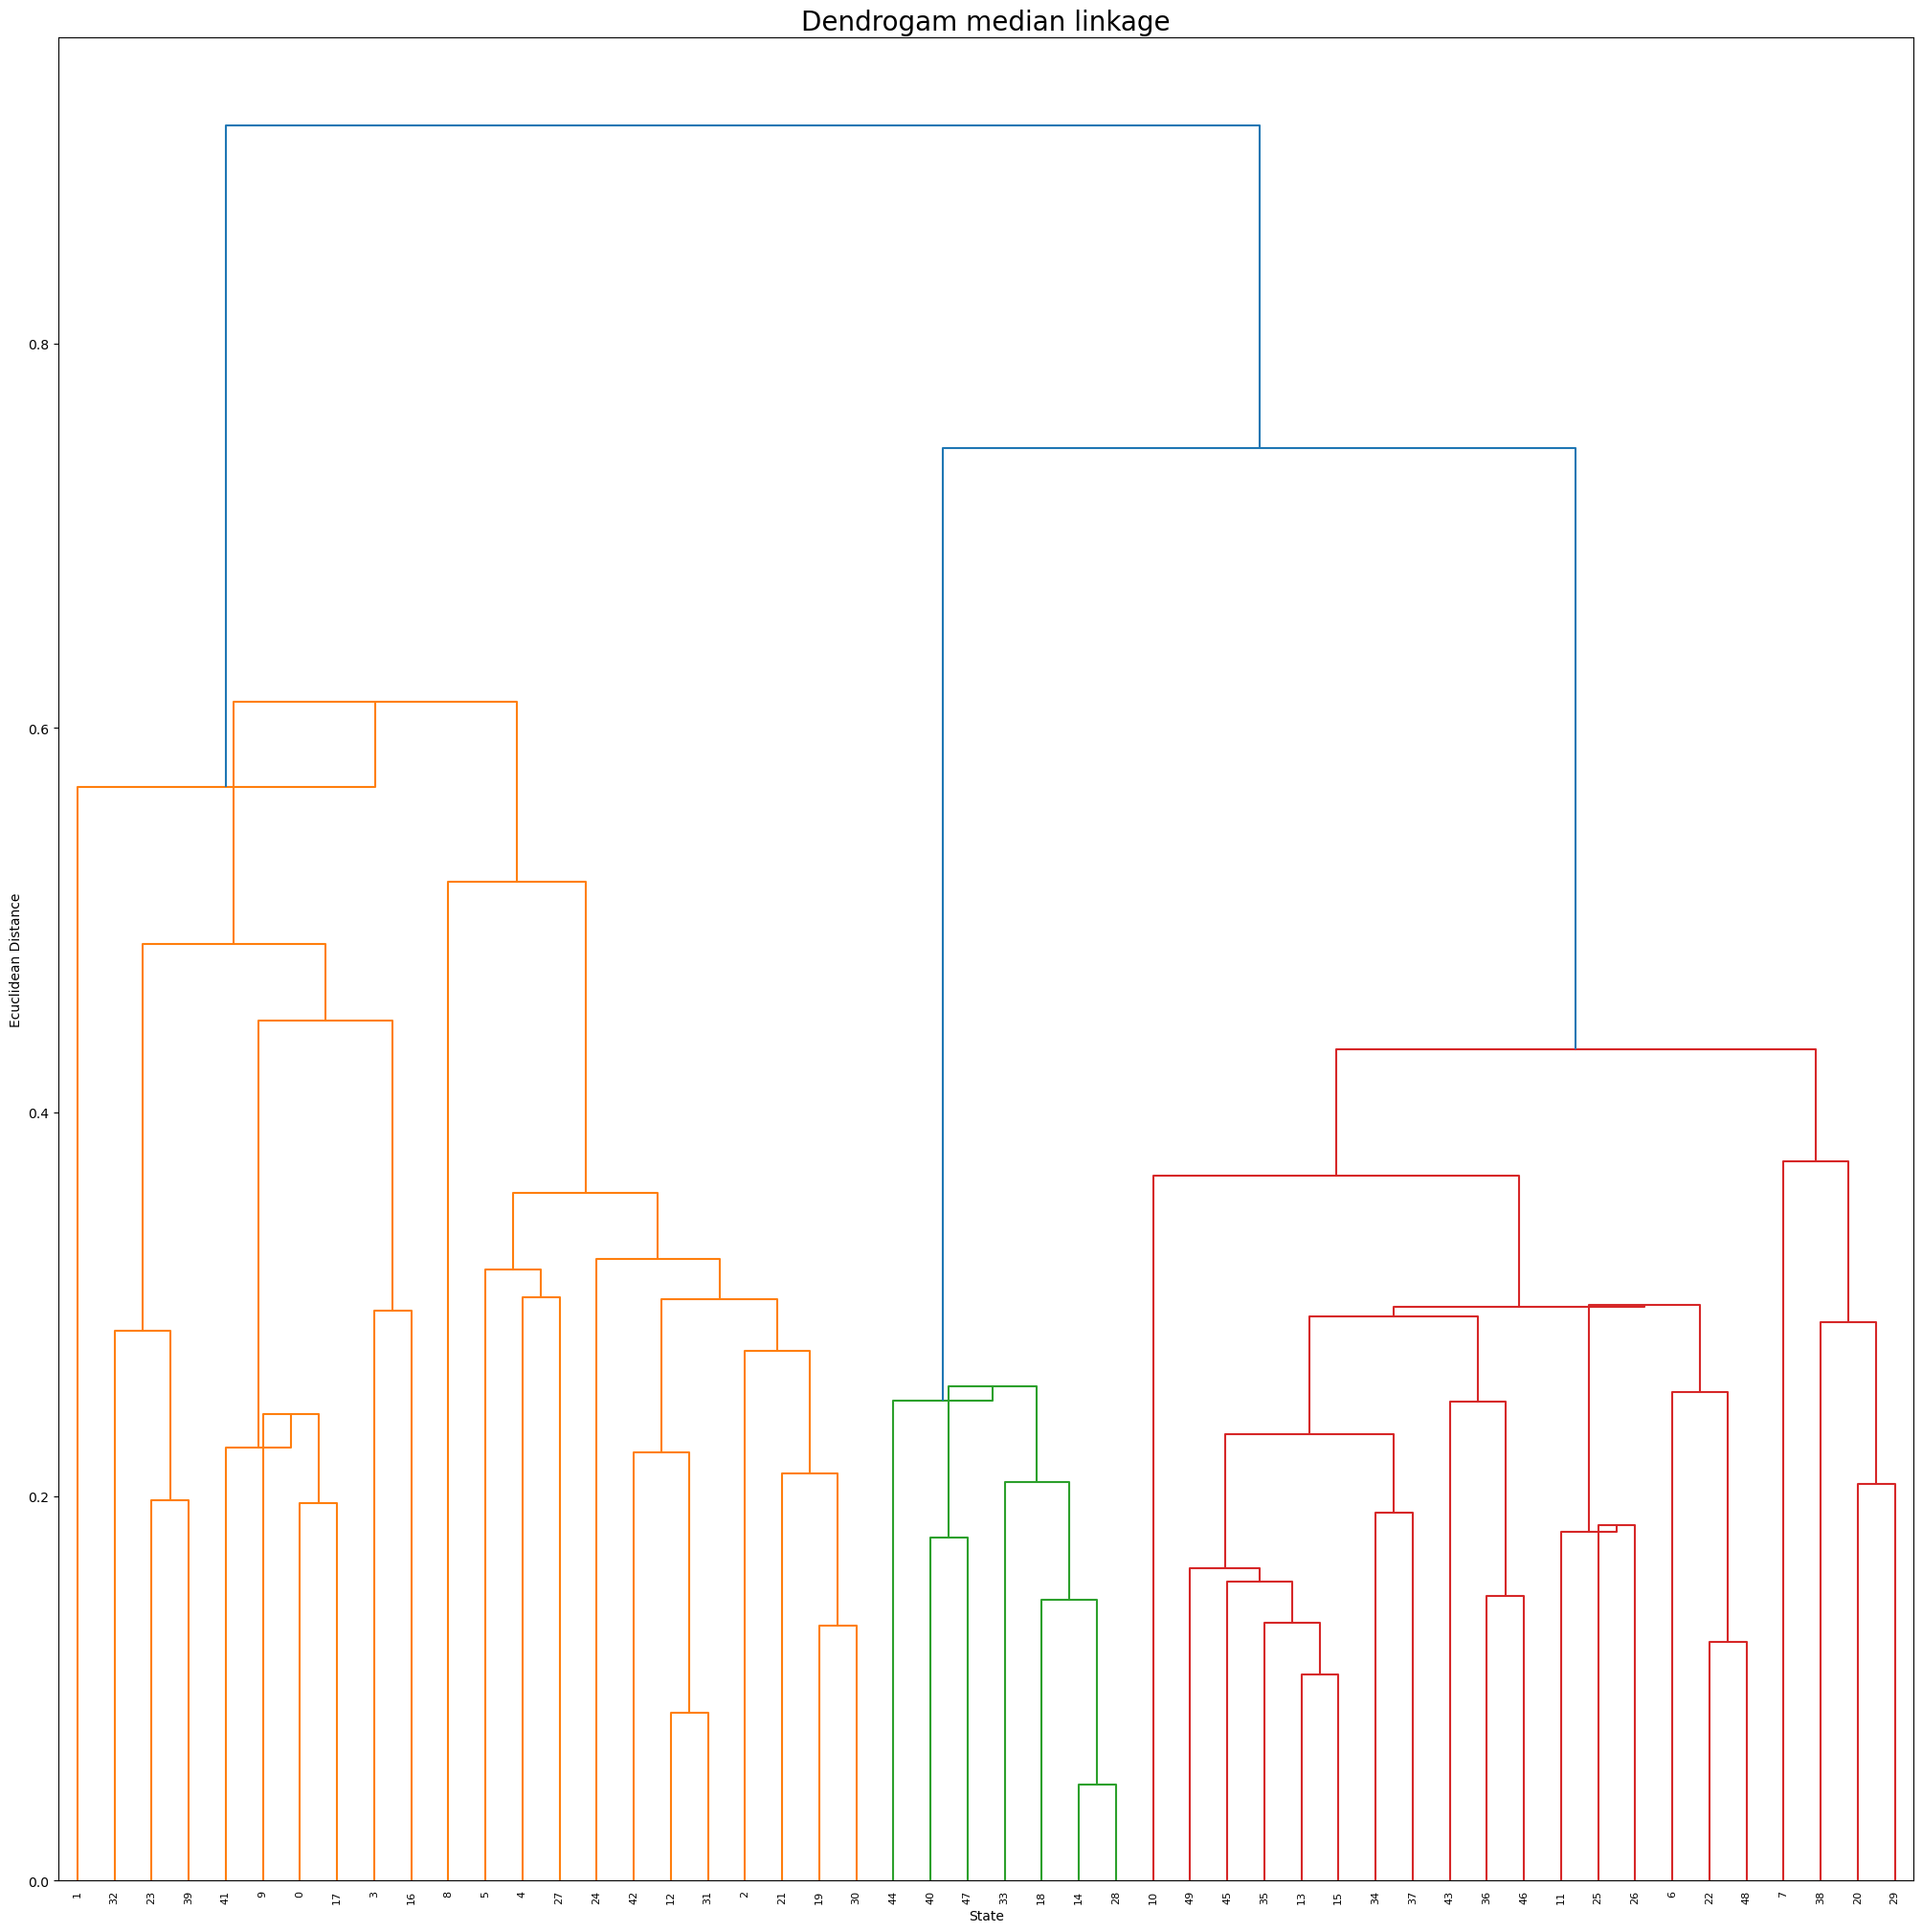

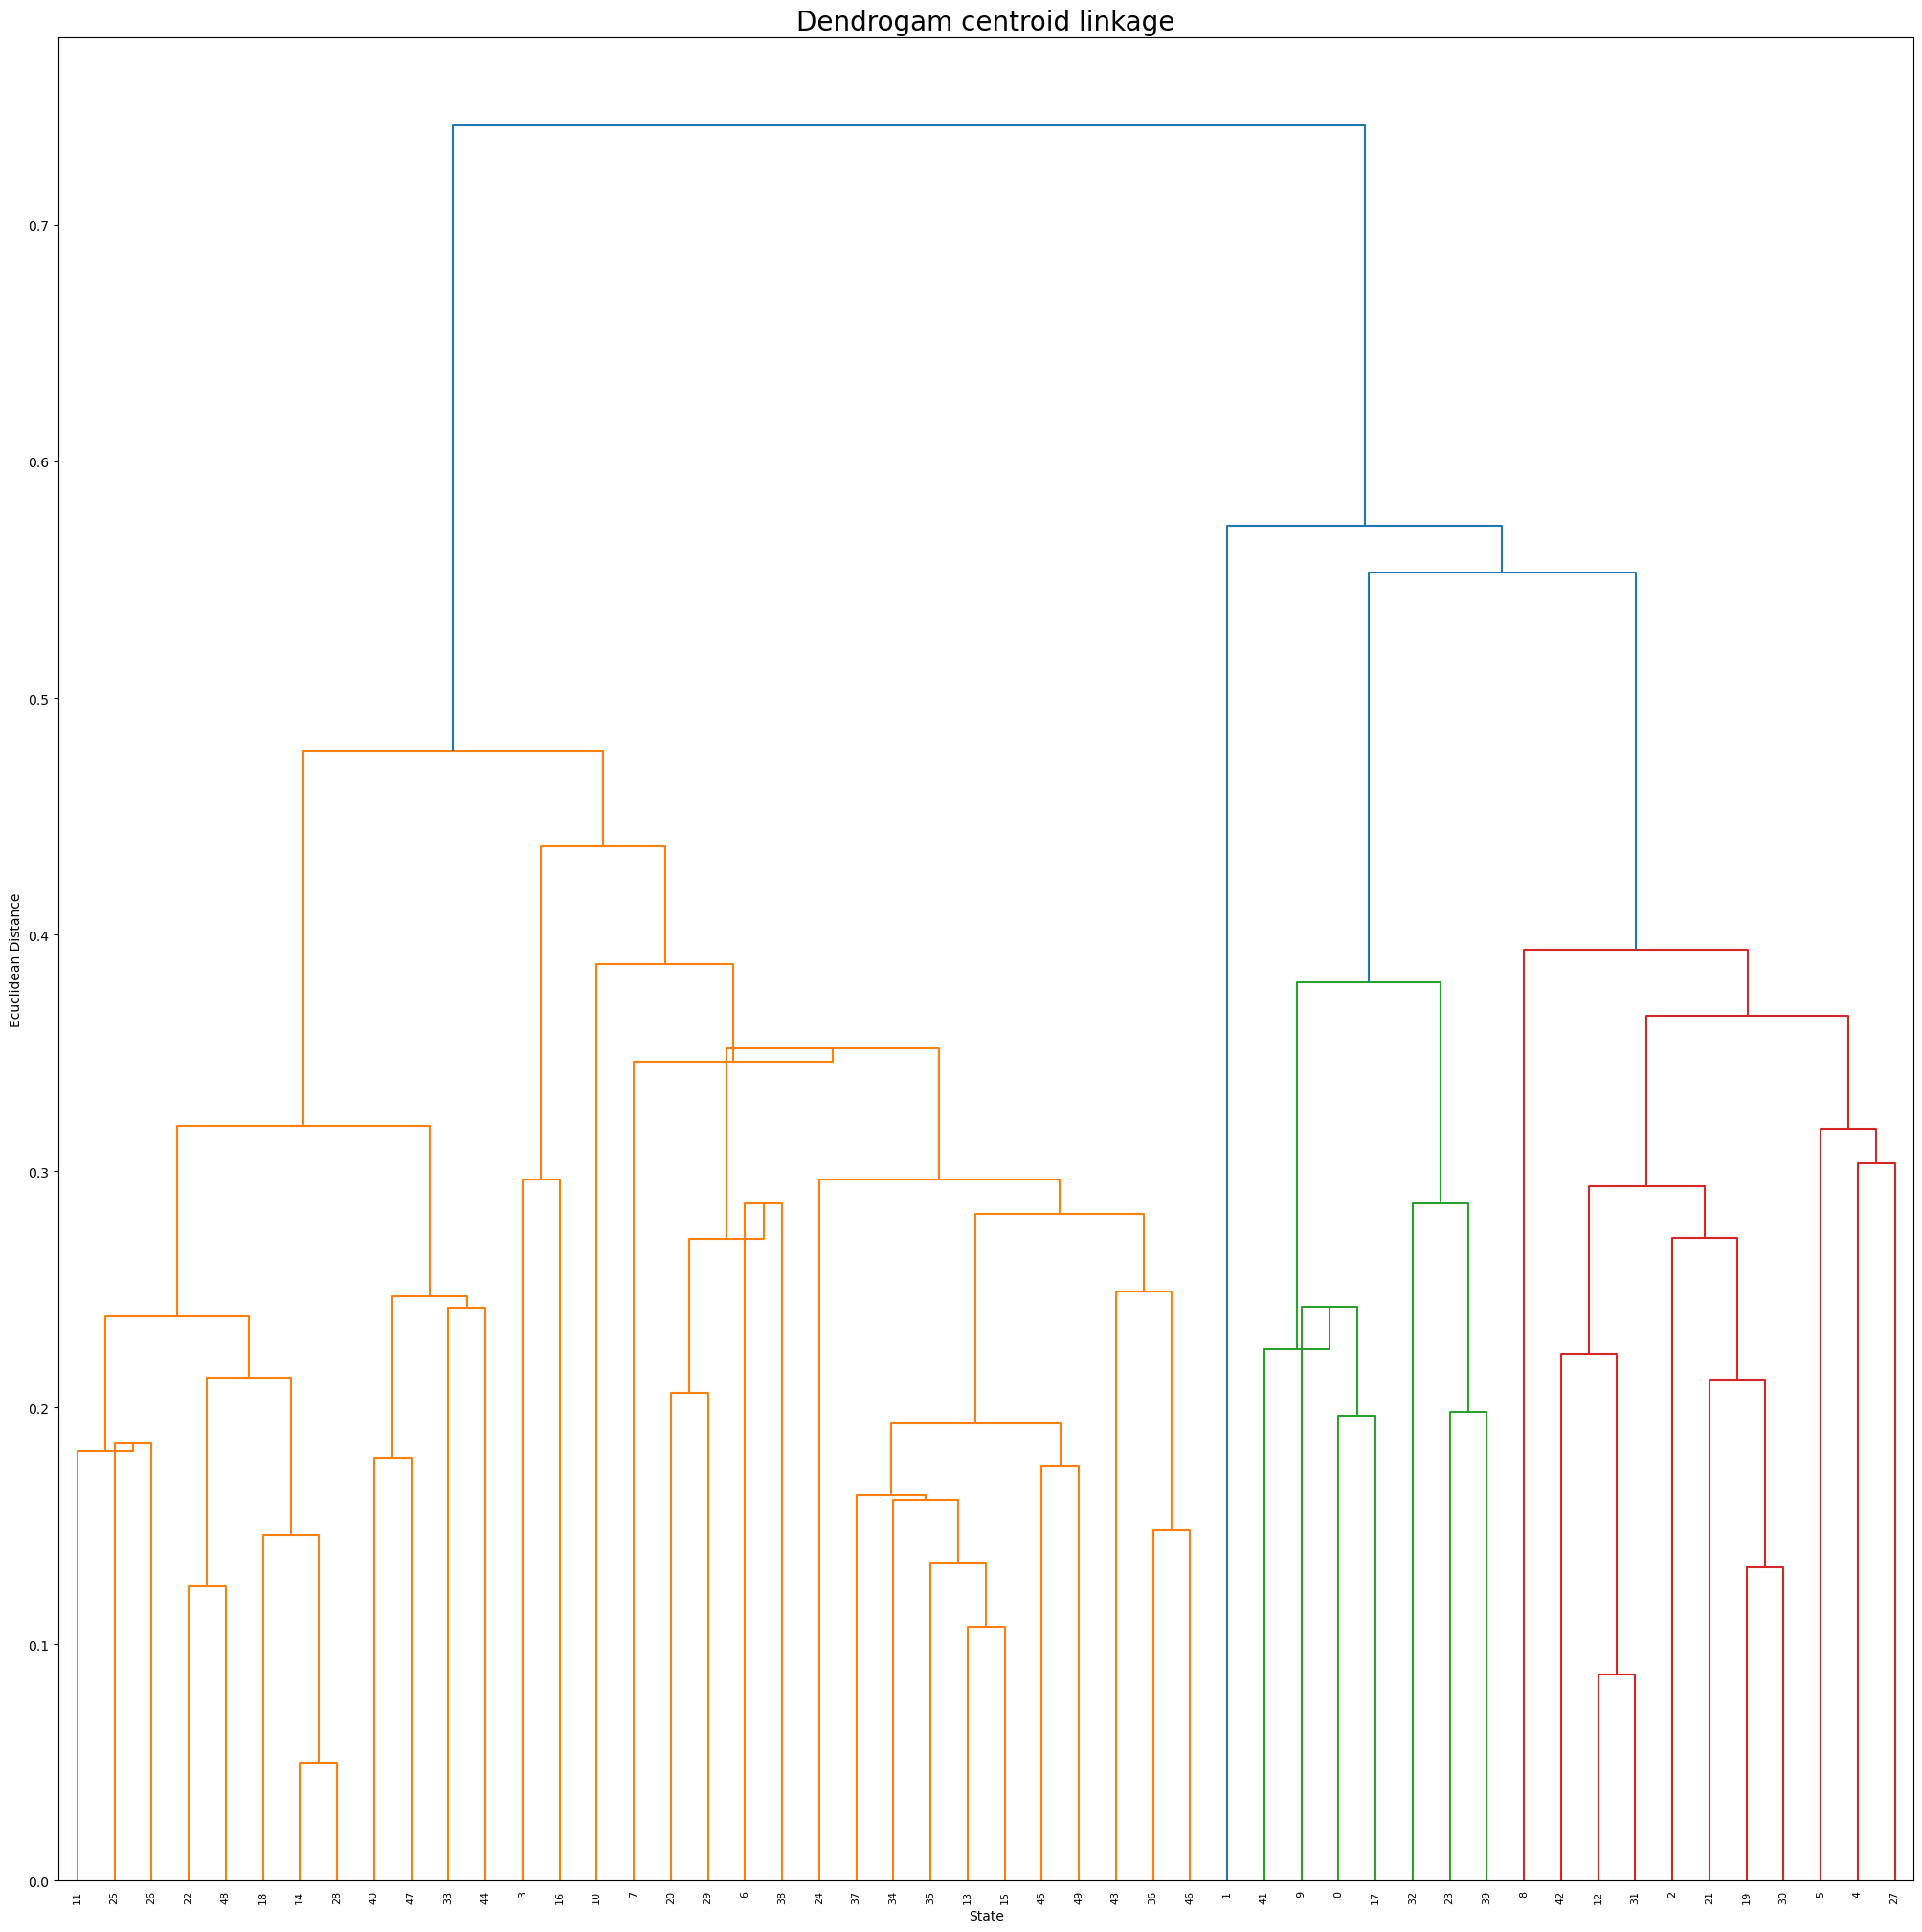

In [73]:
# Dendrogram
for method in ['single','complete', 'average', 'weighted', 'ward', 'median', 'centroid']:
    plt.figure(figsize=(25, 25))
    dendrogram = sch.dendrogram(sch.linkage(crime_mm, method=method))
    plt.title(f'Dendrogam {method} linkage', fontsize = 20)
    plt.xlabel('State')
    plt.ylabel('Ecuclidean Distance')
    plt.show()

#### Agglomeartive clustering

In [74]:
#2. Agglomearative clustering
# Using standard scaled data

x = crime_std
clusters = 0
max_score = 0
best_link = ''
for num in range(2, 10):
    print('Nos of clusters: ', num)
    for link in ['ward', 'complete', 'average', 'single']:
        hc = AgglomerativeClustering(n_clusters = num, metric = 'euclidean', linkage = link)
        y_hc = hc.fit_predict(x)
        score = silhouette_score(x, y_hc)
        print(f'Silhouette score for linkage {link}: ', score)
        if score > max_score:
            max_score = score
            best_link = link
            clusters = num
    print()

Nos of clusters:  2
Silhouette score for linkage ward:  0.4047944502519567
Silhouette score for linkage complete:  0.4047944502519567
Silhouette score for linkage average:  0.4084890326217641
Silhouette score for linkage single:  0.23455598753159795

Nos of clusters:  3
Silhouette score for linkage ward:  0.31036358174027895
Silhouette score for linkage complete:  0.36924314190439733
Silhouette score for linkage average:  0.34863679190476177
Silhouette score for linkage single:  0.14582343625170263

Nos of clusters:  4
Silhouette score for linkage ward:  0.3370187183556962
Silhouette score for linkage complete:  0.31595507426164543
Silhouette score for linkage average:  0.3636819420151221
Silhouette score for linkage single:  0.174058063042673

Nos of clusters:  5
Silhouette score for linkage ward:  0.2731109448720741
Silhouette score for linkage complete:  0.3174348822319004
Silhouette score for linkage average:  0.3212682619092323
Silhouette score for linkage single:  0.2112713800517

In [75]:
print(f'Best Agglomerative clustering combination using standard scaled data is cluseters:'
      f' {clusters} and linkage: {best_link} with silhouette score of {max_score}.')

Best Agglomerative clustering combination using standard scaled data is cluseters: 2 and linkage: average with silhouette score of 0.4084890326217641.


In [76]:
# Using minmax scaled data

x = crime_mm
clusters = 0
max_score = 0
best_link = ''
for num in range(2, 10):
    print('Nos of clusters: ', num)
    for link in ['ward', 'complete', 'average', 'single']:
        hc = AgglomerativeClustering(n_clusters = num, metric = 'euclidean', linkage = link)
        y_hc = hc.fit_predict(x)
        score = silhouette_score(x, y_hc)
        print(f'Silhouette score for linkage {link}: ', score)
        if score > max_score:
            max_score = score
            best_link = link
            clusters = num
    print()

Nos of clusters:  2
Silhouette score for linkage ward:  0.42364457559625074
Silhouette score for linkage complete:  0.42364457559625074
Silhouette score for linkage average:  0.42364457559625074
Silhouette score for linkage single:  0.21033337025958487

Nos of clusters:  3
Silhouette score for linkage ward:  0.31916915428121284
Silhouette score for linkage complete:  0.30877213909512063
Silhouette score for linkage average:  0.35149572430421583
Silhouette score for linkage single:  0.14223288708185444

Nos of clusters:  4
Silhouette score for linkage ward:  0.3298707379986785
Silhouette score for linkage complete:  0.3060729442426308
Silhouette score for linkage average:  0.36992391140277175
Silhouette score for linkage single:  -0.1674119195474404

Nos of clusters:  5
Silhouette score for linkage ward:  0.28290124293256447
Silhouette score for linkage complete:  0.3056360903608855
Silhouette score for linkage average:  0.3257478134255528
Silhouette score for linkage single:  -0.182154

In [77]:
print(f'Best Agglomerative clustering combination using minmax scaled data is cluseters:'
      f' {clusters} and linkage: {best_link} with silhouette score of {max_score}.')

Best Agglomerative clustering combination using minmax scaled data is cluseters: 2 and linkage: ward with silhouette score of 0.42364457559625074.


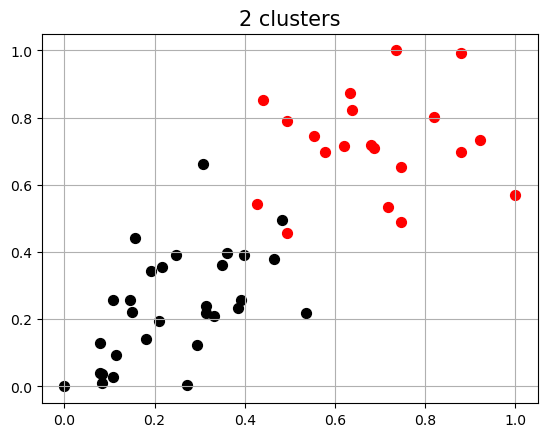

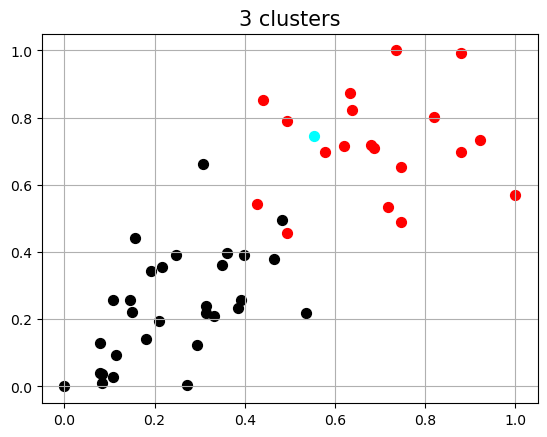

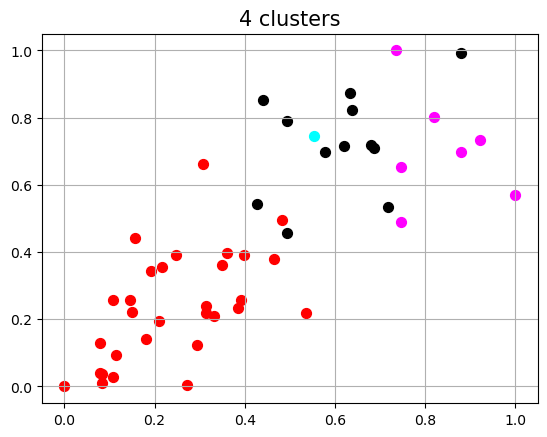

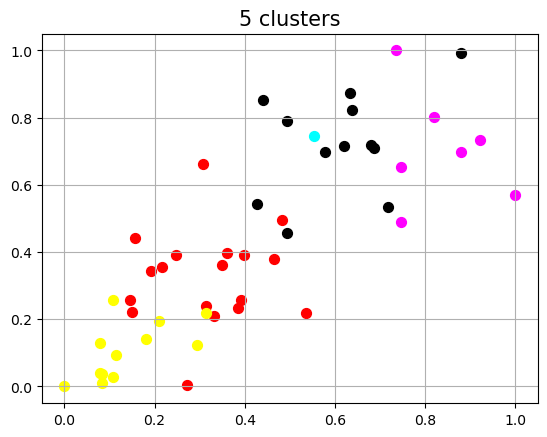

In [78]:
# Finding Best Agglomerative clustering

x = crime_mm
color = ['red', 'black', 'cyan', 'magenta', 'yellow']
for cluster in range(2, 6):
    hc = AgglomerativeClustering(n_clusters = cluster, metric = 'euclidean', linkage = 'average')
    y_hc = hc.fit_predict(x)
    for g in range(cluster):
        plt.scatter(x[y_hc == g, 0], x[y_hc == g, 1], s = 50, c = color[g])
    
    plt.title(f'{cluster} clusters', fontsize = 15)
    plt.grid()
    plt.show()

In [79]:
# Best agglomerative clustering model
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(x)
result = pd.DataFrame(y_hc)
result.value_counts()

1    30
0    20
dtype: int64

In [80]:
score = silhouette_score(x, y_hc)
print('Silhouette score is: ', score)

Silhouette score is:  0.42364457559625074


#### KMeans clustering

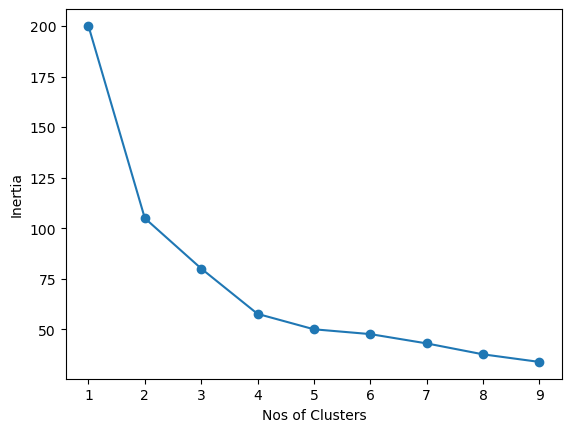

In [81]:
# Finding optimum clusters by fitting KMeans cluster model
# Using Standard scale

inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init='auto')
    kmeans.fit(crime_std)
    inertia.append(kmeans.inertia_)

# Plotting inertia v/s nos of clusters
inertia_frame = pd.DataFrame({'Cluster': range(1, 10), 'Inertia':inertia})
plt.plot(inertia_frame['Cluster'], inertia_frame['Inertia'], marker='o')
plt.xlabel('Nos of Clusters')
plt.ylabel('Inertia')
plt.show()

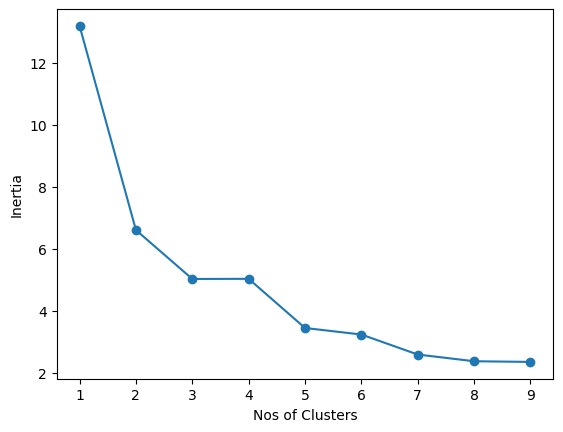

In [82]:
# Using Standard scale

inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init='auto')
    kmeans.fit(crime_mm)
    inertia.append(kmeans.inertia_)

# Plotting inertia v/s nos of clusters
inertia_frame = pd.DataFrame({'Cluster': range(1, 10), 'Inertia':inertia})
plt.plot(inertia_frame['Cluster'], inertia_frame['Inertia'], marker='o')
plt.xlabel('Nos of Clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
# Silhouette scores for KMeans clusters using standard scaled data
clusters = 0
best_mode = ''
max_score = 0
for num in range(2, 5):
    for mode in ['k-means++', 'random']:
        kmeans = KMeans(n_clusters=num, init=mode, n_init='auto')
        kmeans.fit(crime_std)
        predicts = kmeans.predict(crime_std)
        score = silhouette_score(crime_std, predicts)
        if score > max_score:
            max_score = score
            clusters = num
            best_mode = mode
        print(f'Clusters: {num}, initialization: {mode}, silhouette score: {score}')

Clusters: 2, initialization: k-means++, silhouette score: 0.4084890326217641
Clusters: 2, initialization: random, silhouette score: 0.4084890326217641
Clusters: 3, initialization: k-means++, silhouette score: 0.31120911684568886
Clusters: 3, initialization: random, silhouette score: 0.30813622648945616
Clusters: 4, initialization: k-means++, silhouette score: 0.3344366179706602
Clusters: 4, initialization: random, silhouette score: 0.33968891433344395


In [84]:
print('Best parameters for KMeans clustering using standard scaled data- ')
print(f'Clusters: {clusters}, initialization: {best_mode}, silhouette score: {max_score}')

Best parameters for KMeans clustering using standard scaled data- 
Clusters: 2, initialization: k-means++, silhouette score: 0.4084890326217641


In [85]:
# Silhouette scores for KMeans clusters using minmax scaled data
clusters = 0
best_mode = ''
max_score = 0
for num in range(2, 5):
    for mode in ['k-means++', 'random']:
        kmeans = KMeans(n_clusters=num, init=mode, n_init='auto')
        kmeans.fit(crime_mm)
        predicts = kmeans.predict(crime_mm)
        score = silhouette_score(crime_mm, predicts)
        if score > max_score:
            max_score = score
            clusters = num
            best_mode = mode
        print(f'Clusters: {num}, initialization: {mode}, silhouette score: {score}')

Clusters: 2, initialization: k-means++, silhouette score: 0.42364457559625074
Clusters: 2, initialization: random, silhouette score: 0.42364457559625074
Clusters: 3, initialization: k-means++, silhouette score: 0.3747499643294246
Clusters: 3, initialization: random, silhouette score: 0.31705482042661864
Clusters: 4, initialization: k-means++, silhouette score: 0.33417572896626413
Clusters: 4, initialization: random, silhouette score: 0.3398063788928164


In [86]:
print('Best parameters for KMeans clustering using minmax scaled data- ')
print(f'Clusters: {clusters}, initialization: {best_mode}, silhouette score: {max_score}')

Best parameters for KMeans clustering using minmax scaled data- 
Clusters: 2, initialization: k-means++, silhouette score: 0.42364457559625074


In [87]:
# Best KMeans model fitting
kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto')
kmeans.fit(crime_mm)
predicts = kmeans.predict(crime_mm)

result_df = pd.DataFrame(crime_mm)
result_df['Cluster'] = predicts
result_df.head()

,0,1,2,3,Cluster
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


In [88]:
# Mapping clusters to records
crime_df['Cluster'] = predicts
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [89]:
# Count of clusters
result_df['Cluster'].value_counts()

1    30
0    20
Name: Cluster, dtype: int64

In [90]:
# Grouping columns clusterwise average
crime_df.groupby(['Cluster']).count()

,State,Murder,Assault,UrbanPop,Rape
Cluster,,,,,
0,20,20,20,20,20
1,30,30,30,30,30


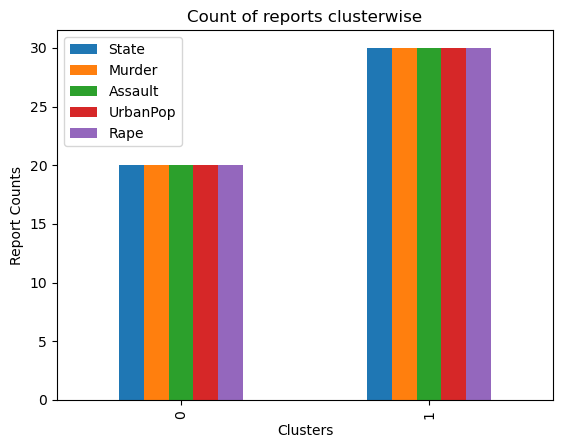

In [91]:
# Visualizaton of dataset clusterwise
crime_df.groupby(['Cluster']).count().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Report Counts')
plt.title('Count of reports clusterwise')
plt.show()

In [92]:
# Grouping columns clusterwise average
crime_df.groupby(['Cluster']).mean(numeric_only=True)

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


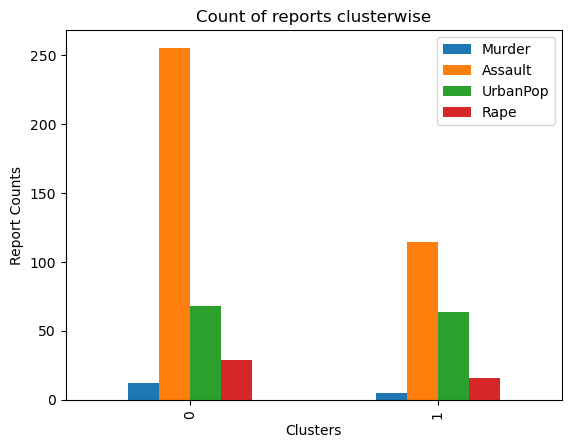

In [93]:
# Visualizaton of dataset clusterwise
crime_df.groupby(['Cluster']).mean(numeric_only=True).plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Report Counts')
plt.title('Count of reports clusterwise')
plt.show()

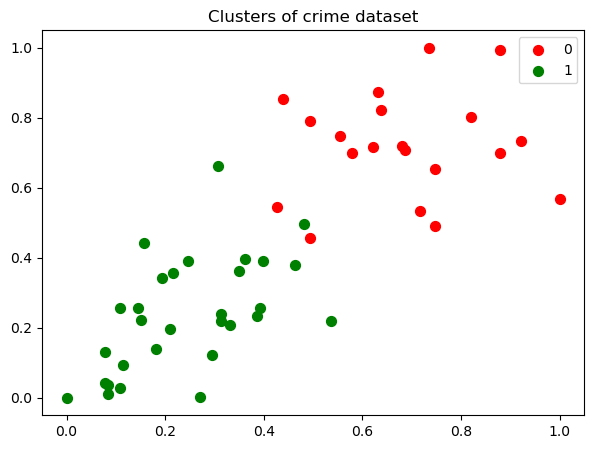

In [94]:
# Clusters visualization - scatter form
x = crime_mm
y_means = predicts
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'green')

plt.legend([0, 1])
plt.title('Clusters of crime dataset')
plt.show()

In [95]:
crime_df.groupby(['Cluster', 'State']).sum()

Murder  Assault  UrbanPop  Rape
Cluster State                                          
0       Alabama           13.2      236        58  21.2
        Alaska            10.0      263        48  44.5
        Arizona            8.1      294        80  31.0
        California         9.0      276        91  40.6
        Colorado           7.9      204        78  38.7
        Florida           15.4      335        80  31.9
        Georgia           17.4      211        60  25.8
        Illinois          10.4      249        83  24.0
        Louisiana         15.4      249        66  22.2
        Maryland          11.3      300        67  27.8
        Michigan          12.1      255        74  35.1
        Mississippi       16.1      259        44  17.1
        Missouri           9.0      178        70  28.2
        Nevada            12.2      252        81  46.0
        New Mexico        11.4      285        70  32.1
        New York          11.1      254        86  26.1
        North Carolina    13.0      337        45  16.1
        South Carolina    14.4      279        48  22.5
        Tennessee         13.2      188        59  26.9
        Texas             12.7      201        80  25.5
1       Arkansas           8.8      190        50  19.5
        Connecticut        3.3      110        77  11.1
        Delaware           5.9      238        72  15.8
        Hawaii             5.3       46        83  20.2
        Idaho              2.6      120        54  14.2
        Indiana            7.2      113        65  21.0
        Iowa               2.2       56        57  11.3
        Kansas             6.0      115        66  18.0
        Kentucky           9.7      109        52  16.3
        Maine              2.1       83        51   7.8
        Massachusetts      4.4      149        85  16.3
        Minnesota          2.7       72        66  14.9
        Montana            6.0      109        53  16.4
        Nebraska           4.3      102        62  16.5
        New Hampshire      2.1       57        56   9.5
        New Jersey         7.4      159        89  18.8
        North Dakota       0.8       45        44   7.3
        Ohio               7.3      120        75  21.4
        Oklahoma           6.6      151        68  20.0
        Oregon             4.9      159        67  29.3
        Pennsylvania       6.3      106        72  14.9
        Rhode Island       3.4      174        87   8.3
        South Dakota       3.8       86        45  12.8
        Utah               3.2      120        80  22.9
        Vermont            2.2       48        32  11.2
        Virginia           8.5      156        63  20.7
        Washington         4.0      145        73  26.2
        West Virginia      5.7       81        39   9.3
        Wisconsin          2.6       53        66  10.8
        Wyoming            6.8      161        60  15.6

#### DBSCAN Clustering

In [96]:
# Finding optimum parameters

ep = 0
minpt = 0
max_score = 0
for epsilon in [1, 2]:
    print('Epsilon: ', epsilon)
    for minpts in range(1, 6):
        # Modscore
        dbscan = DBSCAN(eps=epsilon, min_samples=minpts, metric='euclidean')

        # Fitting model
        dbscan.fit(crime_std)

        labels = dbscan.labels_
        score = silhouette_score(crime_std, labels)
        if score > max_score:
            max_score = score
            ep = epsilon
            minpt = minpts
            clusters = labels
        print('Min_samples: ', minpts)
        print('Silhouette score: ', score)
        print('Clusters: ', np.unique(labels))
        print()
    print()

Epsilon:  1
Min_samples:  1
Silhouette score:  0.0011630308334708251
Clusters:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]

Min_samples:  2
Silhouette score:  0.19290975823254836
Clusters:  [-1  0  1  2  3]

Min_samples:  3
Silhouette score:  0.19290975823254836
Clusters:  [-1  0  1  2  3]

Min_samples:  4
Silhouette score:  0.2051154919322
Clusters:  [-1  0  1]

Min_samples:  5
Silhouette score:  0.19486631995858555
Clusters:  [-1  0  1]


Epsilon:  2
Min_samples:  1
Silhouette score:  0.23455598753159795
Clusters:  [0 1]

Min_samples:  2
Silhouette score:  0.23455598753159795
Clusters:  [-1  0]

Min_samples:  3
Silhouette score:  0.23455598753159795
Clusters:  [-1  0]

Min_samples:  4
Silhouette score:  0.23455598753159795
Clusters:  [-1  0]

Min_samples:  5
Silhouette score:  0.23455598753159795
Clusters:  [-1  0]




In [97]:
# DBSCAN model with best parameters
dbscan = DBSCAN(eps=1, min_samples=4, metric='euclidean')

# Fitting model
dbscan.fit(crime_std)

labels = dbscan.labels_
score = silhouette_score(crime_std, labels)
print('Clusters details other than -1 which is noise: ', np.unique(labels))
print('Silhouette score of model: ', score)

Clusters details other than -1 which is noise:  [-1  0  1]
Silhouette score of model:  0.2051154919322


In [98]:
crime_db = crime_df.drop('Cluster', axis=1)
crime_db

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [99]:
crime_db['Clusters'] = labels
crime_db

,State,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [100]:
crime_db['Clusters'].value_counts()

 1    28
-1    18
 0     4
Name: Clusters, dtype: int64

In [101]:
crime_db.groupby(['Clusters']).count()

,State,Murder,Assault,UrbanPop,Rape
Clusters,,,,,
-1,18,18,18,18,18
0,4,4,4,4,4
1,28,28,28,28,28


In [102]:
crime_db.groupby(['Clusters']).mean(numeric_only=True)

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


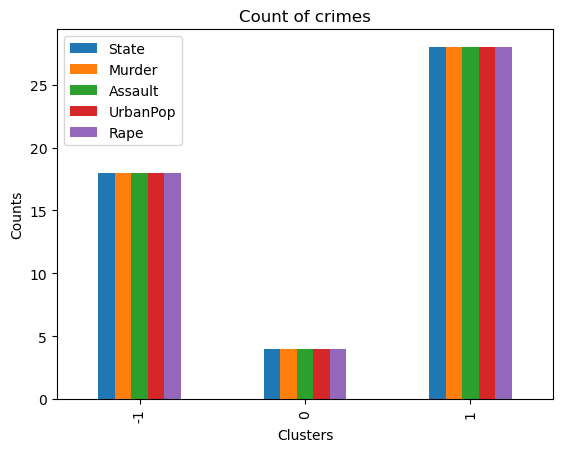

In [103]:
# Visualizaton of dataset clusterwise
crime_db.groupby(['Clusters']).count().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Count of crimes')
plt.show()

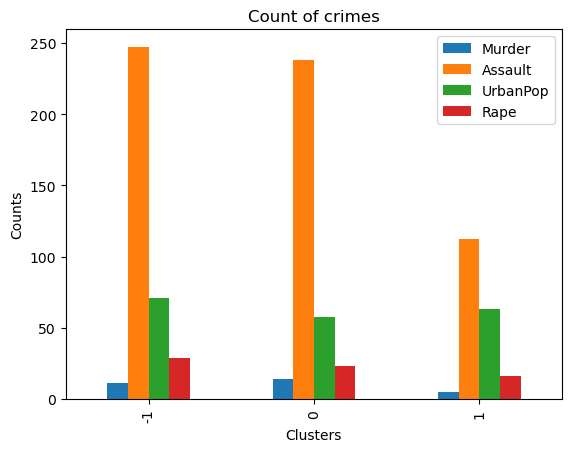

In [104]:
# Visualizaton of dataset clusterwise
crime_db.groupby(['Clusters']).mean(numeric_only=True).plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Count of crimes')
plt.show()

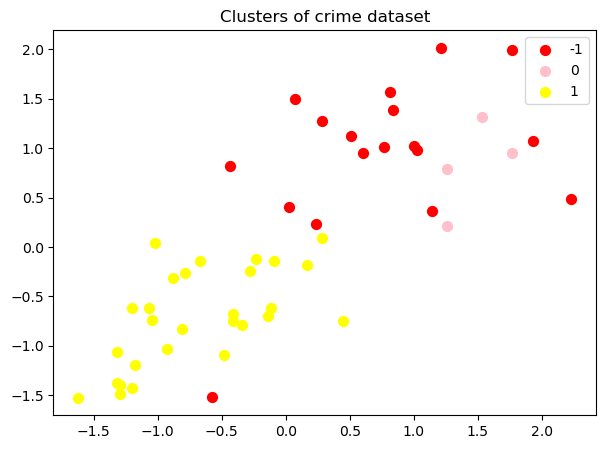

In [105]:
# Clusters visualization - scatter form
x = crime_std
y_means = labels
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == -1, 0], x[y_means == -1, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')

plt.legend([-1, 0, 1])
plt.title('Clusters of crime dataset')
plt.show()

In [106]:
crime_db.groupby(['Clusters',  'State']).sum()

Murder  Assault  UrbanPop  Rape
Clusters State                                          
-1       Alaska            10.0      263        48  44.5
         Arizona            8.1      294        80  31.0
         Arkansas           8.8      190        50  19.5
         California         9.0      276        91  40.6
         Colorado           7.9      204        78  38.7
         Delaware           5.9      238        72  15.8
         Florida           15.4      335        80  31.9
         Georgia           17.4      211        60  25.8
         Hawaii             5.3       46        83  20.2
         Illinois          10.4      249        83  24.0
         Maryland          11.3      300        67  27.8
         Michigan          12.1      255        74  35.1
         Mississippi       16.1      259        44  17.1
         Nevada            12.2      252        81  46.0
         New Mexico        11.4      285        70  32.1
         New York          11.1      254        86  26.1
         North Carolina    13.0      337        45  16.1
         Texas             12.7      201        80  25.5
 0       Alabama           13.2      236        58  21.2
         Louisiana         15.4      249        66  22.2
         South Carolina    14.4      279        48  22.5
         Tennessee         13.2      188        59  26.9
 1       Connecticut        3.3      110        77  11.1
         Idaho              2.6      120        54  14.2
         Indiana            7.2      113        65  21.0
         Iowa               2.2       56        57  11.3
         Kansas             6.0      115        66  18.0
         Kentucky           9.7      109        52  16.3
         Maine              2.1       83        51   7.8
         Massachusetts      4.4      149        85  16.3
         Minnesota          2.7       72        66  14.9
         Missouri           9.0      178        70  28.2
         Montana            6.0      109        53  16.4
         Nebraska           4.3      102        62  16.5
         New Hampshire      2.1       57        56   9.5
         New Jersey         7.4      159        89  18.8
         North Dakota       0.8       45        44   7.3
         Ohio               7.3      120        75  21.4
         Oklahoma           6.6      151        68  20.0
         Oregon             4.9      159        67  29.3
         Pennsylvania       6.3      106        72  14.9
         Rhode Island       3.4      174        87   8.3
         South Dakota       3.8       86        45  12.8
         Utah               3.2      120        80  22.9
         Vermont            2.2       48        32  11.2
         Virginia           8.5      156        63  20.7
         Washington         4.0      145        73  26.2
         West Virginia      5.7       81        39   9.3
         Wisconsin          2.6       53        66  10.8
         Wyoming            6.8      161        60  15.6

Observation:
From above DBSCAN clustering analysis, it can be observed that more noise i.e. 18 / 50 records present in the dataset. States belonging to noise and cluster 0 have more crime rates than cluster 1 states.      